<a href="https://colab.research.google.com/github/dael2211/DDE1_project/blob/main/DDE1_project_DG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project DDE1** 2023

Vertebral Column Data -- classifying spinal injuries

---
Damian Gentner

gitpage with data:
https://github.com/dael2211/DDE1_project











#  0.**Problem description and Motivation**

I chose this Problem because of personal interest. Working and studying extensively in front of a screen can pose a risk for bad posture and spinal damage.Furthermore I expected the classification task will be done based on some visual features on medical scans like MRI/X-ray. My plan was here to draw on experience from my internship. This is not the case.



# 1.**Problem understanding**

This is a relatively low dimensional dataset with  6 biomechanical features. 

*   pelvic incidence
*   pelvic tilt
*   lumbar lordosis angle
*   sacral slope
*   pelvic radius
*   grade of spondylolisthesis

Based on this features there are two classification tasks to perform.
One binary classification with the classes normal(NO) and abnormal (AB)
and a three class classificytion with the target classes disk hernia (DH), spondylolisthesis(SL) and normal (NO).

The dataset consits of 210 samples with the distribution Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (50 patients).
So the dataset is to be considered small.

The Hypothesis is that we can give a good indication on spinal injuries by this 6 mechanical features. Further more I expect that we could retain good confidence scores when we drop some features. I expect the features to be correlated because of the physical interpendence of the single parts of the spine.

I think we can not judge is the missaligment of the spine is cause or consequence of the spine injury. It could be either that missaligment causes or favors injurys. Or the pain of the injuries  causes pain that restrains the posture.

But this research task is classification. So this should be not consideres and obliges to a medical scientists.
One application of this project could be some automatic prediagnosis to assist a medical expert.

There is two classification task in the dataset. On binary and one ternary. I think we could deploy this model as some kind decision helper and not decision atomatism I will drop the ternary classification for now. This model could tell a medical expert when to check the patients condition more thoroughly. 

I will stil research the ternary dataset in case there is some missing values in the first data set and to gain possible further insight.

So the classification task will be either healty(normal) or unhealty(abnormal) spine.

Because of this small dataset I expect that classical ML algorith will perform sufficiently. Because of some expert advice I expect boosting models to perform the best 

The dataset is provide as .arrf file not as .csv, first task will be to find a way to import this file.


The dataset, papers and first publishers are found here:
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column


Hypothesis:
We can classificate abnormal Spinal conditions with this 6 mechanical features. Further I predict that the features will be highly dependend on each other as the elements of the spine are as well mechanical interconnected

#1.1**Imports**


In [131]:
#import libaries
from google.colab import files
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from urllib.request import urlretrieve
import os
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
import random

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, log_loss, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import FastICA

time: 9.23 ms (started: 2023-05-18 11:03:42 +00:00)


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers
tf.__version__
from tqdm.keras import TqdmCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [3]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00
time: 362 µs (started: 2023-05-18 10:14:18 +00:00)


In [4]:
random_state = 2023
np.random.seed(2023)
random.seed(2023)
tf.random.set_seed(2023)

time: 1.45 ms (started: 2023-05-18 10:14:18 +00:00)


# 2.**Data exploration and preparation**

# 2.1. Dataloading and overview

In this step I will load the data, visualize, check for missing and false values





In [5]:
#uploaded = files.upload() this is the alternative, to load from local dir. The files are on the git repo
!wget 'https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_2C.dat'
!wget 'https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_2C_weka.arff'
!wget'https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_3C.dat'
!wget 'https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_3C_weka.arff'

--2023-05-18 10:14:18--  https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_2C.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11796 (12K) [text/plain]
Saving to: ‘column_2C.dat’

column_2C.dat       100%[===================>]  11.52K  --.-KB/s    in 0s      

2023-05-18 10:14:18 (92.3 MB/s) - ‘column_2C.dat’ saved [11796/11796]

--2023-05-18 10:14:18--  https://raw.githubusercontent.com/dael2211/DDE1_project/main/column_2C_weka.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25142 (25K) [text/plain]
Savi

In [6]:
data_task_binary = loadarff('column_2C_weka.arff')
#data_task_binary = loadarff('column_2C_weka.arff.2')
df_set_1 = pd.DataFrame(data_task_binary[0])
df_set_1.sample(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
263         33.788843     3.675110              25.500000     30.113733   
13          53.572170    20.460828              33.100000     33.111342   
211         54.920858    18.968430              51.601455     35.952428   
308         45.252792     8.693157              41.583126     36.559635   
83          81.104100    24.794168              77.887020     56.309932   

     pelvic_radius  degree_spondylolisthesis        class  
263     128.325356                 -1.776111    b'Normal'  
13      110.966698                  7.044803  b'Abnormal'  
211     125.846646                  2.001642    b'Normal'  
308     118.545842                  0.214750    b'Normal'  
83      151.839857                 65.214616  b'Abnormal'

time: 76 ms (started: 2023-05-18 10:14:19 +00:00)


In [7]:
df_set_1.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'

time: 16.5 ms (started: 2023-05-18 10:14:19 +00:00)


In [8]:
df_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
time: 36.5 ms (started: 2023-05-18 10:14:19 +00:00)


In [9]:
data_task_ternary = loadarff('column_3C_weka.arff')
df_set_2 = pd.DataFrame(data_task_ternary[0])
df_set_2.sample(5)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
152         63.404481    14.115327              48.136806     49.289153   
45          50.912440    23.015169              47.000000     27.897271   
128         90.513961    28.272501              69.813942     62.241459   
55          47.657730    13.277385              36.679985     34.380345   
303         34.382299     2.062683              32.390820     32.319617   

     pelvic_radius  degree_spondylolisthesis                 class  
152     111.916008                 31.784495  b'Spondylolisthesis'  
45      117.422259                 -2.526702             b'Hernia'  
128     100.892160                 58.823648  b'Spondylolisthesis'  
55       98.249781                  6.273012             b'Hernia'  
303     128.300199                 -3.365516             b'Normal'

time: 18.7 ms (started: 2023-05-18 10:14:19 +00:00)


In [10]:
df_set_2.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis      class  
0      98.672917                 -0.254400  b'Hernia'  
1     114.405425                  4.564259  b'Hernia'  
2     105.985135                 -3.530317  b'Hernia'  
3     101.868495                 11.211523  b'Hernia'  
4     108.168725                  7.918501  b'Hernia'

time: 13.9 ms (started: 2023-05-18 10:14:19 +00:00)


In [11]:
df_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
time: 8.02 ms (started: 2023-05-18 10:14:19 +00:00)


conlusion:
Two ordered datasets, so we have to shuffle.
Feature names already in place by the arrf format

The objects to classification should be encoded as int. We follow this sheme:
0 = normal for both tasks
1 = abnormal for the binary classification
10 = abnormal/Spondylolisthesis for the terniary classification
11 = abnormal/Hernia for the terniary classification




In [12]:
dict_replace_1 ={b'Normal': 0, b'Abnormal': 1}
dict_replace_2 ={b'Normal': 0, b'Spondylolisthesis': 1, b'Hernia': 2}
df_set_1 = df_set_1.replace(dict_replace_1)
df_set_2 = df_set_2.replace(dict_replace_2)

time: 9.32 ms (started: 2023-05-18 10:14:19 +00:00)


In [13]:
df_set_1['class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 310 entries, 0 to 309
Series name: class
Non-Null Count  Dtype
--------------  -----
310 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
time: 19.8 ms (started: 2023-05-18 10:14:19 +00:00)


now we check the .dat files


In [14]:
data = open("column_2C.dat", "rb")
print(type(data))

df_check_format = pd.read_fwf(data)
df_check_format.head(5)


<class '_io.BufferedReader'>


63.03 22.55 39.61 40.48 98.67 -0.25 AB
0      39.06 10.06 25.02 29 114.41 4.56 AB
1  68.83 22.22 50.09 46.61 105.99 -3.53 AB
2   69.3 24.65 44.31 44.64 101.87 11.21 AB
3    49.71 9.65 28.32 40.06 108.17 7.92 AB
4   40.25 13.92 25.12 26.33 130.33 2.23 AB

time: 47.4 ms (started: 2023-05-18 10:14:19 +00:00)


We see its the same Data without the Feature names. We dont have to work with this anymore. We keep the two first dataframes


Next step is an overview over the data


In [15]:
df_set_1.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis       class  
count     310.000000                310.000000  310.000000  
mean      117.920655                 26.296694    0.677419  
std        13.317377                 37.559027    0.468220  
min        70.082575                -11.058179    0.000000  
25%       110.709196                  1.603727    0.000000  
50%       118.268178                 11.767934    1.000000  
75%       125.467674                 41.287352    1.000000  
max       163.071041                418.543082    1.000000

time: 85.8 ms (started: 2023-05-18 10:14:19 +00:00)


In [16]:
df_set_2.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis       class  
count     310.000000                310.000000  310.000000  
mean      117.920655                 26.296694    0.870968  
std        13.317377                 37.559027    0.707881  
min        70.082575                -11.058179    0.000000  
25%       110.709196                  1.603727    0.000000  
50%       118.268178                 11.767934    1.000000  
75%       125.467674                 41.287352    1.000000  
max       163.071041                418.543082    2.000000

time: 38.9 ms (started: 2023-05-18 10:14:19 +00:00)


We se that both dataset are identical in their feature values so we have to check only one for data quality. I try to merge the datasets into one.

In [17]:
df_set_2.rename(columns ={'class' : 'class_ternary'}, inplace = True)
df_set_1.rename(columns ={'class' : 'class_binary'}, inplace = True)
df_merged = df_set_1.merge(df_set_2[['pelvic_incidence','class_ternary']], on = 'pelvic_incidence', how='left')
df_merged.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class_binary  class_ternary  
0      98.672917                 -0.254400             1              2  
1     114.405425                  4.564259             1              2  
2     105.985135                 -3.530317             1              2  
3     101.868495                 11.211523             1              2  
4     108.168725                  7.918501             1              2

time: 52.8 ms (started: 2023-05-18 10:14:19 +00:00)


In [18]:
df_merged['class_binary'] = df_merged['class_binary'].astype(int)
df_merged['class_ternary'] = df_merged['class_ternary'].astype(int)

time: 3.43 ms (started: 2023-05-18 10:14:19 +00:00)


# 2.2 Visualization and check for wrong data

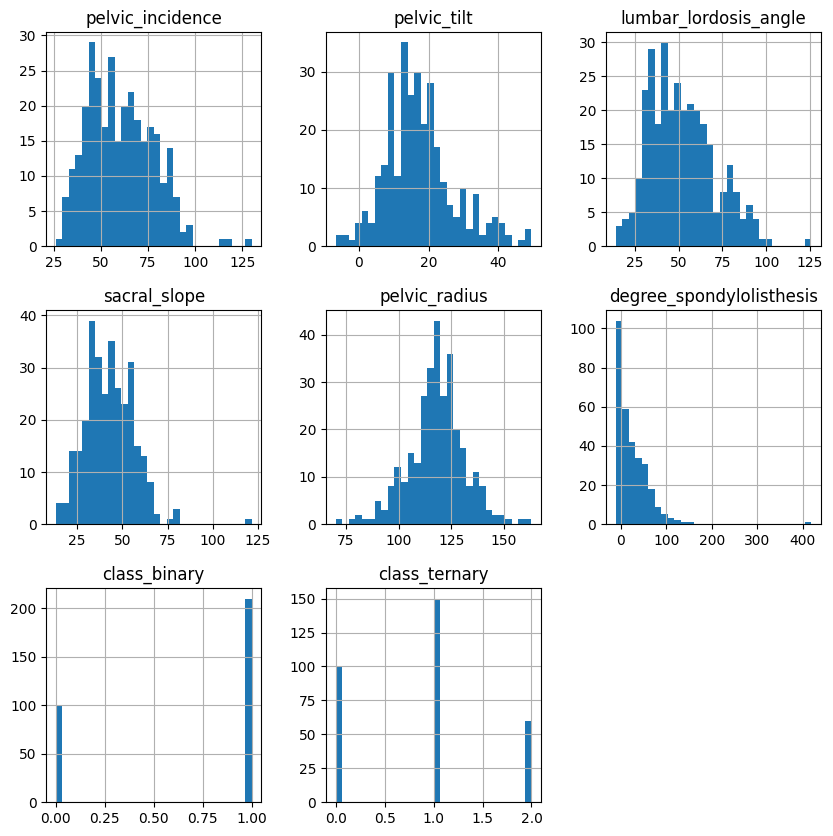

time: 1.54 s (started: 2023-05-18 10:14:19 +00:00)


In [19]:
df_merged.hist(bins=30, figsize=(10,10))
plt.show()

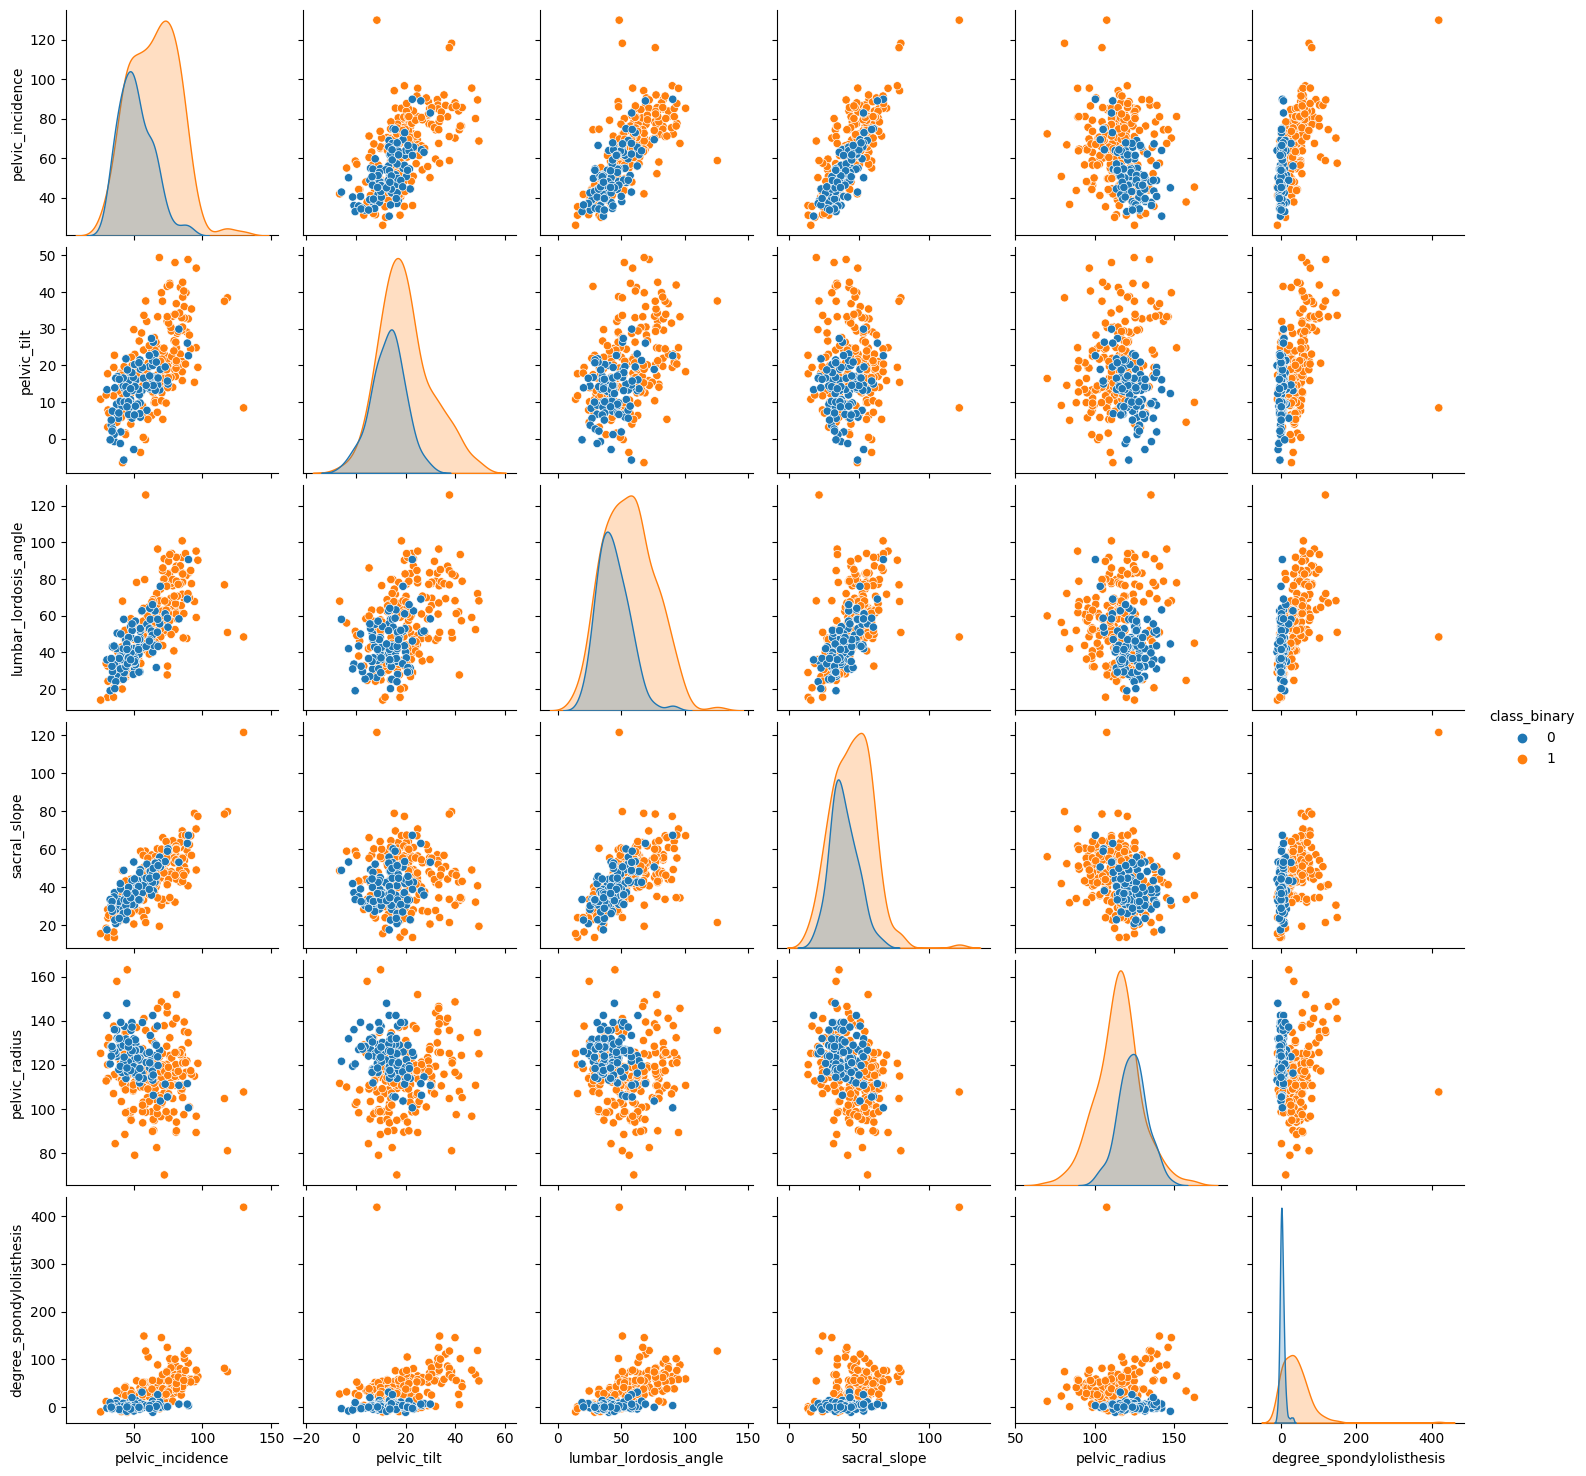

time: 16.1 s (started: 2023-05-18 10:14:21 +00:00)


In [20]:
 sns.pairplot(df_set_1, hue='class_binary', diag_kind="kde")  
 

We can see that there is some spatial seperation, or more trends, in the data when they are ploted 1 vs 1. But there is a strong overlap. On class occupies often jsut one subarea oh which the other occupies. 

The histogram show there is at least one value out of range. More than 360 degrees. is not possible

In [21]:
df_merged.loc[df_merged['degree_spondylolisthesis'] >= 360]

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
115        129.834041     8.404475              48.384057    121.429566   

     pelvic_radius  degree_spondylolisthesis  class_binary  class_ternary  
115     107.690466                418.543082             1              1

time: 21.5 ms (started: 2023-05-18 10:14:37 +00:00)


compare the other values if they seem plausible


In [22]:
df_set_1.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  class_binary  
count     310.000000                310.000000    310.000000  
mean      117.920655                 26.296694      0.677419  
std        13.317377                 37.559027      0.468220  
min        70.082575                -11.058179      0.000000  
25%       110.709196                  1.603727      0.000000  
50%       118.268178                 11.767934      1.000000  
75%       125.467674                 41.287352      1.000000  
max       163.071041                418.543082      1.000000

time: 66.6 ms (started: 2023-05-18 10:14:37 +00:00)


we find this is the maximal value for the features pelvis_incidence and sacral slope as well
it could be broken data or a severe abnormality.
We check the actuall condition with the second df


In [23]:
df_merged.at[115, 'degree_spondylolisthesis'] = 418.543082-360
df_merged.at[115, 'degree_spondylolisthesis']

58.54308200000003

time: 9.79 ms (started: 2023-05-18 10:14:37 +00:00)


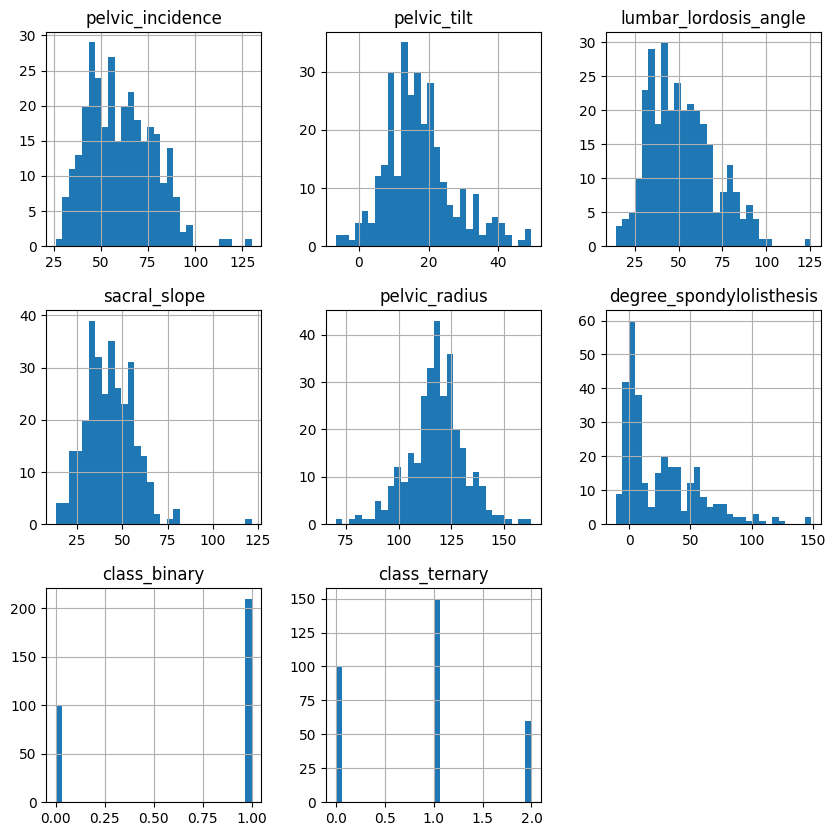

time: 3.31 s (started: 2023-05-18 10:14:37 +00:00)


In [24]:
df_merged.hist(bins=30, figsize=(10,10))
plt.show()

In [25]:
 #sns.pairplot(df_set_2, hue='class_ternary', diag_kind="kde")  

time: 243 µs (started: 2023-05-18 10:14:40 +00:00)


In [26]:
nanCounter = np.isnan(df_merged).sum()
print(nanCounter)

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class_binary                0
class_ternary               0
dtype: int64
time: 8.48 ms (started: 2023-05-18 10:14:40 +00:00)


In [27]:
distinctCounter = df_merged.apply(lambda x: len(x.unique()))
print(distinctCounter)

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class_binary                  2
class_ternary                 3
dtype: int64
time: 2.54 ms (started: 2023-05-18 10:14:40 +00:00)


Conclusion for dataset analysis.
There is only one false value which we corrected.
There are no NaNs and the values seem very unique. 
In 4 out of 6 features is the value different for every sample. So we can conlcude there are no doubles/copies.
We come to the dataset preparation now.

For that I split the df in one with data and two as labels for the training process.


In [28]:
dataX_binary = df_merged.copy().drop(['class_binary','class_ternary'],axis=1)
dataX_ternary = dataX_binary 
dataX = dataX_binary
dataY_binary = df_merged['class_binary'].copy()
dataY_ternary = df_merged['class_ternary'].copy()
dataY_ternary = dataY_ternary.transpose()


time: 2.56 ms (started: 2023-05-18 10:14:40 +00:00)


Rescaling with Sklearn Standart scaler new_feature_value = (old_feature_value - mean) / standart_deviation

In [29]:
features_list = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,features_list] = sX.fit_transform(dataX[features_list])

dataX.describe()

pelvic_incidence   pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count      3.100000e+02  3.100000e+02           3.100000e+02  3.100000e+02   
mean      -9.168293e-17  1.833659e-16           1.375244e-16 -1.031433e-16   
std        1.001617e+00  1.001617e+00           1.001617e+00  1.001617e+00   
min       -1.996010e+00 -2.411664e+00          -2.047652e+00 -2.207741e+00   
25%       -8.173982e-01 -6.881138e-01          -8.060267e-01 -7.168418e-01   
50%       -1.049246e-01 -1.186061e-01          -1.278621e-01 -4.095971e-02   
75%        7.194643e-01  4.581158e-01           5.975493e-01  7.269414e-01   
max        4.029206e+00  3.191402e+00           3.984615e+00  5.855771e+00   

       pelvic_radius  degree_spondylolisthesis  
count   3.100000e+02              3.100000e+02  
mean    4.354939e-16              1.604451e-16  
std     1.001617e+00              1.001617e+00  
min    -3.597963e+00             -1.198606e+00  
25%    -5.423830e-01             -7.792878e-01  
50%     2.613767e-02             -4.426844e-01  
75%     5.676209e-01              5.348967e-01  
max     3.395818e+00              4.093811e+00

time: 71.2 ms (started: 2023-05-18 10:14:40 +00:00)


Visualize the correlation between the features to learn more about the dependencys of the features. We dont have to choose the most important because we have a low feature problem already


# 2.3 Datasplit
Now we prepare the Dataset in train and testset. 
We keep 4/5 for the training as we have a very small dataset.
Later I might try differently.
I prepare some K-Fold algoritm for CrossValidation. We iterate through the training set 5 fold.

In [30]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(dataX,
dataY_binary, test_size=0.2, random_state=random_state, stratify=dataY_binary)

#X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(dataX,
#dataY_ternary, test_size=0.2, random_state=random_state, stratify=dataY_ternary)
#X_train = X_train_b
#X_test = X_test_b
#y_train = y_train_b
#y_test = y_test_b

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

time: 5.71 ms (started: 2023-05-18 10:14:40 +00:00)


In [31]:
print(y_test_b.shape)

(62,)
time: 1.33 ms (started: 2023-05-18 10:14:41 +00:00)


Conclusion Data:
The feature input X is same for both clasification tasks.
So the values are the same.
There are no missing values in the dataset.
There was one broken value which whe have fixed.

We see a strong corelation over most features so we will perform some dimesnion reduction later and see if the model improves through generalization??check here



In [32]:
correlationMatrix = pd.DataFrame(dataX).corr() 
correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)

<ipython-input-32-0a57a5e4fe35>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)


time: 72.1 ms (started: 2023-05-18 10:14:41 +00:00)


We can see a rather strong correlation between the features. Which was already predicted in the paper and makes sens when we model the spine as string of connected static elements. When we rotate one element it causes the connected elements to move as well.
The exception here is the pelvic radius which is relatively uncorrelated to the other features.

##2.5. Dimension reduction


 #5.1 Principal Component Analysis

In [33]:
def scatterPlot(x_DF, y_DF, methodName):
  #Filtering the first two columns (first two dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:1], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension", "Label"]
  sns.lmplot(x="First Dimension", y="Second Dimension", hue="Label", data=df, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Visualization of the data segragation using "+methodName)

time: 771 µs (started: 2023-05-18 10:14:41 +00:00)


In [34]:
def scatterPlot3D(x_DF, y_DF, methodName):
  #Filtering the first two columns (first three dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:2], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension","Third Dimension", "Label"]

  # Plotting the figure:
  fig = px.scatter_3d(df, x='First Dimension', y='Second Dimension', z='Third Dimension',\
                      color='Label', symbol='Label', opacity=0.7, \
                      color_continuous_scale=px.colors.sequential.Viridis,
                      width = 600,
                      height = 500) 

  title = "Visualization of the data segragation using "+methodName
  fig.update_layout(title_text=title, showlegend = True, hovermode = False)
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

  fig.show() 

time: 857 µs (started: 2023-05-18 10:14:41 +00:00)


In [35]:
n_components = 3 # for visualization
whiten = False #Default option
#If auto, the solver is selected by a default policy based on X.shape and n_components:
svd_solver = 'auto'
pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)

time: 1.83 ms (started: 2023-05-18 10:14:41 +00:00)


In [36]:
 #Fit the model with X and apply the dimensionality reduction on X
X_train_PCA = pca.fit_transform(X_train_b)
# Organizing the data:
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train_b.index)
print(pca.explained_variance_ratio_)

[0.56318602 0.20388416 0.11876764]
time: 29.5 ms (started: 2023-05-18 10:14:41 +00:00)


Because of this variance ration we know we can reduce to 5 dimensions without loosing barelly any variance. We can further reduce to 3 and keep nearly 90% variance.

In [38]:
scatterPlot3D(X_train_PCA, y_train_b, "PCA")

time: 1.09 s (started: 2023-05-18 10:15:25 +00:00)


We see from the 3-D plot there is some spatial order in the groups but no cleare seperation is visible.
Lets see if there is anything visible in 2 Dimensions

In [39]:
n_components = 2 # for visualization
whiten = False #Default option
#If auto, the solver is selected by a default policy based on X.shape and n_components:
svd_solver = 'auto'

pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)

time: 551 µs (started: 2023-05-18 10:15:26 +00:00)


In [40]:
 #Fit the model with X and apply the dimensionality reduction on X
X_train_PCA = pca.fit_transform(X_train_b)
# Organizing the data:
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train_b.index)
print(pca.explained_variance_ratio_)

[0.56318602 0.20388416]
time: 3.26 ms (started: 2023-05-18 10:15:26 +00:00)


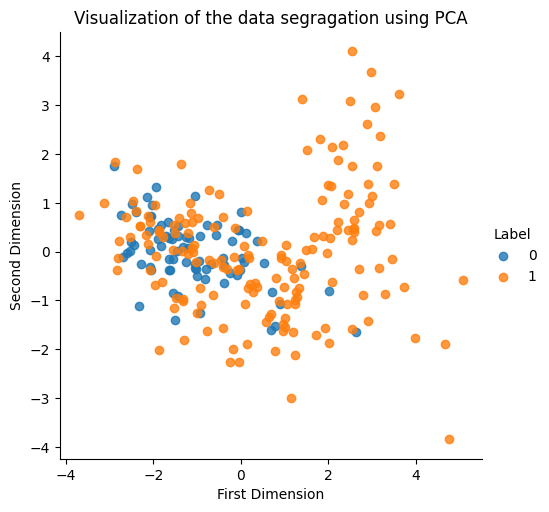

time: 462 ms (started: 2023-05-18 10:15:44 +00:00)


In [42]:
 #Calling our scattering function:
scatterPlot(X_train_PCA, y_train_b, "PCA")

Same picture in 2D. We can see some Grouping of the class "Normal" but we cant draw a clear boundary to class 1

Conclusion:
As we have a small dataset and small feature poblem training will not improve with dimensionality reduction. Neither will the decease in memory consumption matter.
But I expect that the reduction to 3 dimension will not decrease the results dramatically as most of the Variance is keept in the main 3 features after PCA is performed.



# 3.**Model training**

Here I try different models. Starting with simple models and moving to more advanced one. The prediction is that relatively simple models will perform well. We have a low feature,small dataset problem. Furthmore are the features wuite correlated. Which means we could even reduce the dimension of the problem without losing to much information

I will always first train a model for the binary problem set and then one for the ternary

# 3.0 Metric decision
To be able to compare different model performances we have to decide on some Metrics, which we calculate and compare for each model. We have a binary classification task. For this I chose following metrics/means of comparison:

*   ConfusionMatrix
this is the easiest visualisation to check TP FP TN FN
from this metrics we calculate following secondary Metrics
*   Precision/ Positiv prediction value
If we optimize this we make sure every positive prediction is true
*   Accuracy
Accuracy tells us how often the model predictet the true label
*   Recall/ Sensitivity/ True positiv rate
If we optimize this we make sure we get as many of the TP case as possible. This is the case for this task. I imagine a assistens system for medical practicioners that indicates when the should check a patients conditions carefully. A false positive is not very damaging. In contrast it could make a practinioner check patients thouroughly which dont have a painfull condition yet. So this could help in a case where the condition(skeleton position) for wear is given that a painfull condition may occure soon/ in future. 
We could obtain a kind of predictive maintnance system for humans.
*   F1
harmonic mean between precision and recall
*   F2
this doubles the influence of recall and is for this more interesting in our case than F1

* ROC Curve and ROC AUC
Tradeoff  TPR and  FPR visualization, 
optimize to the top left or the area under the curve


Our dataset is relatively balanced 100/110 so we can use this basic metrics. There is advanced metrics for very imbalanced class distributions







#3.0.1 Loss function
we need a loss function to minimize in training.

We use logloss for most basline models (Cross entropy equiv. for classification)

and Binary cross-entropy for ANNs because we have a binary classification



# 3.1.**Logistic regression**






In [43]:
# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2023
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

time: 752 µs (started: 2023-05-18 10:15:45 +00:00)


In [44]:
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_b.index,columns=[0,1])
model = logReg

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_b)),y_train_b.ravel()):

  #'iloc' can be used when the user doesn’t know the index label:
  #Here we are filtering the data based on indices. 
  X_train_fold, X_cv_fold = X_train_b.iloc[train_index,:], X_train_b.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train_b.iloc[train_index], y_train_b.iloc[cv_index]


  model.fit(X_train_fold, y_train_fold)

  # We will fisrt look log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)

  #Lets see how good it is on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#Lets see the overall log loss for the entire training set (1127)
loglossLogisticRegression = log_loss(y_train_b,predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.2876303762918901
CV Log Loss:  0.3461298325235039
Training Log Loss:  0.28362385695344644
CV Log Loss:  0.389338019792247
Training Log Loss:  0.30608334504580914
CV Log Loss:  0.28564720424715495
Training Log Loss:  0.31003402090798454
CV Log Loss:  0.2739845502501489
Training Log Loss:  0.31245258729500747
CV Log Loss:  0.2859915290562842
Logistic Regression Log Loss:  0.316510406105486
time: 84.2 ms (started: 2023-05-18 10:15:45 +00:00)


findings:

training loss for 3/5 splits lager than the test loss

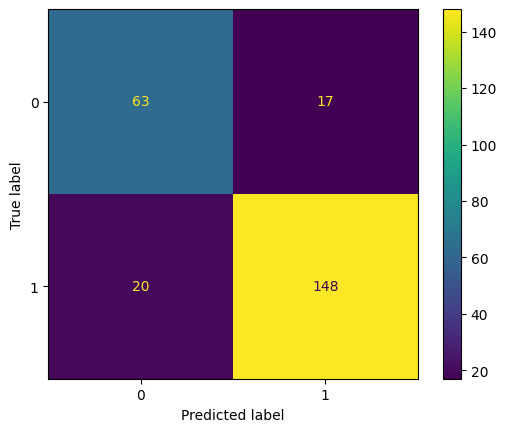

time: 173 ms (started: 2023-05-18 10:15:45 +00:00)


In [45]:
y_preds = model.predict(X_train_b)
cm =confusion_matrix(y_train_b,y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Precision/Recall

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.97')

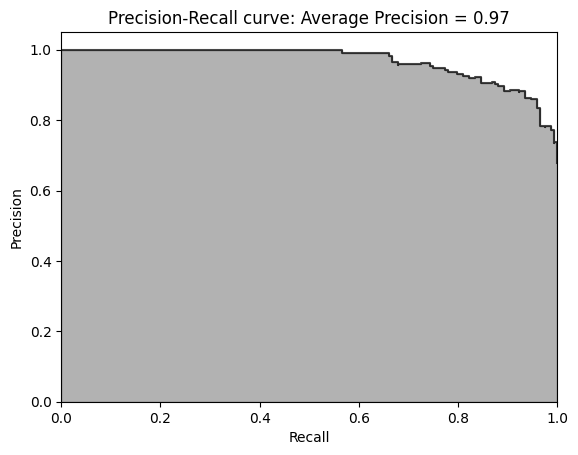

time: 192 ms (started: 2023-05-18 10:15:45 +00:00)


In [46]:
preds = pd.concat([y_train_b,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

ROC


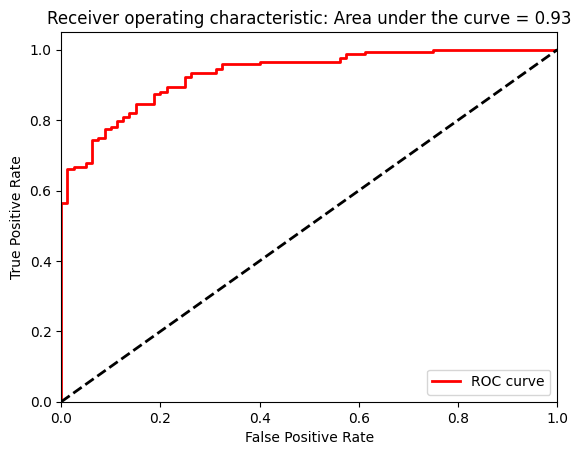

time: 174 ms (started: 2023-05-18 10:15:45 +00:00)


In [47]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Logistic Regression is a binary algorithm, you can use it binary for each class. I might use it later but I suggest there is better performing algorith.

# 3.2 Gradient descent Models(SVM)

In [48]:
loss = 'modified_huber'
penalty = 'elasticnet'
l1_ratio = 0.15
learning_rate = 'optimal'
alpha = 0.0001
early_stopping = False
validation_fraction = 0.05
random_state = 2023
SGD = SGDClassifier(loss=loss, penalty=penalty, alpha=alpha,l1_ratio=l1_ratio, 
                    early_stopping=early_stopping, learning_rate=learning_rate, 
                    validation_fraction= validation_fraction, random_state=random_state)

time: 833 µs (started: 2023-05-18 10:15:46 +00:00)


In [49]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_b.index,columns=[0,1])

model = SGD

for train_index, cv_index in k_fold.split(np.zeros(len(X_train_b)),y_train_b.ravel()):


  X_train_fold, X_cv_fold = X_train_b.iloc[train_index,:], X_train_b.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train_b.iloc[train_index], y_train_b.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)

  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#_______________#
#___Modified:___#
loglossSGD = log_loss(y_train_b,predictionsBasedOnKFolds.loc[:,1])
print('-----------------------------------')
print('SGD Log Loss: ', loglossSGD)

Training Log Loss:  4.3869379833827775
CV Log Loss:  6.487857610041087
Training Log Loss:  3.859736783895498
CV Log Loss:  5.791158617097242
Training Log Loss:  5.652097030871229
CV Log Loss:  4.365335780870783
Training Log Loss:  5.63694419824223
CV Log Loss:  4.413508578259243
Training Log Loss:  9.631186864960837
CV Log Loss:  9.592138885563571
-----------------------------------
SGD Log Loss:  6.122960992450699
time: 46.7 ms (started: 2023-05-18 10:15:46 +00:00)


Something seems broken here. Loss is  high

# Functionalising the model training

After seeing how didious the training of many baseline models will be, considering all the plotting all the metrics etc. as well as the linear form of this notebook presentaion I decided to funcionalise the training and plotting. 
Credit to Marious Steger from whom I took some inspiration.

Training, documenting and evaluation pipeline.
The idea to not write all the code each time. 
For this we create a function that has the arguments:

*   K-folds
*   training data
*   loss function
*   metric for evaluation
*   arguments as strings for ducumentation
*   dataframe to store all model results


The fuctions fits a model for each k-folded data and safes the metrices

Compute overall scores/metrices

plotting

safe the final score in df for model comparison



In [50]:
 summary = pd.DataFrame()

time: 681 µs (started: 2023-05-18 10:15:46 +00:00)


In [51]:
def cv_training(model, k_fold, X_train, y_train, loss_fn=None, metric_fn=None, name="", name_loss="", name_metric="", xgboost: bool = False, df: pd.DataFrame = None):
  #Lists for storing scores
  trainingScores = []
  cvScores = []
  predictionsBasedOnKFolds = pd.DataFrame(data=[],index=np.arange(y_train.shape[0]),columns=[0,1])

  #kfold.split will generate indices to split data into training and validation set (cv):
  for train_index, cv_index in k_fold.split(X_train, y_train):


    #Here we are filtering the data based on indices.
    X_train_fold, X_cv_fold = X_train.values[train_index], X_train.values[cv_index]
    y_train_fold, y_cv_fold = y_train.values[train_index], y_train.values[cv_index]

    #Fitting the model according to given data:
    if xgboost:
      model.fit(X_train_fold, y_train_fold, early_stopping_rounds=5, verbose=True,
                  eval_set=[(X_train.values[cv_index], y_train.values[cv_index])])
    else:
      model.fit(X_train_fold, y_train_fold)
    
    # We will first look log loss in the training dataset. 
    
    lossTraining = loss_fn(y_train_fold, model.predict_proba(X_train_fold)[:,1])
   
    #Saving our analysis on the list:
    trainingScores.append(lossTraining)

    #Lets see how good it is on CV dataset:
    predictionsBasedOnKFolds.loc[cv_index,:] = model.predict_proba(X_cv_fold)
   
    lossCV = loss_fn(y_cv_fold, predictionsBasedOnKFolds.loc[cv_index, 1])
    #Saving our analysis on the list:
    cvScores.append(lossCV)

    #printing the results:
    print('Training {}: '.format(name_loss), lossTraining)
    print('CV {}: '.format(name_loss), lossCV)

  #Lets see the overall log loss for the entire training set (1127)
  overall_loss = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
  print('\nOverall {} {}: '.format(name, name_loss), overall_loss)
  if metric_fn is not None:
    overall_metric = metric_fn(y_train, np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)))
    print('Overall {} {}: '.format(name, name_metric), overall_metric)

  try:
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle('{} CV-Metrics'.format(name))

    # Confusion Matrix
    if xgboost:
      y_preds = np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)
      cm = confusion_matrix(y_train, y_preds)
      dp = ConfusionMatrixDisplay(cm, display_labels=np.array([0, 1]))
      dp.plot(ax=axs[0, 0])
    else:
      y_preds = np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)
      cm = confusion_matrix(y_train, y_preds)
      #plot_confusion_matrix(model,X_train,y_train,cmap='Blues', ax=axs[0,0])
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot(ax=axs[0, 0])
      
    try:
      # Precision Recall Curve
      preds = pd.DataFrame(np.array([y_train.values, np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)]).T, columns=["label", "prediction"])
      preds.columns = ['trueLabel','prediction']
      precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
      average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
      average_recall = recall_score(preds['trueLabel'], preds['prediction'])

      axs[0, 1].step(recall, precision, color='k', alpha=0.8, where='post')
      axs[0, 1].fill_between(recall, precision, step='post', alpha=0.3, color='k')
      axs[0, 1].set_xlabel('Recall')
      axs[0, 1].set_ylabel('Precision')
      axs[0, 1].set_ylim([0.0, 1.05])
      axs[0, 1].set_xlim([0.0, 1.0])
      axs[0, 1].hlines(average_precision, xmin=0, xmax=1)
      axs[0, 1].set_title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))
    except BaseException as e:
      print(e)
      average_precision = -1
      average_recall = -1
      axs[0, 1].axis('off')

    # Area under the Receiver Operating Characteristic (ROC) Curve
    try:
      fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
      areaUnderROC = auc(fpr, tpr)
      axs[1, 0].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
      axs[1, 0].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
      axs[1, 0].set_xlim([0.0, 1.0])
      axs[1, 0].set_ylim([0.0, 1.05])
      axs[1, 0].set_xlabel('False Positive Rate')
      axs[1, 0].set_ylabel('True Positive Rate')
      axs[1, 0].set_title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
      axs[1, 0].legend(loc="lower right")
    except BaseException:
      areaUnderROC = -1
      axs[1, 0].axis('off')

    axs[1, 1].axis('off')
    plt.show()
  except BaseException:
    return None, model
  print("test_1")
  
  # append to summary df
  if df is not None:
    tn, fp, fn, tp = cm.ravel()
    run = pd.DataFrame.from_dict({'{}'.format(name): [overall_loss, overall_metric, average_precision, average_recall, areaUnderROC, float(fp) / y_train.sum(), float(fn) / (y_train.shape[0] - y_train.sum())]})
    run.index = ["Loss" if name_loss == "" else name_loss, "Metric" if name_metric == "" else name_metric, "avg. Precision", "avg. Recall", "AUC", "FPR", "FNR"]
    tmp = pd.concat([df.copy(), run], axis=1)
    print("test_2 in first if condition") 
    return predictionsBasedOnKFolds, model, tmp
    
  else:
    print("test_3_return final")
    return predictionsBasedOnKFolds, model

time: 2.12 ms (started: 2023-05-18 10:15:46 +00:00)


In [52]:
def score_predictions(predictions, y_train):
  fig, axs = plt.subplots(2, 2, figsize=(15,15))
  fig.suptitle('{} CV-Metrics'.format("Ensemble"))

  # Confusion Matrix
  cm = confusion_matrix(y_train, np.round(predictions.loc[:, 1].astype(float)))
  dp = ConfusionMatrixDisplay(cm, display_labels=np.array([0, 1]))
  dp.plot(ax=axs[0, 0])

  # Precision Recall Curve
  preds = pd.DataFrame(np.array([y_train.values, np.round(predictions.loc[:, 1].astype(float)).values.astype(int)]).T, columns=["label", "prediction"])
  preds.columns = ['trueLabel','prediction']
  precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
  average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

  axs[0, 1].step(recall, precision, color='k', alpha=0.8, where='post')
  axs[0, 1].fill_between(recall, precision, step='post', alpha=0.3, color='k')
  axs[0, 1].set_xlabel('Recall')
  axs[0, 1].set_ylabel('Precision')
  axs[0, 1].set_ylim([0.0, 1.05])
  axs[0, 1].set_xlim([0.0, 1.0])
  axs[0, 1].hlines(average_precision, xmin=0, xmax=1)
  axs[0, 1].set_title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


  # Area under the Receiver Operating Characteristic (ROC) Curve
  fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
  areaUnderROC = auc(fpr, tpr)
  axs[1, 0].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  axs[1, 0].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  axs[1, 0].set_xlim([0.0, 1.0])
  axs[1, 0].set_ylim([0.0, 1.05])
  axs[1, 0].set_xlabel('False Positive Rate')
  axs[1, 0].set_ylabel('True Positive Rate')
  axs[1, 0].set_title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
  axs[1, 0].legend(loc="lower right")
  
  axs[1, 1].axis('off')
  plt.show()

time: 1.19 ms (started: 2023-05-18 10:15:46 +00:00)


#3.5 Another Logostic regression

In [53]:
# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

time: 585 µs (started: 2023-05-18 10:15:46 +00:00)


Training Log Loss:  0.2876303762918901
CV Log Loss:  0.3461298325235039
Training Log Loss:  0.28362385695344644
CV Log Loss:  0.389338019792247
Training Log Loss:  0.30608334504580914
CV Log Loss:  0.28564720424715495
Training Log Loss:  0.31003402090798454
CV Log Loss:  0.27398455025014895
Training Log Loss:  0.31245258729500747
CV Log Loss:  0.2859915290562842

Overall Logistic Regression Log Loss:  0.316510406105486
Overall Logistic Regression Accuracy:  0.8548387096774194


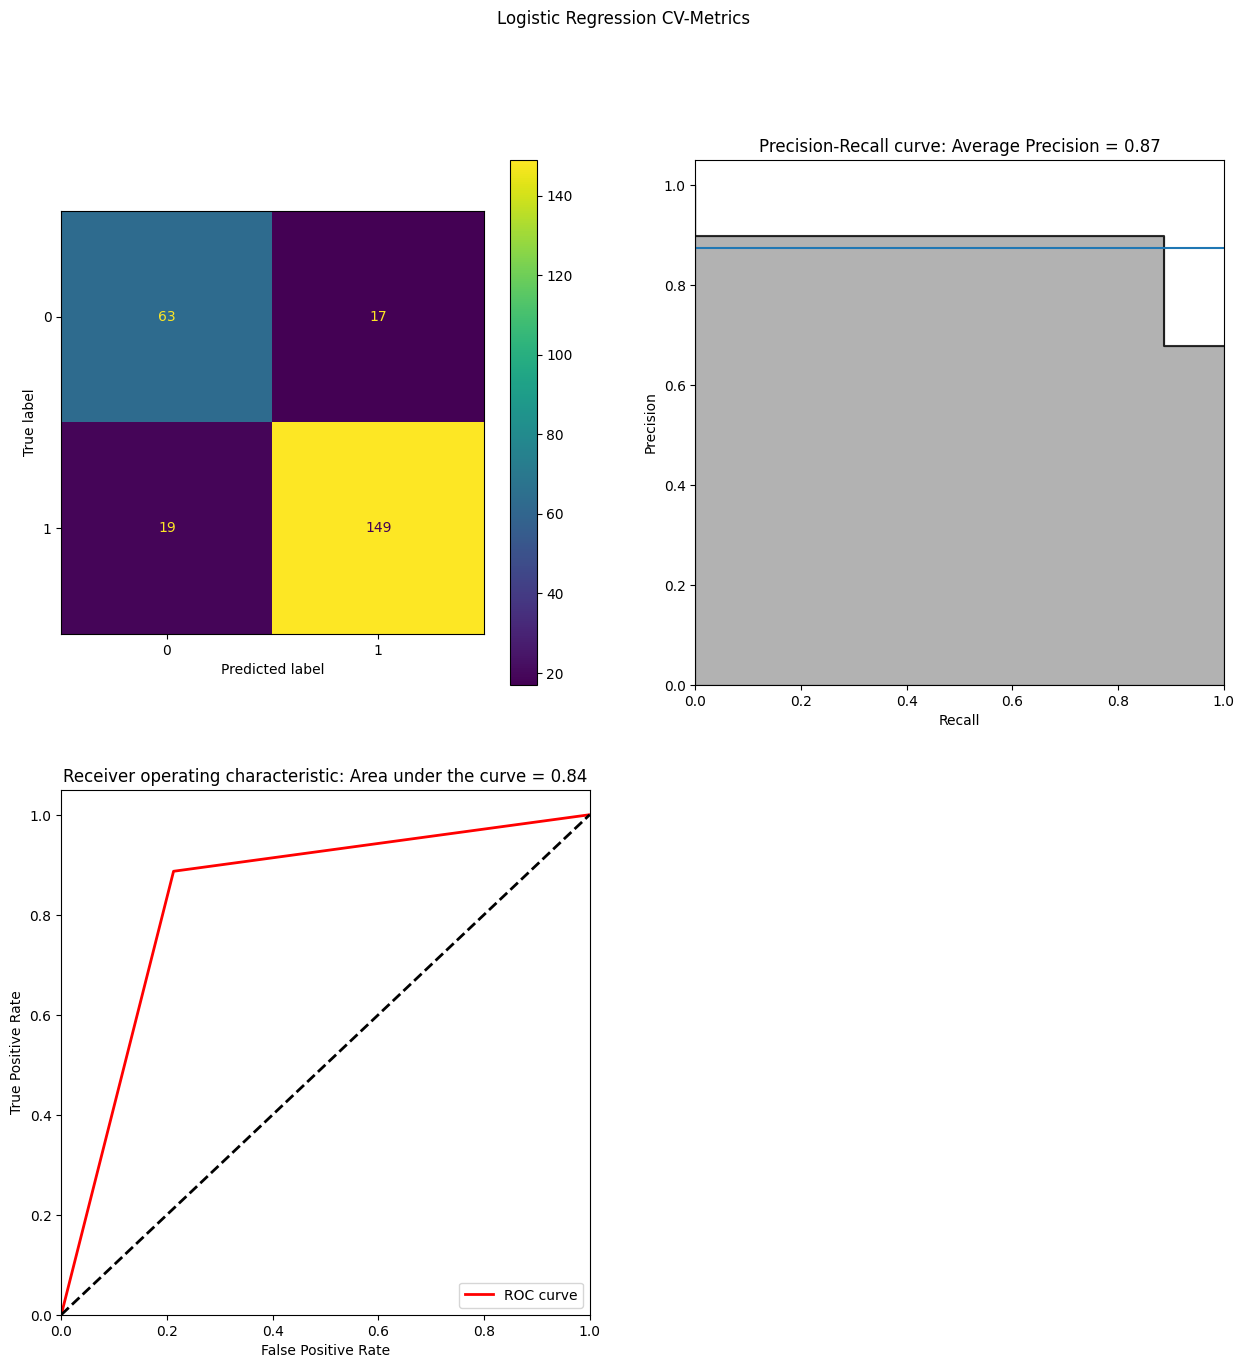

test_1
test_2 in first if condition
            0         1
0    0.720783  0.279217
1    0.690312  0.309688
2    0.768706  0.231294
3    0.710721  0.289279
4    0.003866  0.996134
..        ...       ...
243  0.849811  0.150189
244  0.012531  0.987469
245  0.176315  0.823685
246  0.171372  0.828628
247  0.345016  0.654984

[248 rows x 2 columns] ... LogisticRegression(random_state=2023, solver='liblinear')
time: 546 ms (started: 2023-05-18 10:15:46 +00:00)


In [54]:
predictions_logReg, trained_logReg, summary= cv_training(
    logReg, k_fold, X_train_b, y_train_b, name="Logistic Regression",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)
print(predictions_logReg,"...", trained_logReg)

#3.6 linear upport vector machine

In [55]:
 # Hyperparameters:
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
kernel='linear'
gamma='auto'
linSVC = SVC(C=C,random_state=random_state, kernel=kernel, gamma=gamma, probability=True)

time: 691 µs (started: 2023-05-18 10:15:46 +00:00)


Training Log Loss:  0.27436070164653875
CV Log Loss:  0.34859038656741964
Training Log Loss:  0.26789512585070874
CV Log Loss:  0.4085757084815377
Training Log Loss:  0.2921681413805491
CV Log Loss:  0.27495574932251204
Training Log Loss:  0.29598908770519405
CV Log Loss:  0.2515884068469861
Training Log Loss:  0.3012856031824951
CV Log Loss:  0.249650872553969

Overall Linear SVM Log Loss:  0.3071242617307269
Overall Linear SVM Accuracy:  0.8508064516129032


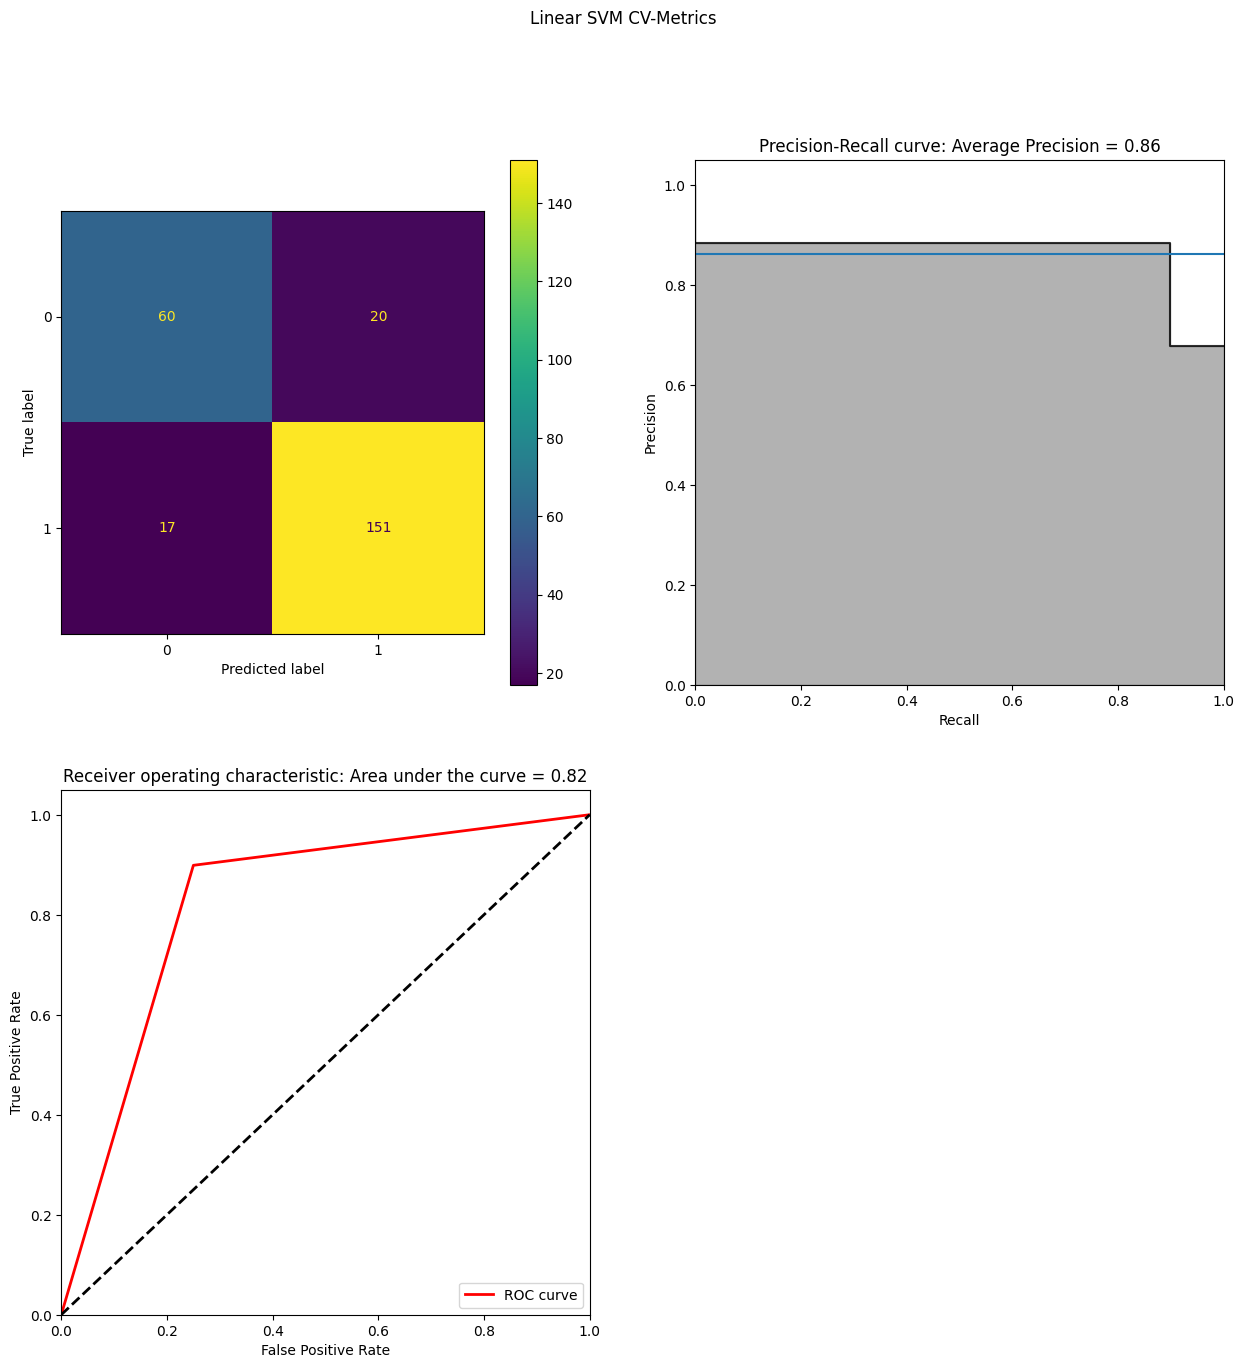

test_1
test_2 in first if condition
time: 593 ms (started: 2023-05-18 10:15:46 +00:00)


In [56]:
 predictions_linSVC, trained_linSVC,summary = cv_training(
    linSVC, k_fold, X_train_b, y_train_b, name="Linear SVM",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.7 RBF Support Vetor machine

In [57]:
 # Hyperparameters:
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
kernel='rbf'
gamma='auto'
linRBF = SVC(C=C,random_state=random_state, kernel=kernel, gamma=gamma, probability=True)

time: 486 µs (started: 2023-05-18 10:15:47 +00:00)


Training Log Loss:  0.26678651907726225
CV Log Loss:  0.3400007421909272
Training Log Loss:  0.2544015032856149
CV Log Loss:  0.41563228839816924
Training Log Loss:  0.27501469567483083
CV Log Loss:  0.29785435042964503
Training Log Loss:  0.29986735421477695
CV Log Loss:  0.22356708852892485
Training Log Loss:  0.28524879357446176
CV Log Loss:  0.329853030508009

Overall RBF SVM Log Loss:  0.3217417535634953
Overall RBF SVM Accuracy:  0.8588709677419355


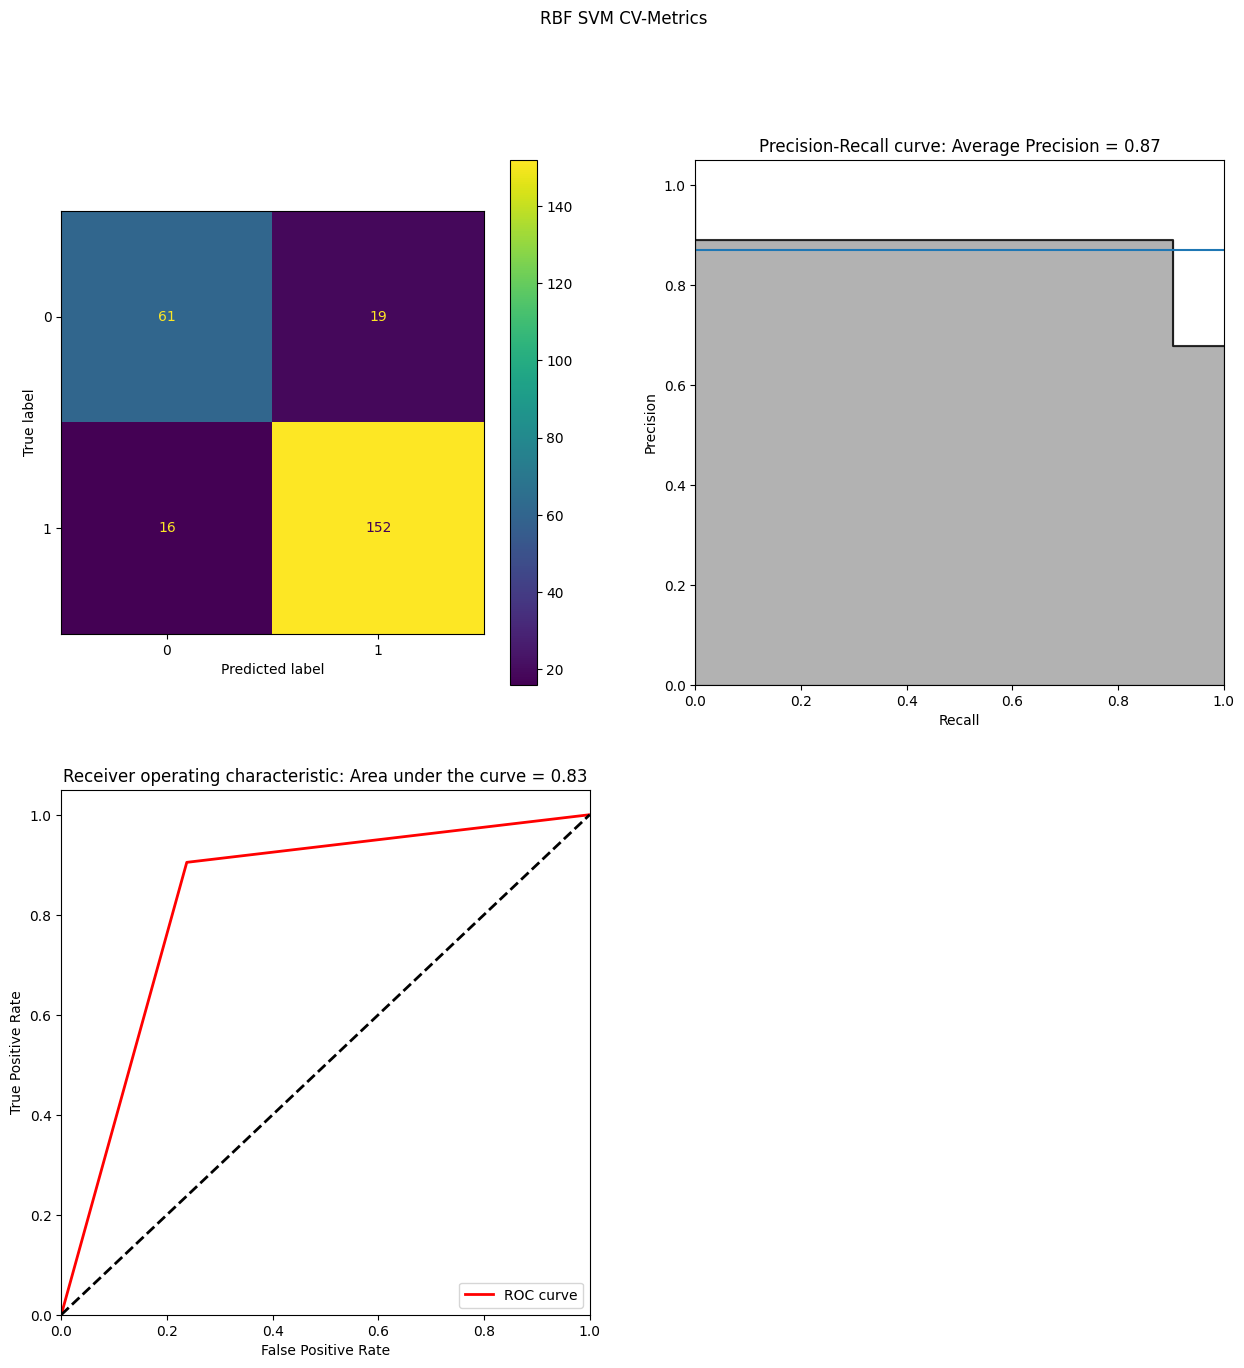

test_1
test_2 in first if condition
time: 572 ms (started: 2023-05-18 10:15:47 +00:00)


In [58]:
 predictions_linRBF, trained_linRBF,summary = cv_training(
    linRBF, k_fold, X_train_b, y_train_b, name="RBF SVM",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.8 SGD with modiefied huber

In [164]:
# Hyperparameters:
loss='modified_huber'
penalty='elasticnet'
alpha=.001
l1_ratio=0.15
max_iter=1000
early_stopping=True
logSGD = SGDClassifier(early_stopping=early_stopping, l1_ratio=l1_ratio, random_state=random_state, loss=loss, penalty=penalty, alpha=alpha, max_iter=max_iter,)

time: 581 µs (started: 2023-05-18 12:03:35 +00:00)


Training modified_huber:  5.480473223271173
CV modified_huber:  2.9547795385875166
Training modified_huber:  4.01914561542774
CV modified_huber:  6.537279922374532
Training modified_huber:  4.016353726373808
CV modified_huber:  3.6895863924103414
Training modified_huber:  5.811049328775302
CV modified_huber:  5.8978767322056
Training modified_huber:  5.825450383728551
CV modified_huber:  4.465846394863575

Overall Logistic Regression with SGD modified_huber:  4.705260991512133
Overall Logistic Regression with SGD Accuracy:  0.8467741935483871


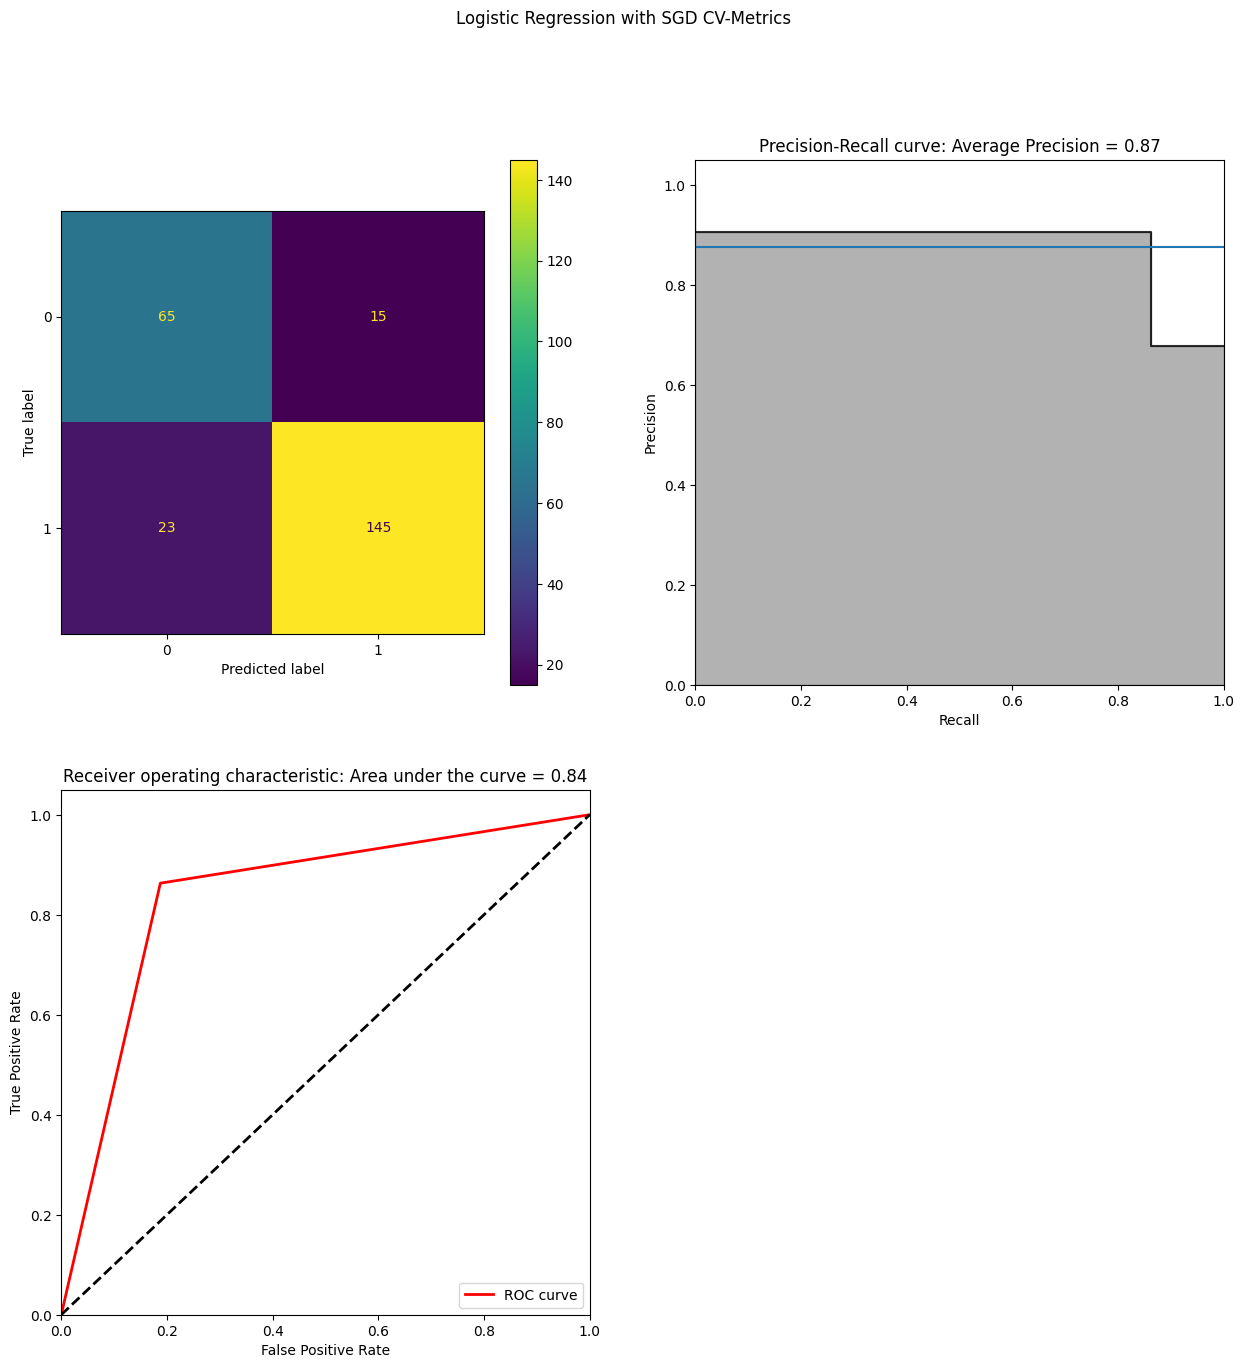

test_1
test_2 in first if condition
time: 604 ms (started: 2023-05-18 12:03:37 +00:00)


In [165]:
 predictions_SGDhuber, trained_logSGDhuber,summary = cv_training(
    logSGD, k_fold, X_train_b, y_train_b, name="Logistic Regression with SGD",
    loss_fn=log_loss, name_loss="modified_huber", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.10 SGD log

In [61]:
# Hyperparameters:
loss='log'
penalty='elasticnet'
alpha=.001
l1_ratio=0.15
max_iter=1000
early_stopping=True
logSGD = SGDClassifier(early_stopping=early_stopping, l1_ratio=l1_ratio, random_state=random_state, loss=loss, penalty=penalty, alpha=alpha, max_iter=max_iter,)

time: 648 µs (started: 2023-05-18 10:15:48 +00:00)


Training SVM_log:  0.4195545950568309
CV SVM_log:  0.4355148071358914
Training SVM_log:  0.30367653263293415
CV SVM_log:  0.4649343574222633
Training SVM_log:  0.7843213531943286
CV SVM_log:  0.6629828408755517
Training SVM_log:  0.34502765928527707
CV SVM_log:  0.3543553225888642
Training SVM_log:  0.4512731373979358
CV SVM_log:  0.3985820924971279

Overall Logistic Regression with SGD SVM_log:  0.4639739258503989
Overall Logistic Regression with SGD Accuracy:  0.8064516129032258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

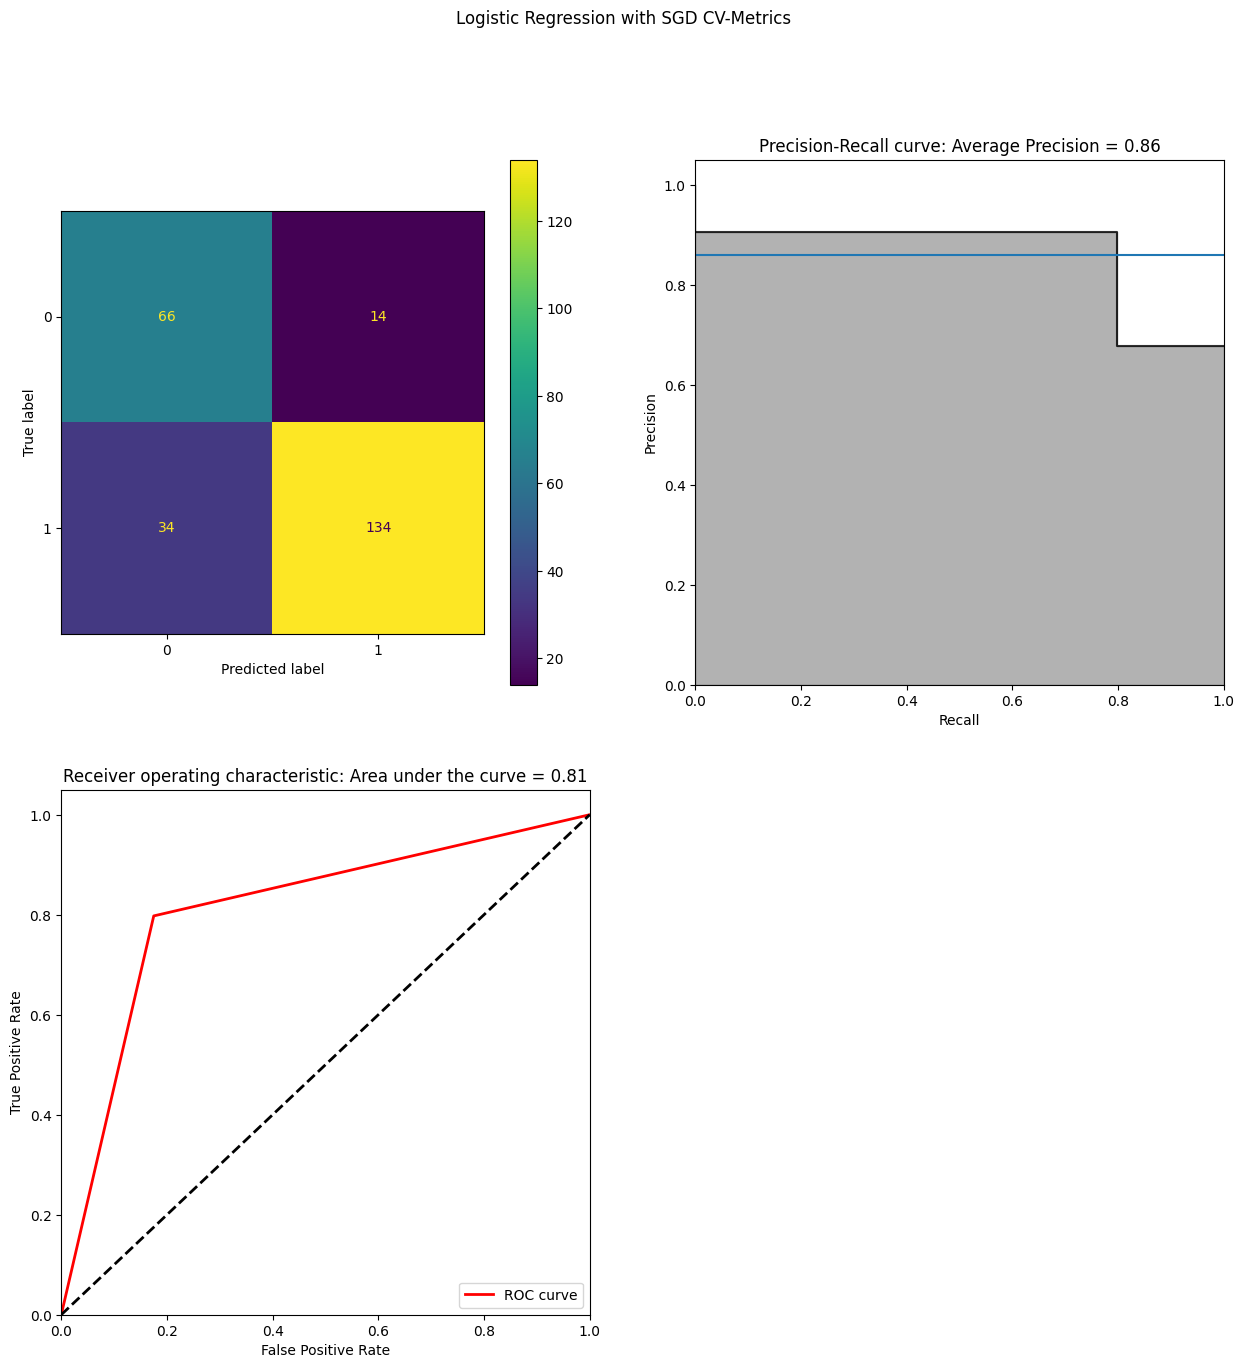

test_1
test_2 in first if condition
time: 560 ms (started: 2023-05-18 10:15:48 +00:00)


In [62]:
 predictions_logSGD, trained_logSGD,summary = cv_training(
    logSGD, k_fold, X_train_b, y_train_b, name="Logistic Regression with SGD",
    loss_fn=log_loss, name_loss="SVM_log", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.11 K nearest Neighbour

In [63]:
n_neighbors=5
weights='uniform' # ‘uniform’, ‘distance’
p=2 # Power parameter for the Minkowski metric, 1=manhattan dist, 2=euclidean (l2)
metric='minkowski'
leaf_size=30
kClas = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, 
                             algorithm='auto', leaf_size=leaf_size, p=p, metric=metric)

time: 627 µs (started: 2023-05-18 10:15:49 +00:00)


Training Log Loss:  0.24502865630808182
CV Log Loss:  1.006638448268431
Training Log Loss:  0.21865816981610248
CV Log Loss:  1.045077748766091
Training Log Loss:  0.2461499443784577
CV Log Loss:  1.7026156200738505
Training Log Loss:  0.26572761567005504
CV Log Loss:  0.25685496155532717
Training Log Loss:  0.266079480325694
CV Log Loss:  0.3025293813891328

Overall KNeighbors Classifier Log Loss:  0.8674452566923272
Overall KNeighbors Classifier Accuracy:  0.8266129032258065


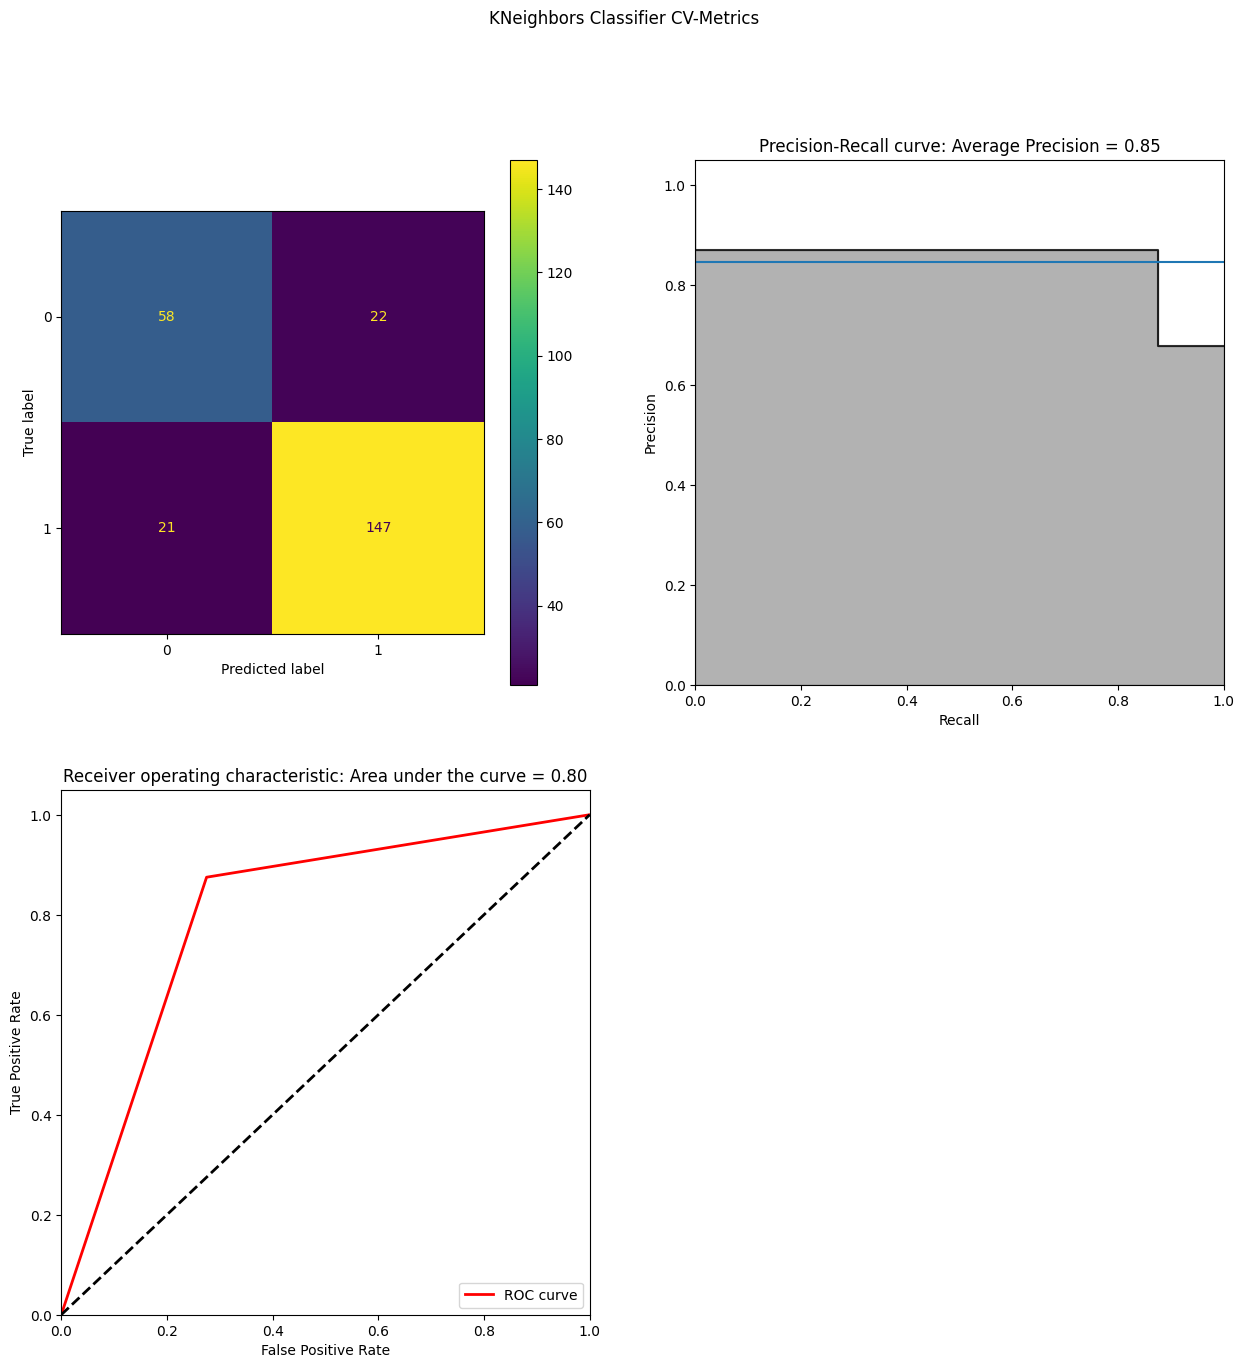

test_1
test_2 in first if condition
time: 743 ms (started: 2023-05-18 10:15:49 +00:00)


In [64]:
 predictions_kClas, trained_kClas,summary= cv_training(
    kClas, k_fold, X_train_b, y_train_b, name="KNeighbors Classifier",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.12 Decision tree

In [65]:
criterion='gini'
max_depth=5
min_samples_split=2
min_samples_leaf=1
tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                              min_samples_split=min_samples_split, random_state=random_state)

time: 1.07 ms (started: 2023-05-18 10:15:49 +00:00)


Training Log Loss:  0.08688312121650472
CV Log Loss:  4.4568446064970395
Training Log Loss:  0.07422184580301468
CV Log Loss:  5.864641608079411
Training Log Loss:  0.12064509780818077
CV Log Loss:  2.300931518292486
Training Log Loss:  0.10574524211958838
CV Log Loss:  4.531908211259026
Training Log Loss:  0.13182498695543143
CV Log Loss:  5.2481915976335465

Overall Decision Tree Log Loss:  4.477200714835415
Overall Decision Tree Accuracy:  0.8266129032258065


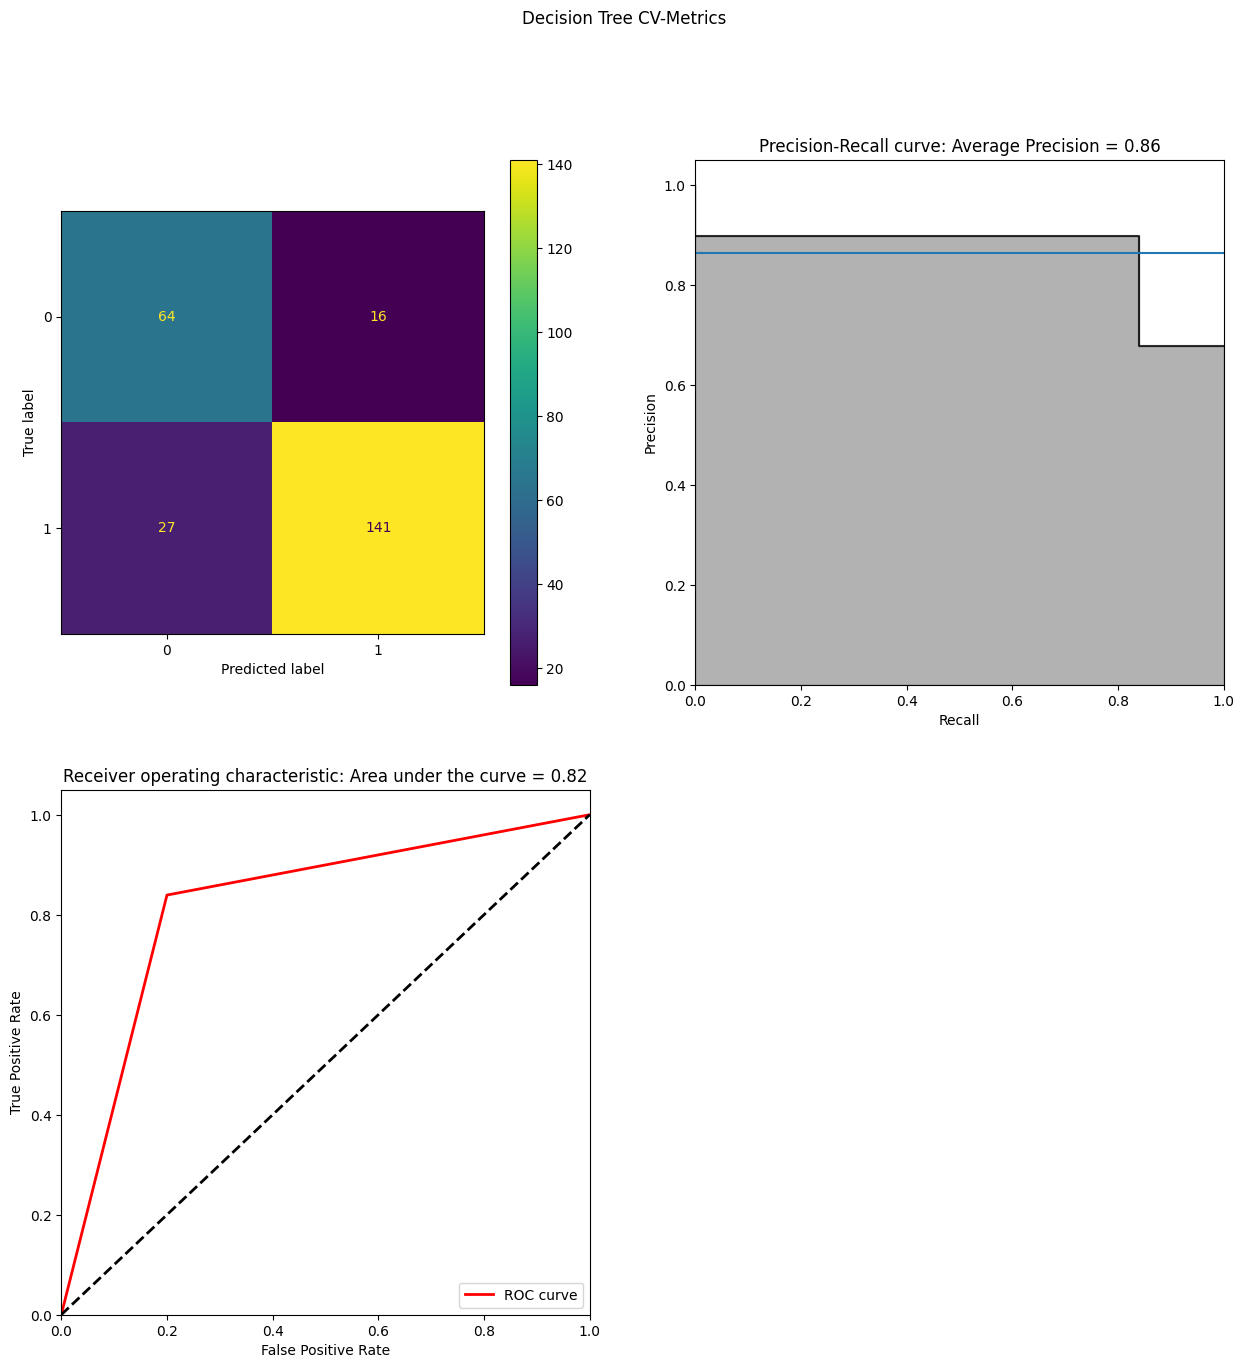

test_1
test_2 in first if condition
time: 1.23 s (started: 2023-05-18 10:15:49 +00:00)


In [66]:
 predictions_tree, trained_model_tree,summary= cv_training(
    tree, k_fold, X_train_b, y_train_b, name="Decision Tree",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.13 Random Forest


In [67]:
criterion='gini'
max_depth=5
min_samples_split=2
min_samples_leaf=1
n_estimators = 100
max_features = 'sqrt' # Number of features to consider at every split
bootstrap = True # Method of selecting samples for training each tree

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


forest = RandomForestClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                min_samples_split=min_samples_split, bootstrap=bootstrap,
                                max_features=max_features, n_estimators=n_estimators, random_state=random_state)

time: 952 µs (started: 2023-05-18 10:15:51 +00:00)


Training Log Loss:  0.16915354920100714
CV Log Loss:  0.34386480518591744
Training Log Loss:  0.15348497758166996
CV Log Loss:  0.39652908561725214
Training Log Loss:  0.17525923799346105
CV Log Loss:  0.33060724952805104
Training Log Loss:  0.17827649011314628
CV Log Loss:  0.24883971868951835
Training Log Loss:  0.17620826303787518
CV Log Loss:  0.29350076382823803

Overall Random Forest Log Loss:  0.32308363169327053
Overall Random Forest Accuracy:  0.8588709677419355


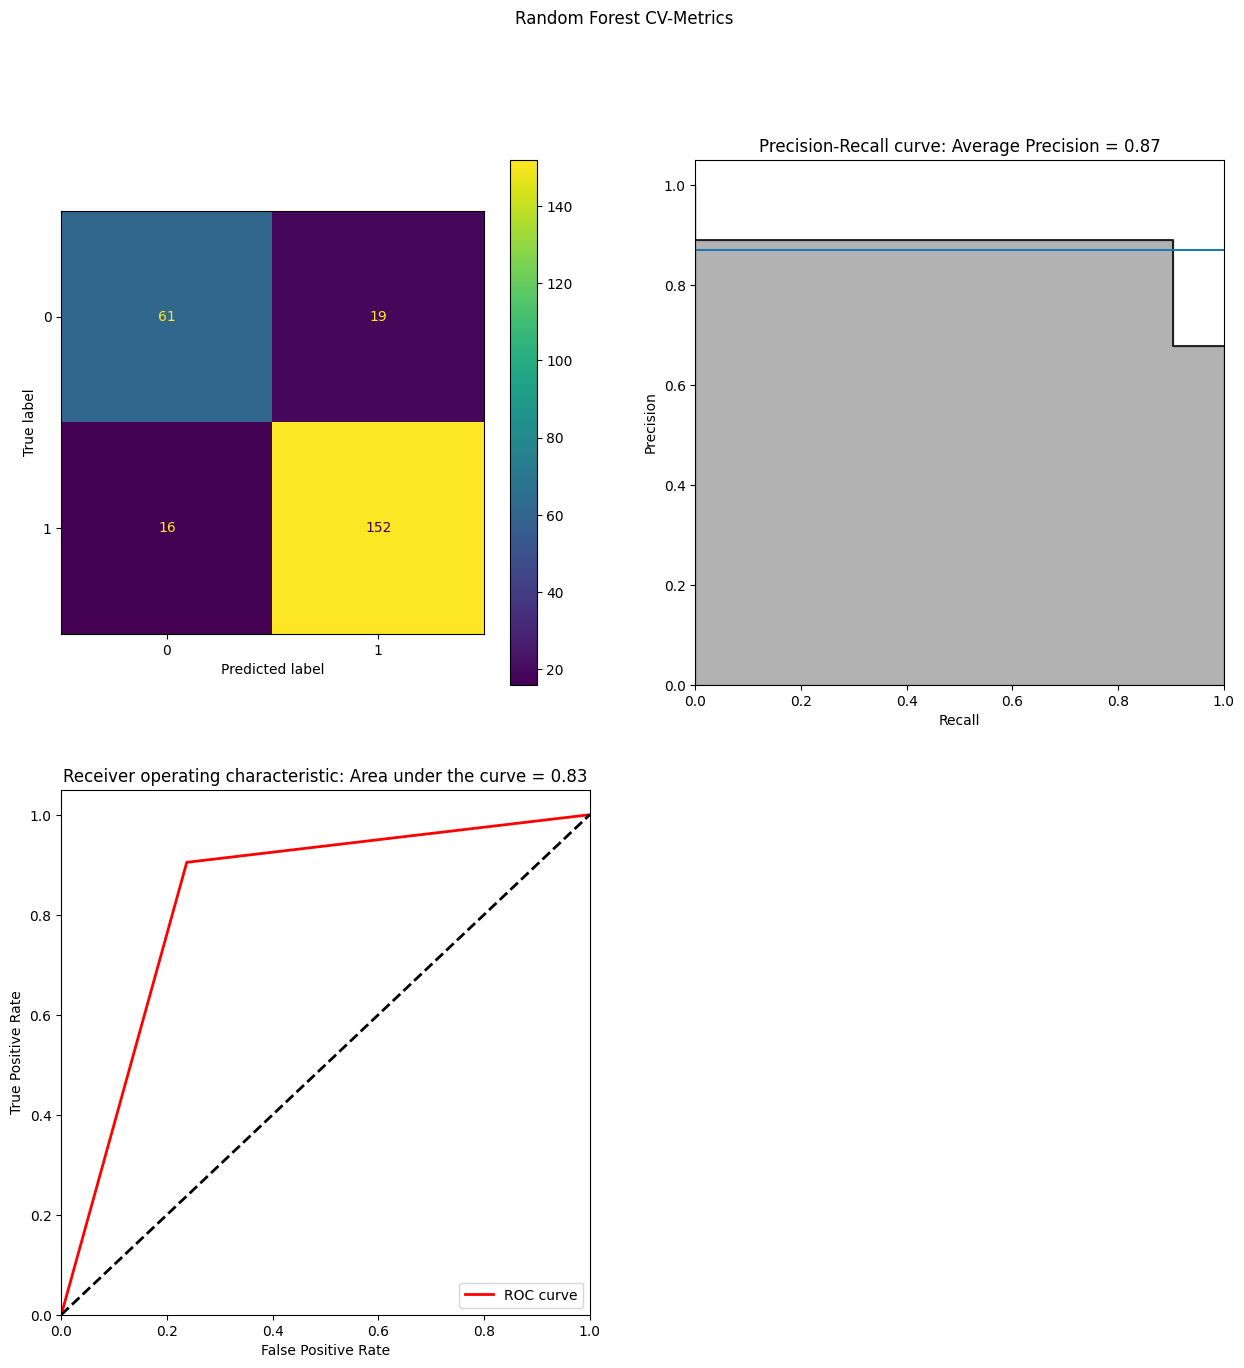

test_1
test_2 in first if condition
pelvic_incidence 0.12526193594435373
pelvic_tilt 0.15726500861068124
lumbar_lordosis_angle 0.09322294139279703
sacral_slope 0.1166459440379362
pelvic_radius 0.19959650189555403
degree_spondylolisthesis 0.30800766811867786
time: 1.27 s (started: 2023-05-18 10:15:51 +00:00)


In [68]:
 predictions_forest, trained_forest,summary = cv_training(
    forest, k_fold, X_train_b, y_train_b, name="Random Forest",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)
#pred_comp = model.fit(X_train, y_train)
names_features = df_merged.columns.values.tolist()[0:-2]
for name, score in zip(names_features, trained_forest.feature_importances_):
    print(name, score)

This scoring of feature importance is really interesting. We see that 5 out of 6 features are relatively similar important. We remember the CorrMatrix with similar corr scores. This all seems logical as we have a string of mechanical connected elements(spine).

#3.14 Gausian RBF

In [69]:
kernel = 1.0 * RBF(1.0)
n_restarts_optimizer = 5
optimizer='fmin_l_bfgs_b'
gausClas = GaussianProcessClassifier(kernel=kernel, optimizer=optimizer,
                                     random_state=random_state, n_restarts_optimizer=n_restarts_optimizer)

time: 625 µs (started: 2023-05-18 10:15:52 +00:00)


Training Log Loss:  0.26424850867924576
CV Log Loss:  0.33982631299967614
Training Log Loss:  0.25554729041916513
CV Log Loss:  0.37570727640682267
Training Log Loss:  0.28270426972450075
CV Log Loss:  0.2692699872530084
Training Log Loss:  0.2936371756149017
CV Log Loss:  0.24751001431362835
Training Log Loss:  0.28882641157009586
CV Log Loss:  0.28621695615187354

Overall Gaussian Process Classifier (RBF-Kernel) Log Loss:  0.3040032273620361
Overall Gaussian Process Classifier (RBF-Kernel) Accuracy:  0.8508064516129032


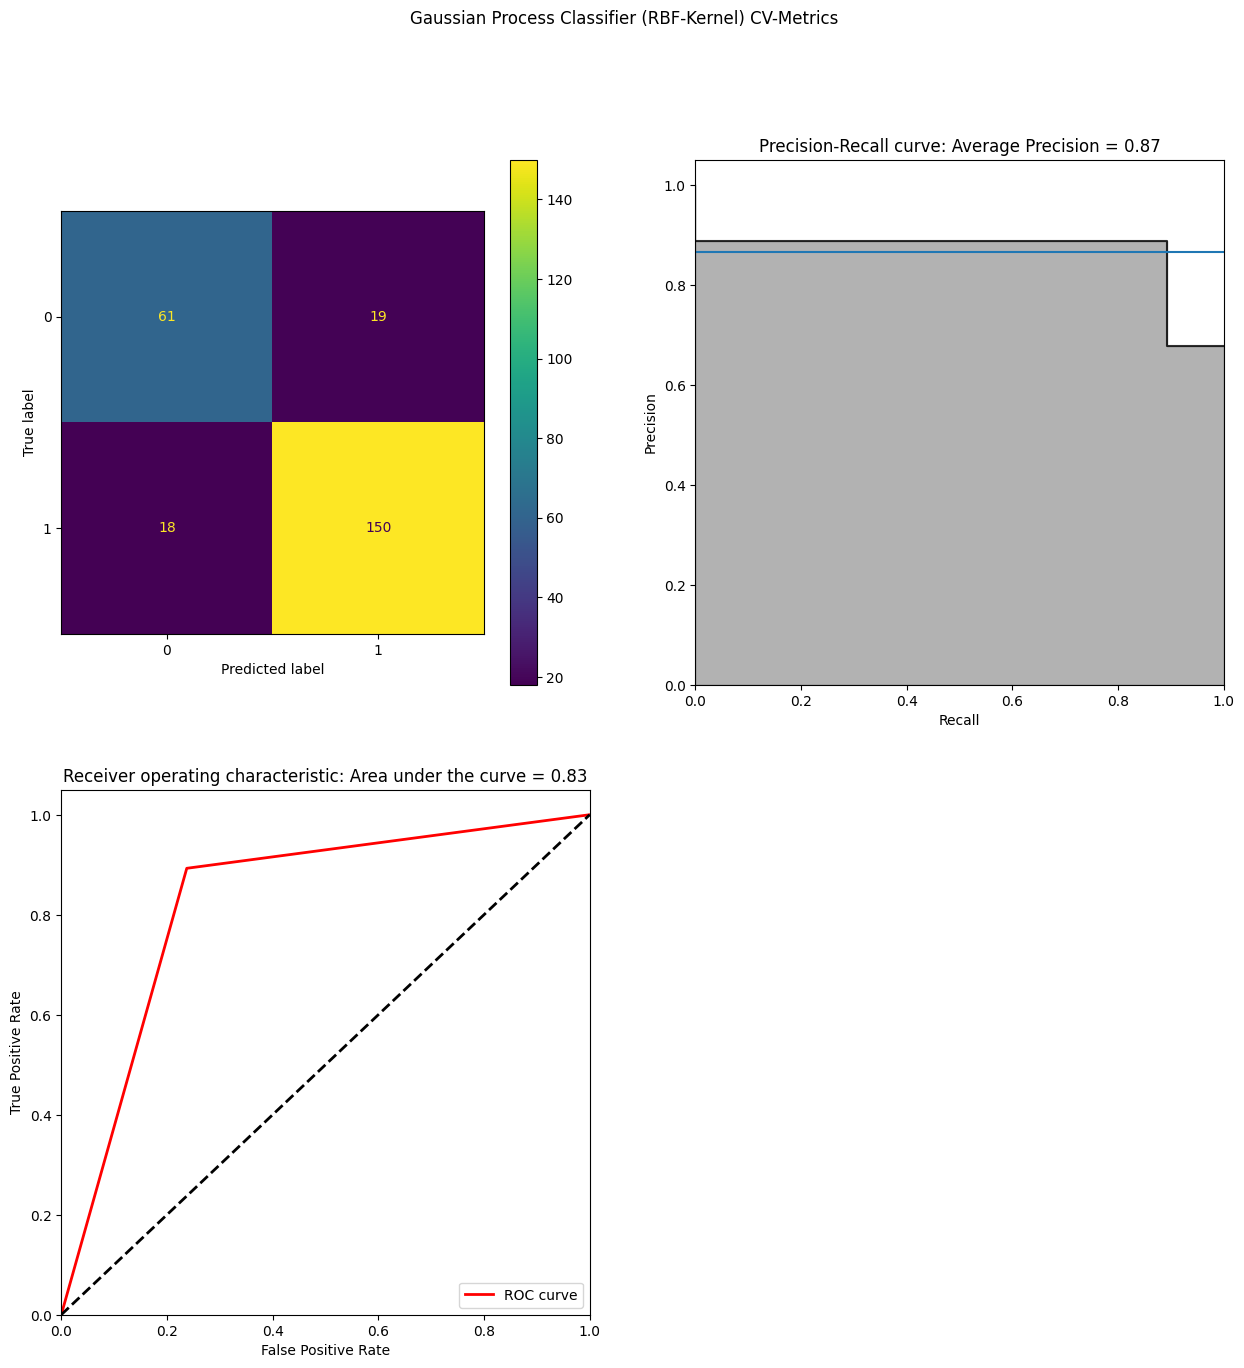

test_1
test_2 in first if condition
time: 5.94 s (started: 2023-05-18 10:15:52 +00:00)


In [70]:
predictions_gausClas, trained_gausClas,summary = cv_training(
    gausClas, k_fold, X_train_b, y_train_b, name="Gaussian Process Classifier (RBF-Kernel)",
    loss_fn=log_loss, name_loss="Log Loss", df=summary,
    metric_fn=accuracy_score, name_metric="Accuracy",
)

#3.15 LightGBM

In [71]:
params_LGB = {
'task': 'train',
'application':'binary',
'num_class':1,
'boosting': 'gbdt', # traditional Gradient Boosting Decision Tree
'objective': 'binary',
'metric': 'binary_logloss', #our initial selection
'metric_freq':1, # default = 1, type = int, aliases: output_freq, constraints: metric_freq > 0
'training_metric':False, #set this to true to output metric result over training dataset
'max_depth':6, #limit the max depth for tree model. This is used to deal with over-fitting when #data is small. Tree still grows leaf-wise
'num_leaves': 10, #default = 31, type = int, constraints: 1 < num_leaves <= 131072
'learning_rate': 0.01, #default = 0.1  constraints: learning_rate > 0.0
'feature_fraction': 1.0,  # default = 1.0. #LightGBM will randomly select part of features on each iteration (tree) if feature_fraction smaller than 1.0. For example, if you set it to 0.8, LightGBM will select 80% of features before training each tree
#can be used to speed up training or  to deal with over-fitting.
'bagging_fraction': 1.0, # default = 1.0. this will randomly select part of data without resampling. can be used to deal with over-fitting. 0.0 < bagging_fraction <= 1.0
'bagging_freq': 0, # 0 means disable bagging; k means perform bagging at every k iteration
'bagging_seed': 2023, #random seed for bagging
'verbose': -1, #default = 1 controls the level of LightGBM’s verbosity. = 0: Error (Warning), = 1: Info, > 1: Debug  
'num_threads':0 # default = 0, 
# for the best speed, set this to the number of real CPU cores, not the number of threads
# do not set it too large if your dataset is small (for instance, do not use 64 threads for a dataset with 10,000 rows)
}

time: 703 µs (started: 2023-05-18 10:15:58 +00:00)


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training Log Loss:  0.22765110030117183
CV Log Loss:  0.4001061289604961
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training Log Loss:  0.1957300185725692
CV Log Loss:  0.35860001146077997


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training Log Loss:  0.17744059419141398
CV Log Loss:  0.3187353641634205
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training Log Loss:  0.1485762336184856
CV Log Loss:  0.2202180824404079
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
Training Log Loss:  0.08921142914041374
CV Log Loss:  0.24156343849405315


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



-----------------------------------
SGD Log Loss:  0.30846520062509447
-----------------------------------
Overall Accuracy:  0.8387096774193549


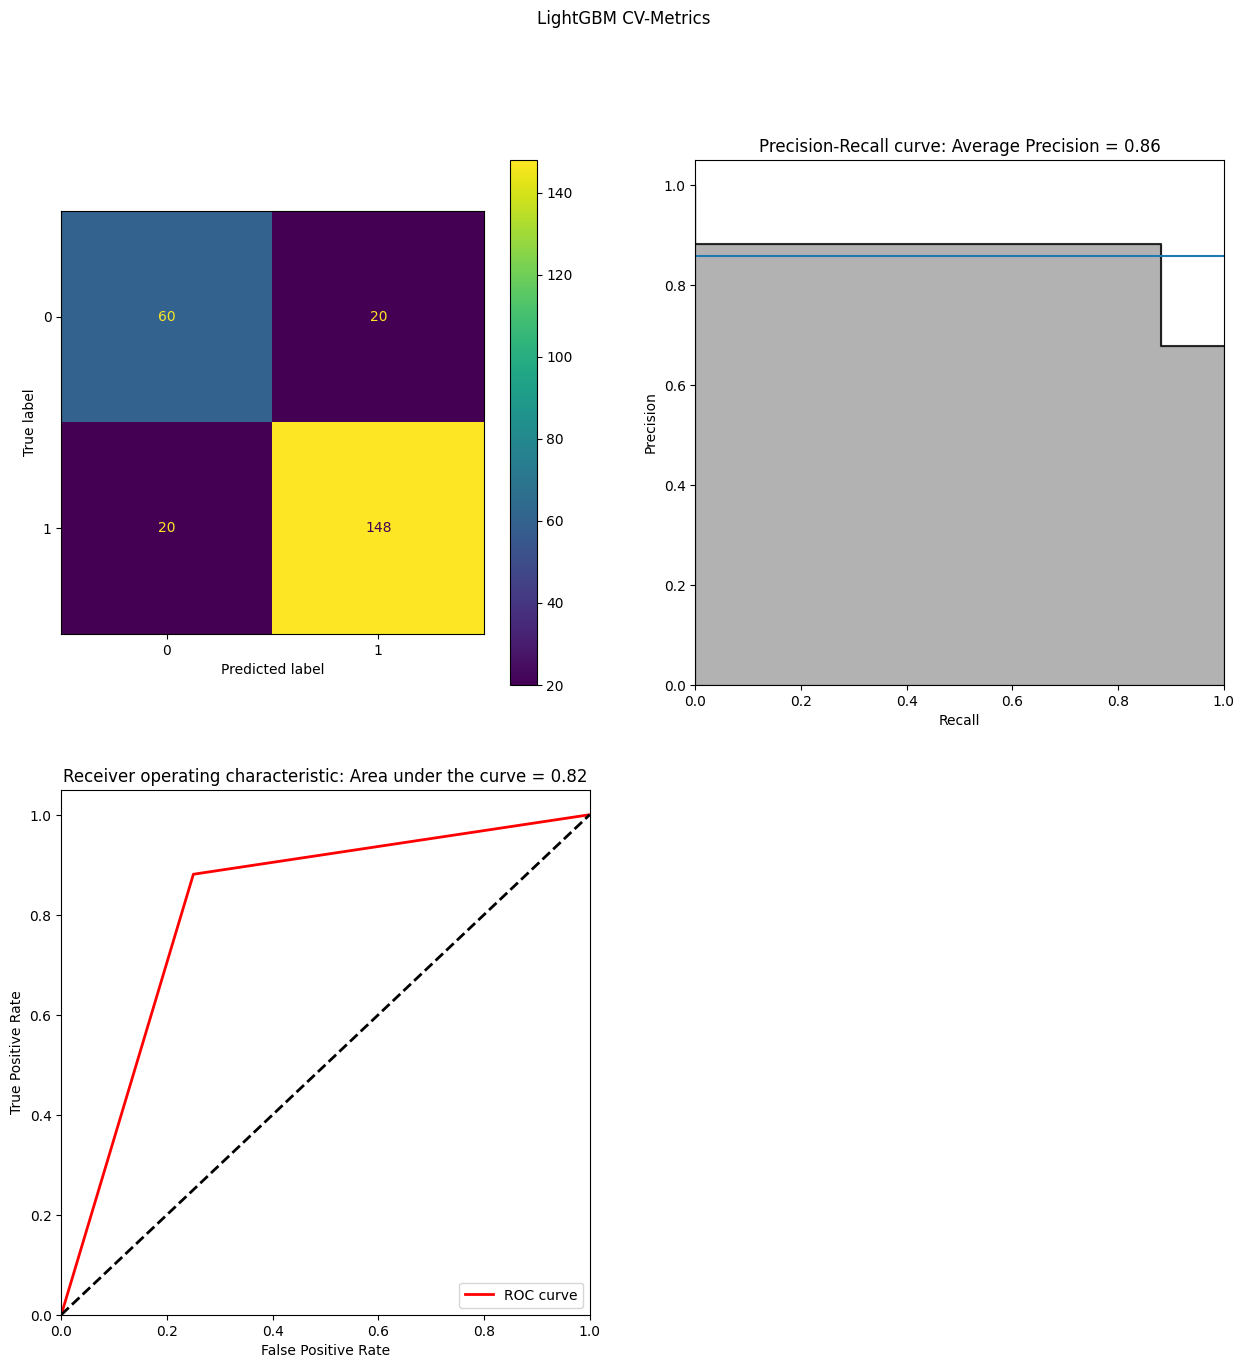

time: 970 ms (started: 2023-05-18 10:15:58 +00:00)


In [72]:
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train_b.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train_b)),y_train_b.ravel()):

  X_train_fold, X_cv_fold = X_train_b.iloc[train_index,:], X_train_b.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train_b.iloc[train_index], y_train_b.iloc[cv_index]


  train_LGB = LGBMClassifier.Dataset(X_train_fold, y_train_fold)
  evaluate_LGB = LGBMClassifier.Dataset(X_cv_fold, y_cv_fold, reference = train_LGB)

  GBM = LGBMClassifier.train(params_LGB,train_LGB, num_boost_round = 2500, valid_sets = evaluate_LGB, early_stopping_rounds = 150, verbose_eval=0)


  loglossTraining = log_loss(y_train_fold, GBM.predict(X_train_fold, num_iteration=GBM.best_iteration))
  

  trainingScores.append(loglossTraining)

  predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] =GBM.predict(X_cv_fold, num_iteration=GBM.best_iteration)
  
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

loglossLGBMC = log_loss(y_train_b ,predictionsBasedOnKFolds.loc[:,'prediction'])
overall_accuracy = accuracy_score(y_train_b, np.round(predictionsBasedOnKFolds.loc[:].astype(float)))
print('-----------------------------------')
print('SGD Log Loss: ', loglossLGBMC)
print('-----------------------------------')
print('Overall Accuracy: ', overall_accuracy)

# plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('{} CV-Metrics'.format("LightGBM"))

# Confusion Matrix
y_preds = np.round(predictionsBasedOnKFolds.loc[:, "prediction"].astype(float)).values.astype(int)
cm = confusion_matrix(y_train_b, y_preds)
dp = ConfusionMatrixDisplay(cm, display_labels=np.array([0, 1]))
dp.plot(ax=axs[0, 0])

# Precision Recall Curve
preds = pd.DataFrame(np.array([y_train_b.values, np.round(predictionsBasedOnKFolds.loc[:, "prediction"].astype(float)).values.astype(int)]).T, columns=["label", "prediction"])
preds.columns = ['trueLabel','prediction']
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
average_recall = recall_score(preds['trueLabel'], preds['prediction'])

axs[0, 1].step(recall, precision, color='k', alpha=0.8, where='post')
axs[0, 1].fill_between(recall, precision, step='post', alpha=0.3, color='k')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].hlines(average_precision, xmin=0, xmax=1)
axs[0, 1].set_title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


# Area under the Receiver Operating Characteristic (ROC) Curve
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
axs[1, 0].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
axs[1, 0].legend(loc="lower right")

axs[1, 1].axis('off')
plt.show()

# Append to summary
tn, fp, fn, tp = cm.ravel()
run = pd.DataFrame.from_dict({'{}'.format("LightGBM"): [loglossLGBMC, overall_accuracy,
                                                        average_precision, average_recall, areaUnderROC, 
                                                        float(fp) / y_train_b.sum(), float(fn) / (y_train_b.shape[0] - y_train_b.sum())]})
run.index = ["Log Loss", "Accuracy", "avg. Precision", "avg. Recall", "AUC", "FPR", "FNR"]
summary = pd.concat([summary.copy(), run], axis=1)

predictions_lgbm = predictionsBasedOnKFolds
trained_lgbm = GBM

#4. Evalutation Baseline Models

In [73]:
summary = summary.T.drop_duplicates().T
summary.head()

Logistic Regression  Linear SVM   RBF SVM  \
Log Loss                   0.316510    0.307124  0.321742   
Accuracy                   0.854839    0.850806  0.858871   
avg. Precision             0.872690    0.862234  0.868749   
avg. Recall                0.886905    0.898810  0.904762   
AUC                        0.837202    0.824405  0.833631   

                Logistic Regression with SGD  Logistic Regression with SGD  \
Log Loss                                 NaN                           NaN   
Accuracy                            0.846774                      0.806452   
avg. Precision                      0.874922                      0.859265   
avg. Recall                         0.863095                      0.797619   
AUC                                 0.837798                      0.811310   

                KNeighbors Classifier  Decision Tree  Random Forest  \
Log Loss                     0.867445       4.477201       0.323084   
Accuracy                     0.826613       0.826613       0.858871   
avg. Precision               0.845772       0.862624       0.868749   
avg. Recall                  0.875000       0.839286       0.904762   
AUC                          0.800000       0.819643       0.833631   

                Gaussian Process Classifier (RBF-Kernel)  LightGBM  
Log Loss                                        0.304003  0.308465  
Accuracy                                        0.850806  0.838710  
avg. Precision                                  0.865057  0.856722  
avg. Recall                                     0.892857  0.880952  
AUC                                             0.827679  0.815476

time: 15.9 ms (started: 2023-05-18 10:15:59 +00:00)


We have suprisingly simmilar scores. Maybe because the problem is kind of a simple one. SVM with RBF kernel,  and Random Forest  have the best results in accuracy and recall on the CV set. The results seem strong for all the models. None failed to catch the pattern in the data.
Suprissing that the boosting method is not strong. There could be room for improvement by HP tuning.

The Hypothesis seems confirmed so far. We get already satisfying metrics with baseline models. 

#7.ANN

A NN for this kind of small dataset problem seems like a overkill. But we train and optimiue one anyway. 
For this I follow roughly the idea from Karpathys blog post
"A recipe for taining of a neural network.
http://karpathy.github.io/2019/04/25/recipe/
1. simple basline model
2. overfitting
3. regularization
4. tune

List of possible hyperparameter to tune:

* Nodes per layer

* Number layers




* initialization: -> choose depending on activation(keras docu)

* activation functions:
1.relu (+He/Kaiming init)

2.leaky relu (+He/Kaiming init)

3.elu (leaky relu with exponential scale in negative space) 

5.sigmoid -> last layer (binaryclassification)


* learning rate: 

* batch size:

* optimzer:

1.SGD

2.RMSprop()

3.Adam() RMSprop + momentum 

* loss -> binary CrossEntropy


#7.1 Baseline architecture


In [74]:
 params = {
    'optimizer': 'adam', 
    'loss': 'BinaryCrossentropy', 
    'metrics': ['binary_accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    'activation_input': 'relu',
    'activation_hidden': 'relu',
    'activation_output': 'sigmoid',
   
}

def build_model_s( **params):
  model = models.Sequential()
  model.add(layers.Dense(16, activation=params["activation_input"], input_shape=(X_train_b.shape[1],),
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023)))
  model.add(layers.Dense(1, activation=params["activation_output"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.compile(optimizer=params['optimizer'], loss=params['loss'], metrics=params['metrics'])
  return model

def build_model_m( **params):
  model = models.Sequential()
  model.add(layers.Dense(16, activation=params["activation_input"], input_shape=(X_train_b.shape[1],),
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023)))
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023))) 
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.add(layers.Dense(1, activation=params["activation_output"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.compile(optimizer=params['optimizer'], loss=params['loss'], metrics=params['metrics'])
  return model

def build_model_l( **params):
  model = models.Sequential()
  model.add(layers.Dense(16, activation=params["activation_input"], input_shape=(X_train_b.shape[1],),
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023)))
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023))) 
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.he_uniform(seed=2023))) 
  model.add(layers.Dense(32, activation=params["activation_hidden"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.add(layers.Dense(1, activation=params["activation_output"],
                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=2023)))
  model.compile(optimizer=params['optimizer'], loss=params['loss'], metrics=params['metrics'])
  return model

time: 101 ms (started: 2023-05-18 10:15:59 +00:00)


In [75]:
build_model_m( **params).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________
time: 115 ms (started: 2023-05-18 10:15:59 +00:00)


In [76]:
build_model_s( **params).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                112       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
time: 59 ms (started: 2023-05-18 10:15:59 +00:00)


In [77]:
build_model_l( **params).summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                112       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,857
Trainable params: 3,857
Non-traina

For training we build a similar Kfold train/validation pipline that visualizes and saves the resuls

In [78]:
def cv_keras_training(model_builder, k_fold, X_train, y_train, name="", metrics="",
                      verbose: int = 0, num_epoch: int = 50,
                      batch_size: int = 16, lr = 0.01, params: dict = {}):
  """
    performs k-fold stratified cross validation on specified model (build function)
    return: histories, last model
  """
  a_test = 3
  trainingScores = []
  cvScores = []
  histories = []
  predictionsBasedOnKFolds = pd.DataFrame(data=[],index=np.arange(y_train.shape[0]),columns=[0,1])

  for train_index, cv_index in k_fold.split(X_train, y_train):

    #Here we are filtering the data based on indices.
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    cb = [TqdmCallback(verbose=verbose)]  


    model = model_builder(**params)
    histories.append(model.fit(X_train_fold, y_train_fold, epochs=num_epoch, batch_size=batch_size, verbose=0, 
                               validation_data=(X_cv_fold, y_cv_fold), 
                               callbacks=cb, shuffle=False))
    
    train_score = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    trainingScores.append(train_score)

    predictionsBasedOnKFolds.loc[cv_index,:] = model.predict(X_cv_fold)

    val_score = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
    cvScores.append(val_score)    
    if verbose == 0:
      print('--------------------------------------------------------')
      for i, metric in enumerate(metrics):
        print('Training {}: '.format(metric), train_score[i])
        print('CV {}: '.format(metric), cvScores[i])
  
  print("\n--------------------------------------------------------")
  print("Overall Scores : ")
  for i, metric in enumerate(metrics):
    print('Overall Training {}: '.format(metric), np.mean(np.array(trainingScores), axis=0)[i])
  
  print("\n")
  for i, metric in enumerate(metrics):
    print('Overall CV {}: '.format(metric), np.mean(np.array(cvScores), axis=0)[i])


  # We do not use the last model trained on the 5th fold to predict, we instead use the CV predictions 
  # to evaluate the model and compare it to the baseline approaches
  try:
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle('{} CV-Metrics (Predictions based on k-Fold)'.format(name))

    # y_preds = np.round(model.predict(X_train)).astype(int)
    y_preds = np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)
    cm = confusion_matrix(y_train, y_preds)
    dp = ConfusionMatrixDisplay(cm)
    dp.plot(ax=axs[0,0])
    print("\nCV-Metrics (Predictions based on k-Fold): ")
  except BaseException as e:
    print(e)

  try:
    # Precision Recall Curve
    preds = pd.DataFrame(np.array([y_train.values, np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)]).T, columns=["label", "prediction"])
    preds.columns = ['trueLabel','prediction']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
    average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
    average_recall = recall_score(preds['trueLabel'], preds['prediction'])

    print("avg. Precision: ", average_precision, "\navg. Recall: ", average_recall)

    axs[0, 1].step(recall, precision, color='k', alpha=0.8, where='post')
    axs[0, 1].fill_between(recall, precision, step='post', alpha=0.3, color='k')
    axs[0, 1].set_xlabel('Recall')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].set_ylim([0.0, 1.05])
    axs[0, 1].set_xlim([0.0, 1.0])
    axs[0, 1].hlines(average_precision, xmin=0, xmax=1)
    axs[0, 1].set_title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))
  except BaseException as e:
    print(e)
    average_precision = -1
    average_recall = -1
    axs[0, 1].axis('off')

  # Area under the Receiver Operating Characteristic (ROC) Curve
  try:
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    areaUnderROC = auc(fpr, tpr)
    axs[1, 0].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    axs[1, 0].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    axs[1, 0].set_xlim([0.0, 1.0])
    axs[1, 0].set_ylim([0.0, 1.05])
    axs[1, 0].set_xlabel('False Positive Rate')
    axs[1, 0].set_ylabel('True Positive Rate')
    axs[1, 0].set_title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    axs[1, 0].legend(loc="lower right")
    
    tn, fp, fn, tp = cm.ravel()
    
    print("FPR: ", float(fp) / y_train.sum(), "\nFNR: ", float(fn) /(y_train.shape[0] - y_train.sum()))
  except BaseException as e:
    print(e)
    areaUnderROC = -1
    axs[1, 0].axis('off')

  axs[1, 1].axis('off')
  plt.show()

  return histories, model

time: 3.45 ms (started: 2023-05-18 10:15:59 +00:00)


I built the first NN. The activation functions etc. were choosen from the literature. The architecture was choosen by intution. This model is just to test a small simple model. Next step is training on the kfolded training set.

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.2697791337966919
Overall Training Accuraccy:  0.8730115294456482
Overall Training Precision:  0.9038936614990234
Overall Training Recall:  0.9092647910118103


Overall CV BCE Loss:  0.30321362912654876
Overall CV Accuraccy:  0.8507755160331726
Overall CV Precision:  0.8877265214920044
Overall CV Recall:  0.8926916122436523

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8650573991765058 
avg. Recall:  0.8928571428571429
FPR:  0.1130952380952381 
FNR:  0.225


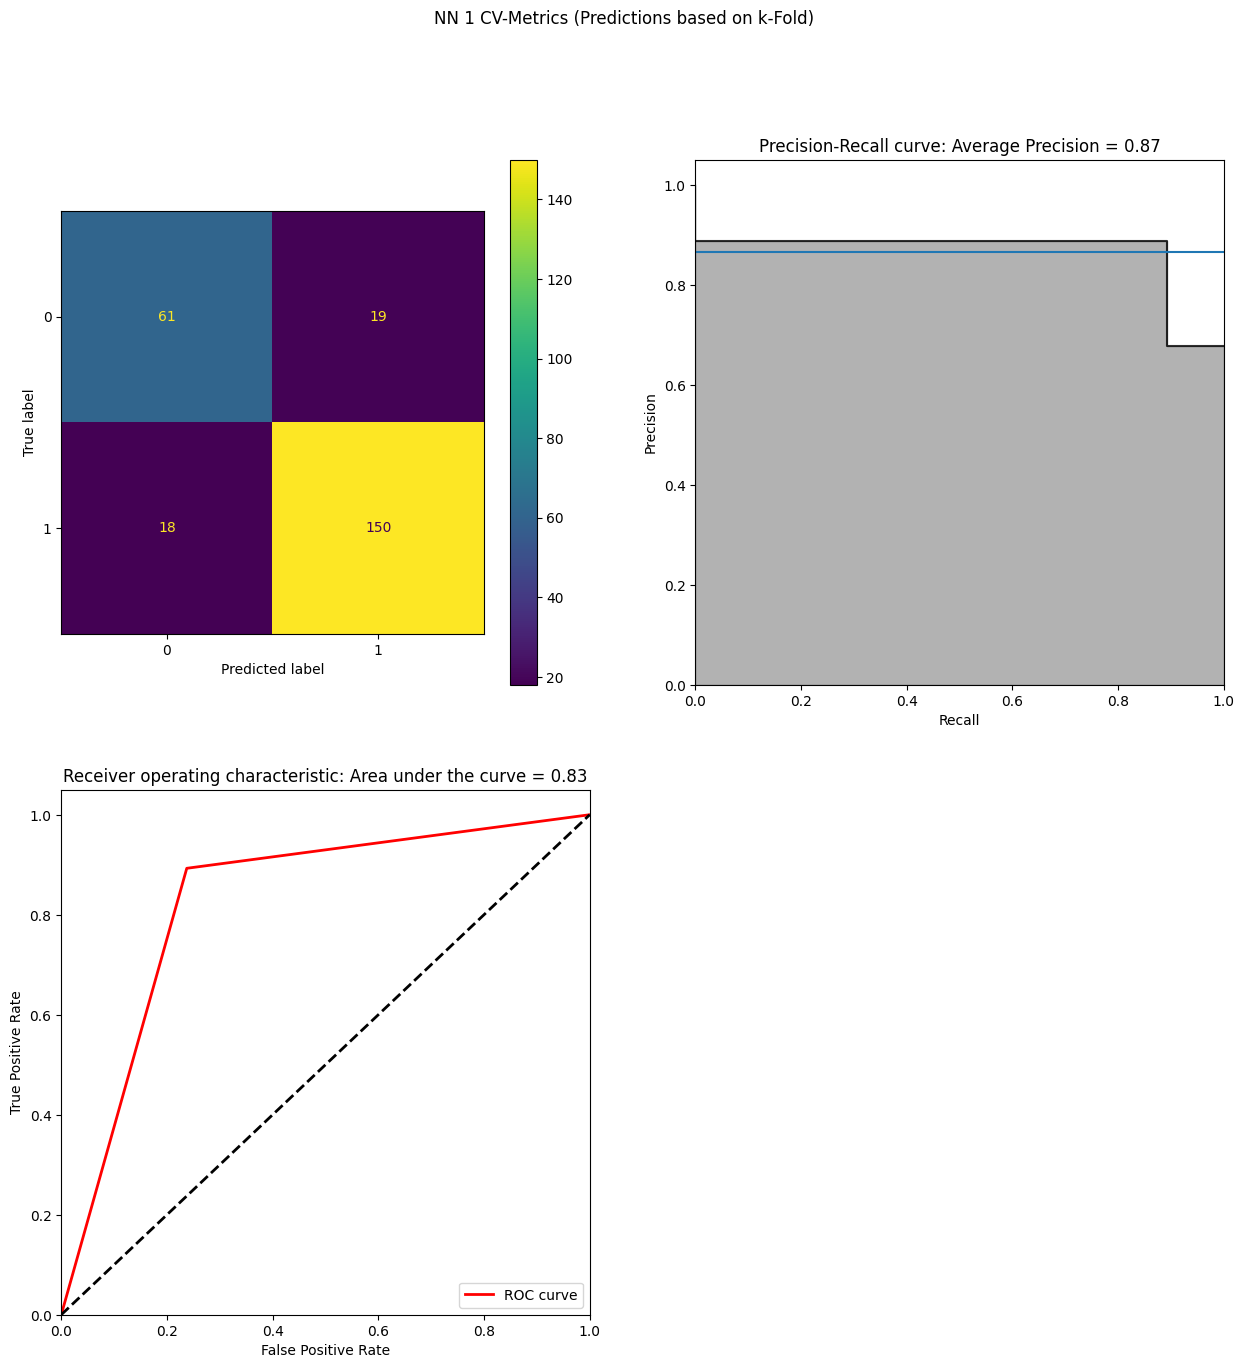

CPU times: user 31.9 s, sys: 1.35 s, total: 33.3 s
Wall time: 41.1 s
time: 41.1 s (started: 2023-05-18 10:16:33 +00:00)


In [84]:
 %%time
hist_s, nns_first_stage = cv_keras_training(
    build_model_s, k_fold, X_train_b, y_train_b, 
    name="NN 1", metrics=["BCE Loss", "Accuraccy", "Precision", "Recall"], verbose=1,
    num_epoch=100, batch_size=16, params=params
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.08254409357905387
Overall Training Accuraccy:  0.9667428135871887
Overall Training Precision:  0.9706169486045837
Overall Training Recall:  0.9806854605674744


Overall CV BCE Loss:  0.5002733618021011
Overall CV Accuraccy:  0.8471836686134339
Overall CV Precision:  0.8917197108268737
Overall CV Recall:  0.8869875192642211

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8632129599151488 
avg. Recall:  0.8869047619047619
FPR:  0.1130952380952381 
FNR:  0.2375


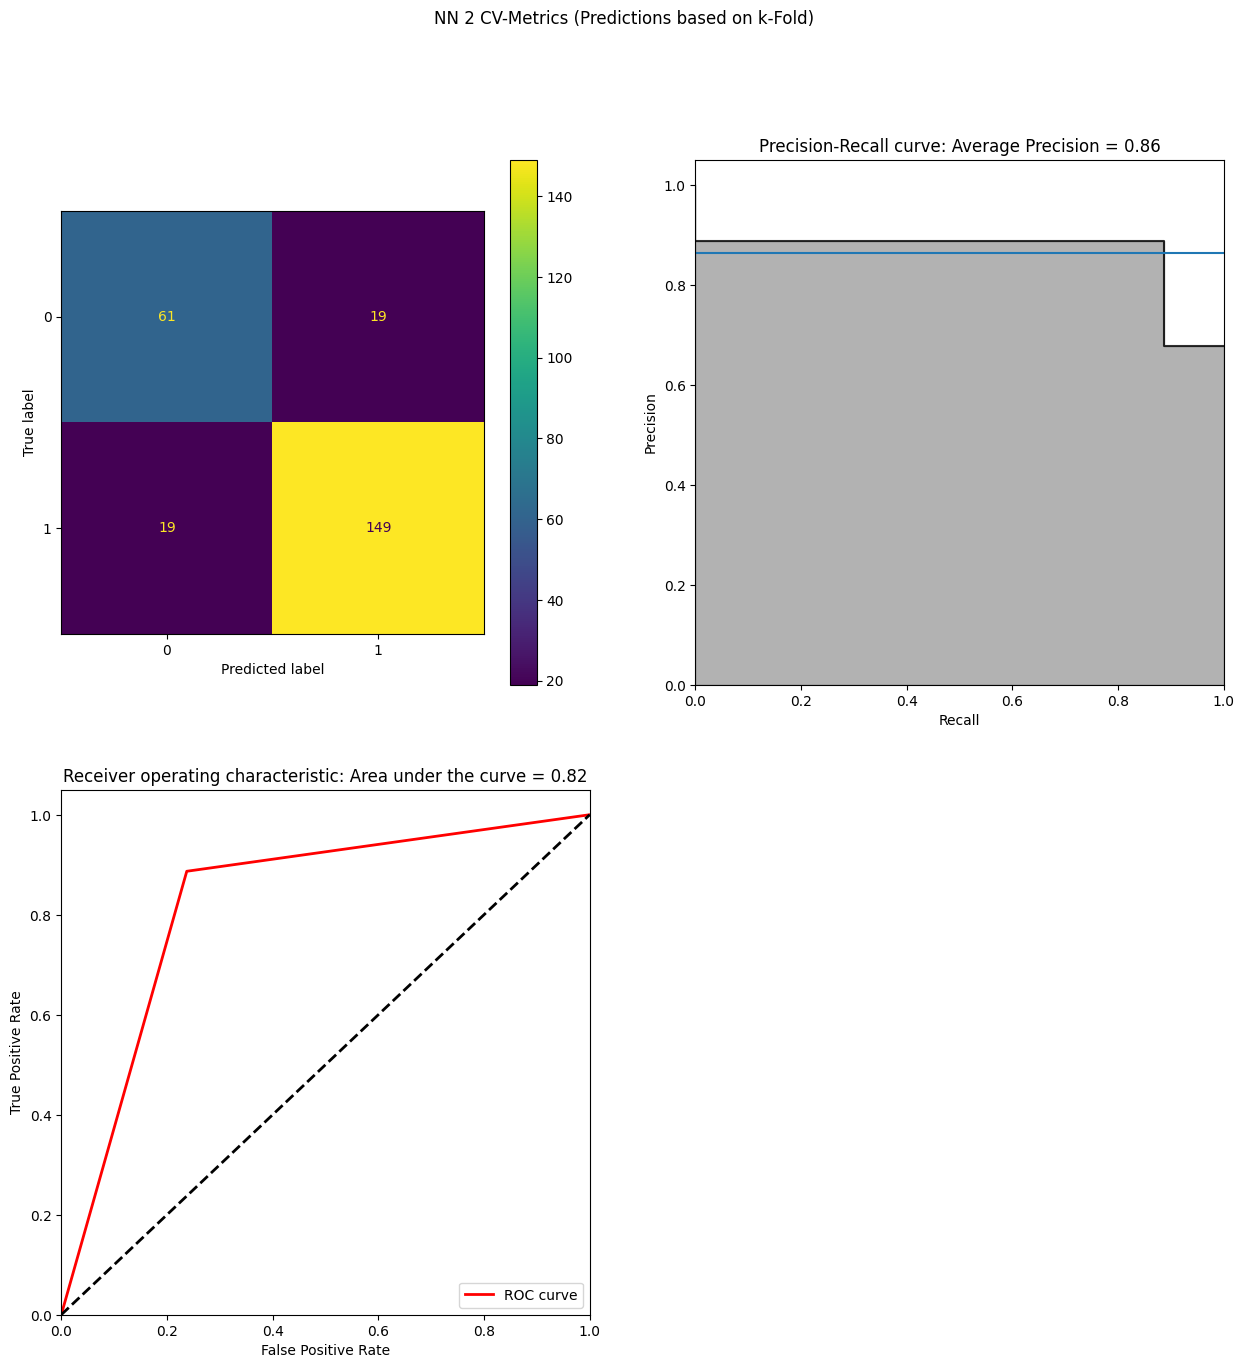

CPU times: user 36.3 s, sys: 1.37 s, total: 37.6 s
Wall time: 54.7 s
time: 54.7 s (started: 2023-05-18 10:24:54 +00:00)


In [90]:
%%time
hist_m, nnm_first_stage = cv_keras_training(
    build_model_m, k_fold, X_train_b, y_train_b, 
    name="NN 2", metrics=["BCE Loss", "Accuraccy", "Precision", "Recall"], verbose=1,
    num_epoch=100, batch_size=16, params=params
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 9ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.009417694830335676
Overall Training Accuraccy:  0.9969849228858948
Overall Training Precision:  0.9970479249954224
Overall Training Recall:  0.9985185146331788


Overall CV BCE Loss:  1.1630021333694458
Overall CV Accuraccy:  0.8351020336151123
Overall CV Precision:  0.8745571255683899
Overall CV Recall:  0.8873440265655518

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.849412958920599 
avg. Recall:  0.8869047619047619
FPR:  0.13095238095238096 
FNR:  0.2375


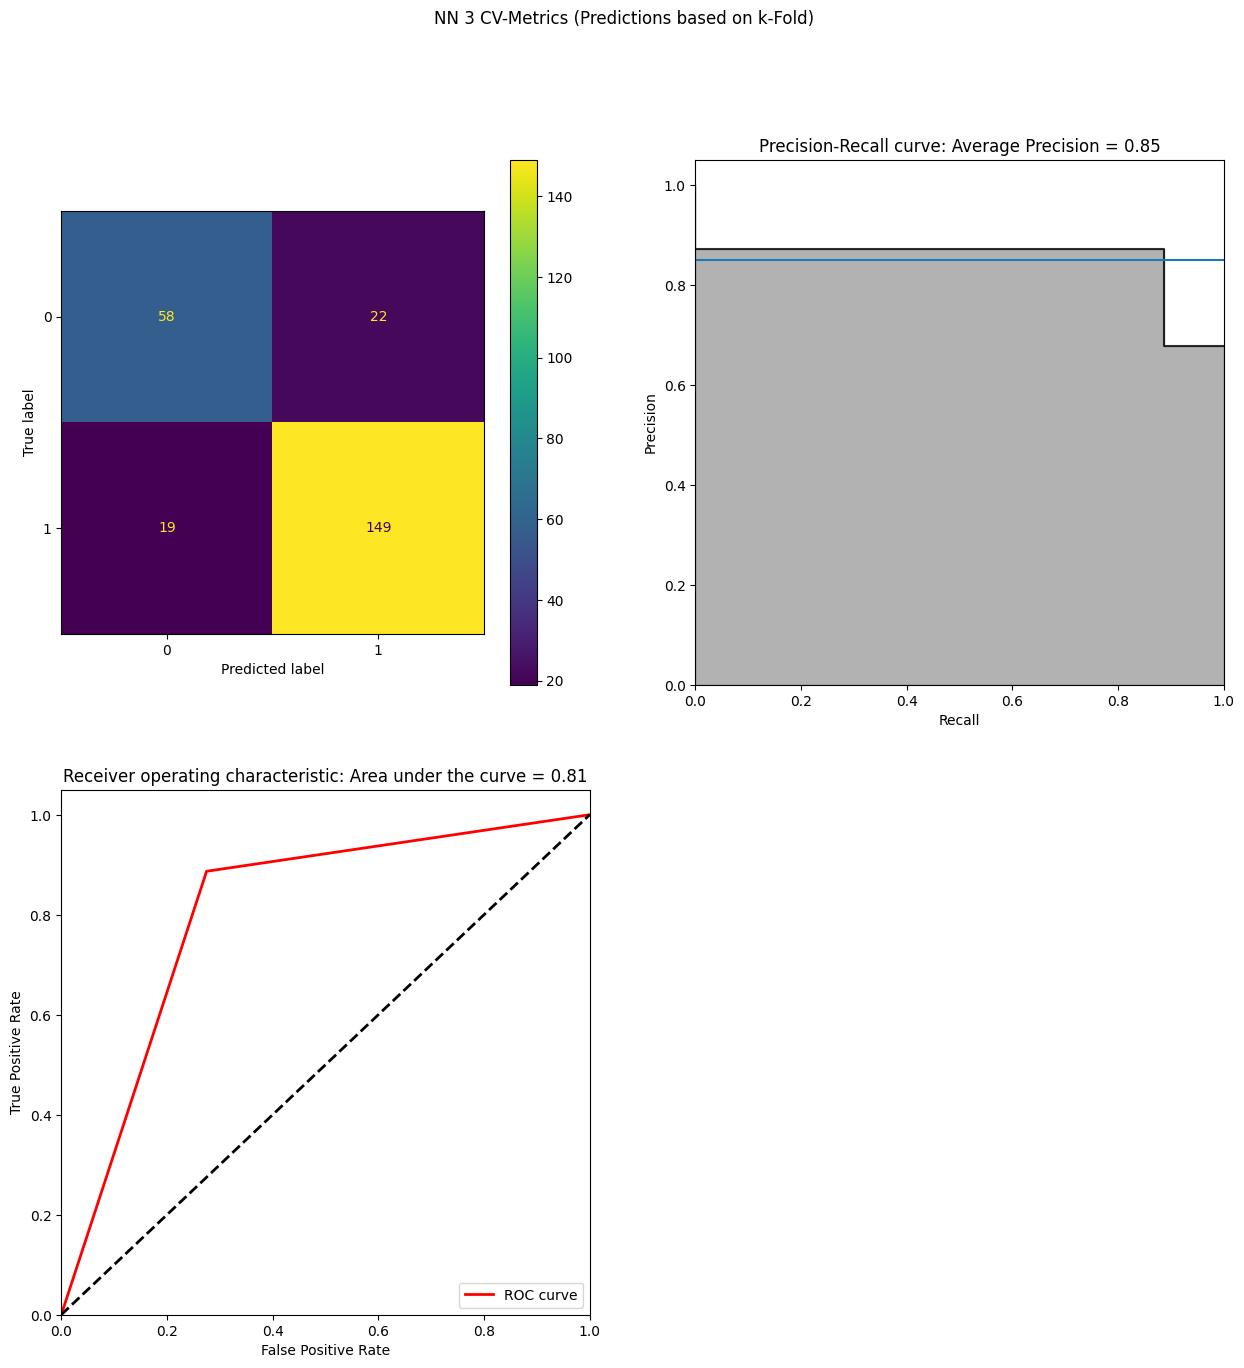

CPU times: user 39 s, sys: 1.46 s, total: 40.5 s
Wall time: 57.1 s
time: 57.1 s (started: 2023-05-18 10:25:48 +00:00)


In [91]:
 %%time
hist_l, nnl_first_stage = cv_keras_training(
    build_model_l, k_fold, X_train_b, y_train_b, 
    name="NN 3", metrics=["BCE Loss", "Accuraccy", "Precision", "Recall"], verbose=1,
    num_epoch=100, batch_size=16, params=params
)

In [92]:
# Defining our function to see the evolution of loss:
def plot_learning_curves(history_list, history_key: str = "loss", ylim=True):
  history = pd.concat([pd.DataFrame(h.history) for h in history_list], axis=1)
  un = history.columns.unique()
  history.groupby

  history['epoch'] = history_list[0].epoch

  #We will omit the first 10 points for a better visualization:
  fig = plt.figure(figsize=(12,10))
  plt.plot(history['epoch'][1:],history[history_key].mean(axis=1)[1:], "b-.", linewidth=1.5, label="Training mean")
  plt.plot(history['epoch'][1:],history[history_key].quantile(.1, axis=1)[1:], "b--", linewidth=.5, label="Training 10%")
  plt.plot(history['epoch'][1:],history[history_key].quantile(.9, axis=1)[1:], "b+", linewidth=.5, label="Training 90%")
  plt.plot(history['epoch'][1:],history['val_'+history_key].mean(axis=1)[1:], "r-.", linewidth=1.5, label="CV test mean")
  plt.plot(history['epoch'][1:],history['val_'+history_key].quantile(.1, axis=1)[1:], "r--", linewidth=.5, label="CV test 10%")
  plt.plot(history['epoch'][1:],history['val_'+history_key].quantile(.9, axis=1)[1:], "r+", linewidth=.5, label="CV test 90%")

  plt.legend()
  if ylim:
    plt.ylim(0, 1)
  plt.xlabel("Epochs")
  plt.ylabel(history_key)

time: 1.35 ms (started: 2023-05-18 10:26:45 +00:00)


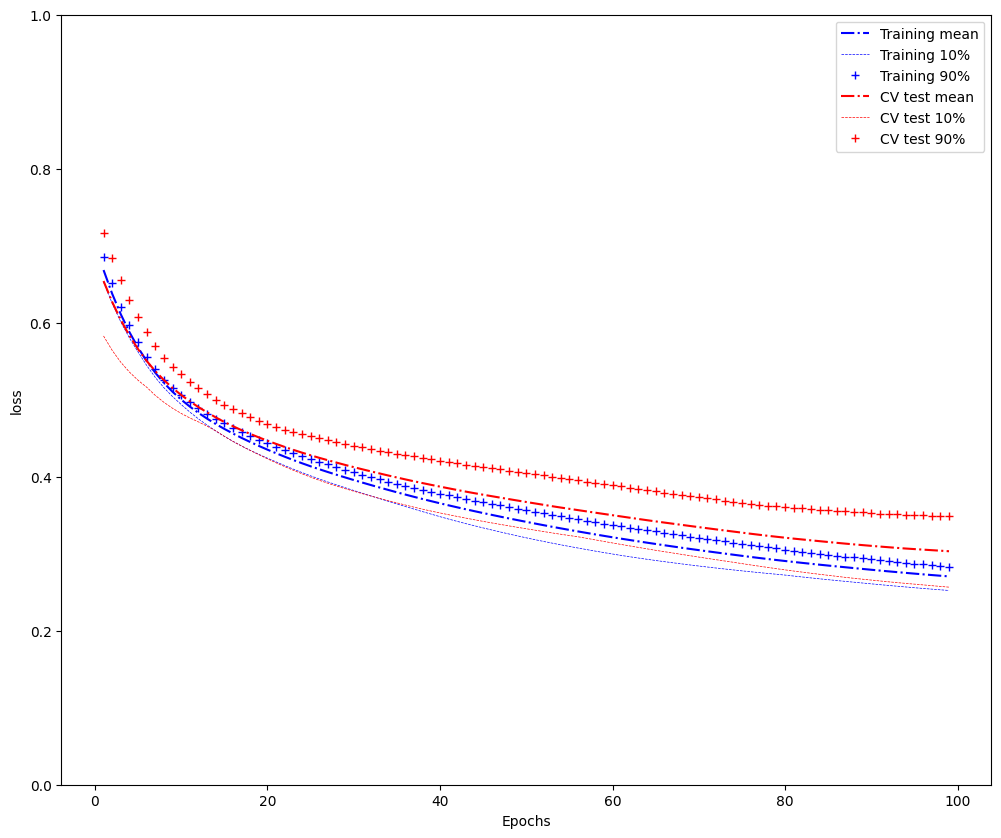

time: 279 ms (started: 2023-05-18 10:26:45 +00:00)


In [93]:
plot_learning_curves(hist_s) 

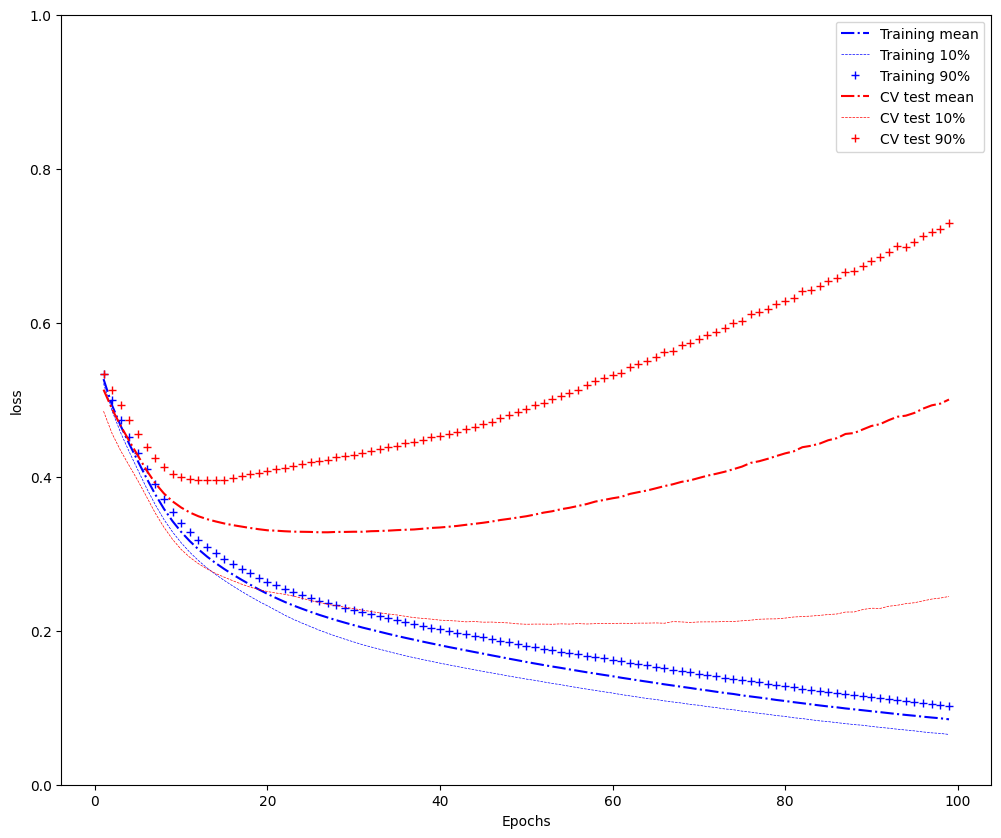

time: 282 ms (started: 2023-05-18 10:26:46 +00:00)


In [94]:
plot_learning_curves(hist_m)

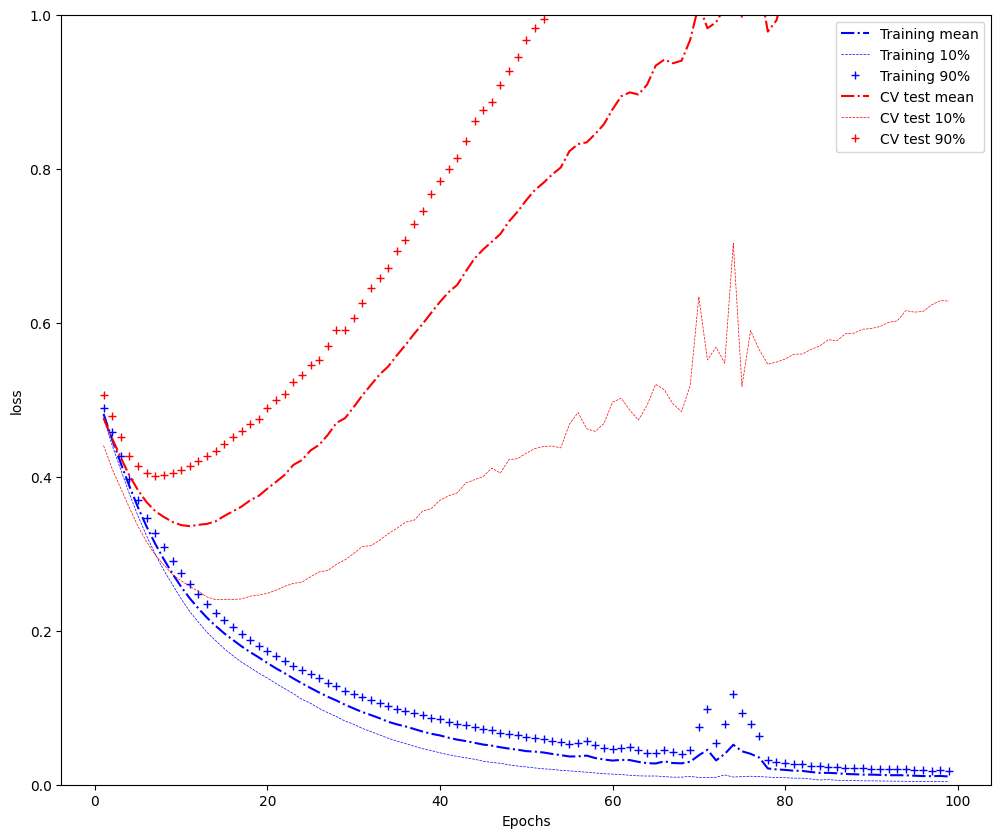

time: 306 ms (started: 2023-05-18 10:26:46 +00:00)


In [95]:
plot_learning_curves(hist_l)

This is very suprising for me. We already have a really strong result without hyperparameter tuning. Still we work with standart hyperparameters from literature. We see that the model fits the training data nearly perfectly. So we are already at the overfitted stage.
Deactivating 2/3 hidden layers improved some CV Metrics
Adding 2 more decresed most CV metrics but perfected the training metrics to .99. I start adding regularization from here. By the deviation between the train/val curves we can see a really strong overfitting.
When we use only one hidden layer there is no overfitting.
Overfitting starts slightly from 2 hidden layers
I went back to the orgininal guess of 3 hidden layers


#8. Basline Model testing and conclusion phase 1+2

2/2 [==============================] - 0s 10ms/step
0.8709677419354839


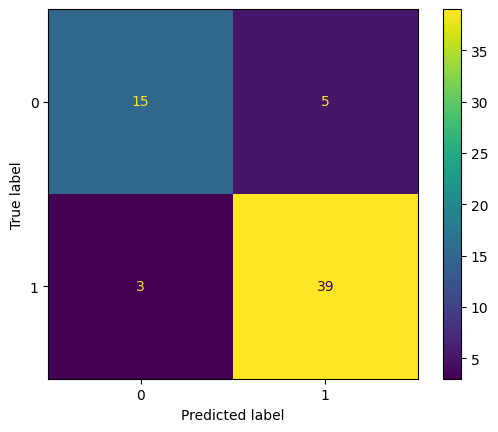

time: 500 ms (started: 2023-05-18 10:27:02 +00:00)


In [97]:
Y_test_predictions = pd.Series(nns_first_stage.predict(X_test_b).flatten(), index=X_test_b.index)
cm = confusion_matrix(y_test_b, np.round(Y_test_predictions))
dp = ConfusionMatrixDisplay(cm)
dp.plot()
print(accuracy_score(y_test_b, np.round(Y_test_predictions)))

2/2 [==============================] - 0s 7ms/step
0.8548387096774194


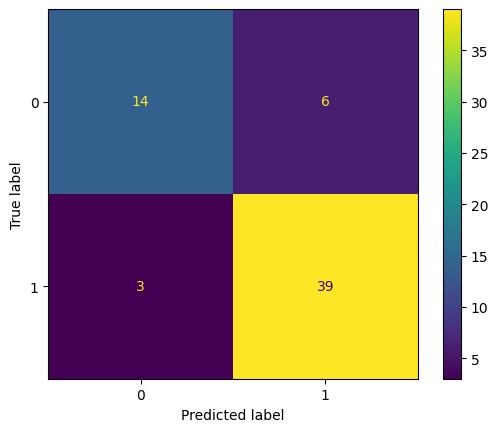

time: 473 ms (started: 2023-05-18 10:27:12 +00:00)


In [99]:
Y_test_predictions = pd.Series(nnm_first_stage.predict(X_test_b).flatten(), index=X_test_b.index)
cm = confusion_matrix(y_test_b, np.round(Y_test_predictions))
dp = ConfusionMatrixDisplay(cm)
dp.plot()
print(accuracy_score(y_test_b, np.round(Y_test_predictions)))

2/2 [==============================] - 0s 7ms/step
0.7419354838709677


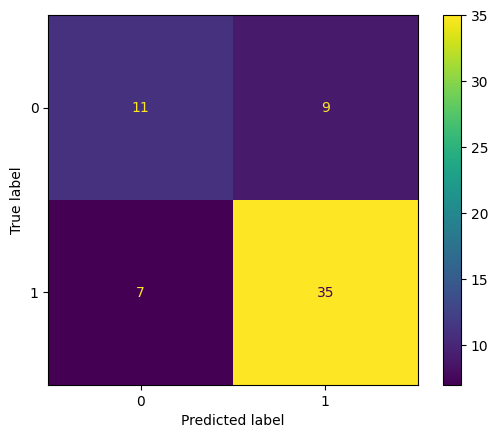

time: 516 ms (started: 2023-05-18 10:27:19 +00:00)


In [101]:
Y_test_predictions = pd.Series(nnl_first_stage.predict(X_test_b).flatten(), index=X_test_b.index)
cm = confusion_matrix(y_test_b, np.round(Y_test_predictions))
dp = ConfusionMatrixDisplay(cm)
dp.plot()
print(accuracy_score(y_test_b, np.round(Y_test_predictions)))

With a accuracy at 0.85 we are already really good. This proves further that the dataset is quite simple. We have only 3 FN which is very good for a medical indicator tool. At this stage the human performance would be interesting. Possible it would not be higher.

#8. Hyperparameter optimization and regularization

We continue with the architecture "m" 

In [102]:
params = {
    'optimizer': 'adam', 
    'loss': 'BinaryCrossentropy',
    'activation': 'relu',
    'init_dense': tf.keras.initializers.he_uniform(seed=2023),
    'last_layer': 'sigmoid',
}

def build_model_RSearch(optimizer=params["optimizer"], loss=["loss"], 
                       last_layer=params["last_layer"], init_dense=params["init_dense"], 
                       activation=params["activation"], **params):
  model = models.Sequential()
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense, input_shape=(X_train_b.shape[1],)))
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(layers.Dense(1, activation=last_layer,
                         kernel_initializer=tf.keras.initializers.glorot_uniform(seed=2023)))
  model.compile(optimizer=optimizer, loss=loss, 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'], 
                **params)
  return model

t = build_model_RSearch(**params)
t.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                224       
                                                                 
 dense_73 (Dense)            (None, 32)                1056      
                                                                 
 dense_74 (Dense)            (None, 32)                1056      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________
time: 96.4 ms (started: 2023-05-18 10:27:19 +00:00)


In [103]:
grid_params = {
    'optimizer': ['adam', 'rmsprop', 'SGD', 'nadam'], 
    'loss': ['BinaryCrossentropy', 'Poisson'],
    'activation': ['relu','linear',tf.keras.layers.LeakyReLU(alpha=0.2),'tanh','sigmoid'],
    'init_dense': [tf.keras.initializers.he_uniform(2023), 
                   tf.keras.initializers.glorot_uniform(2023),
                   tf.keras.initializers.lecun_uniform(2023)],}

time: 3.57 ms (started: 2023-05-18 10:27:19 +00:00)


In [104]:
random_search = RandomizedSearchCV(estimator=KerasClassifier(build_fn=build_model_RSearch), 
                                   scoring="accuracy",
                                  n_jobs=1, verbose=0, cv=k_fold, param_distributions=grid_params,
                                   refit=False, n_iter=60) 

time: 496 µs (started: 2023-05-18 10:27:19 +00:00)


In [105]:
%%time
results = random_search.fit(X_train_b, y_train_b, verbose=1)

2/2 [==============================] - 0s 4ms/step
CPU times: user 5min 52s, sys: 3.47 s, total: 5min 56s
Wall time: 6min 5s
time: 6min 5s (started: 2023-05-18 10:27:19 +00:00)


In [106]:
results_df = pd.DataFrame(results.cv_results_)
best = results_df.sort_values("rank_test_score")
best.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       0.843047      0.108213         0.123105        0.028666   
5        1.073238      0.389046         0.114811        0.020870   
46       0.794812      0.009489         0.386197        0.561580   
15       0.887275      0.130325         0.113582        0.012306   
47       0.945017      0.135580         0.126597        0.014255   

   param_optimizer          param_loss  \
11         rmsprop             Poisson   
5          rmsprop  BinaryCrossentropy   
46         rmsprop  BinaryCrossentropy   
15         rmsprop  BinaryCrossentropy   
47         rmsprop  BinaryCrossentropy   

                                     param_init_dense  \
11  <keras.initializers.initializers.LecunUniform ...   
5   <keras.initializers.initializers.LecunUniform ...   
46  <keras.initializers.initializers.LecunUniform ...   
15  <keras.initializers.initializers.HeUniform obj...   
47  <keras.initializers.initializers.GlorotUniform...   

                                     param_activation  \
11  <keras.layers.activation.leaky_relu.LeakyReLU ...   
5   <keras.layers.activation.leaky_relu.LeakyReLU ...   
46                                             linear   
15  <keras.layers.activation.leaky_relu.LeakyReLU ...   
47  <keras.layers.activation.leaky_relu.LeakyReLU ...   

                                               params  split0_test_score  \
11  {'optimizer': 'rmsprop', 'loss': 'Poisson', 'i...               0.80   
5   {'optimizer': 'rmsprop', 'loss': 'BinaryCrosse...               0.78   
46  {'optimizer': 'rmsprop', 'loss': 'BinaryCrosse...               0.78   
15  {'optimizer': 'rmsprop', 'loss': 'BinaryCrosse...               0.76   
47  {'optimizer': 'rmsprop', 'loss': 'BinaryCrosse...               0.76   

    split1_test_score  split2_test_score  split3_test_score  \
11               0.80               0.76           0.816327   
5                0.80               0.74           0.775510   
46               0.78               0.78           0.795918   
15               0.78               0.70           0.775510   
47               0.80               0.74           0.755102   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
11           0.734694         0.782204        0.030159                1  
5            0.714286         0.761959        0.030696                2  
46           0.653061         0.757796        0.052729                3  
15           0.734694         0.750041        0.029614                4  
47           0.693878         0.749796        0.034280                5

time: 21.9 ms (started: 2023-05-18 10:33:25 +00:00)


In [107]:
 best.iloc[0]["params"]

{'optimizer': 'rmsprop',
 'loss': 'Poisson',
 'init_dense': <keras.initializers.initializers.LecunUniform at 0x7fcf3ce6f820>,
 'activation': <keras.layers.activation.leaky_relu.LeakyReLU at 0x7fcf3ce6ebc0>}

time: 3.37 ms (started: 2023-05-18 10:33:25 +00:00)


This shows the best scores we found. (there could be better as we didnt perform GridSearch)
rmsprop instead of adam

poisson instead of BinaryCross

and lecun uniform instead of he initialisation

 relu is replaced with leaky_relu


No we combine this activation, intialisation and optimizer with the "m" architecture for further research

#7.2 After first RS

In [108]:
 def build_mRS(**params):
  best_params ={
    'activation': tf.keras.layers.LeakyReLU(alpha=0.2),
    'init_dense': keras.initializers.LecunUniform(seed=2023),
    'loss': 'Poisson', # BCE works still better than Poisson
    'optimizer': 'rmsprop',
  }

  model = build_model_RSearch(**best_params)
  return model

time: 678 µs (started: 2023-05-18 10:33:25 +00:00)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 7ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 11ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 8ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 9ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training Poison:  0.7368297815322876
Overall Training Precision:  0.9420951843261719
Overall Training Recall:  0.9673079133033753
Overall Training Binary Accuracy:  0.9375361680984498


Overall CV Poison:  0.9177835941314697
Overall CV Precision:  0.9020384073257446
Overall CV Recall:  0.8688057065010071
Overall CV Binary Accuracy:  0.8430204153060913

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8671204282227438 
avg. Recall:  0.8690476190476191
FPR:  0.10119047619047619 
FNR:  0.275


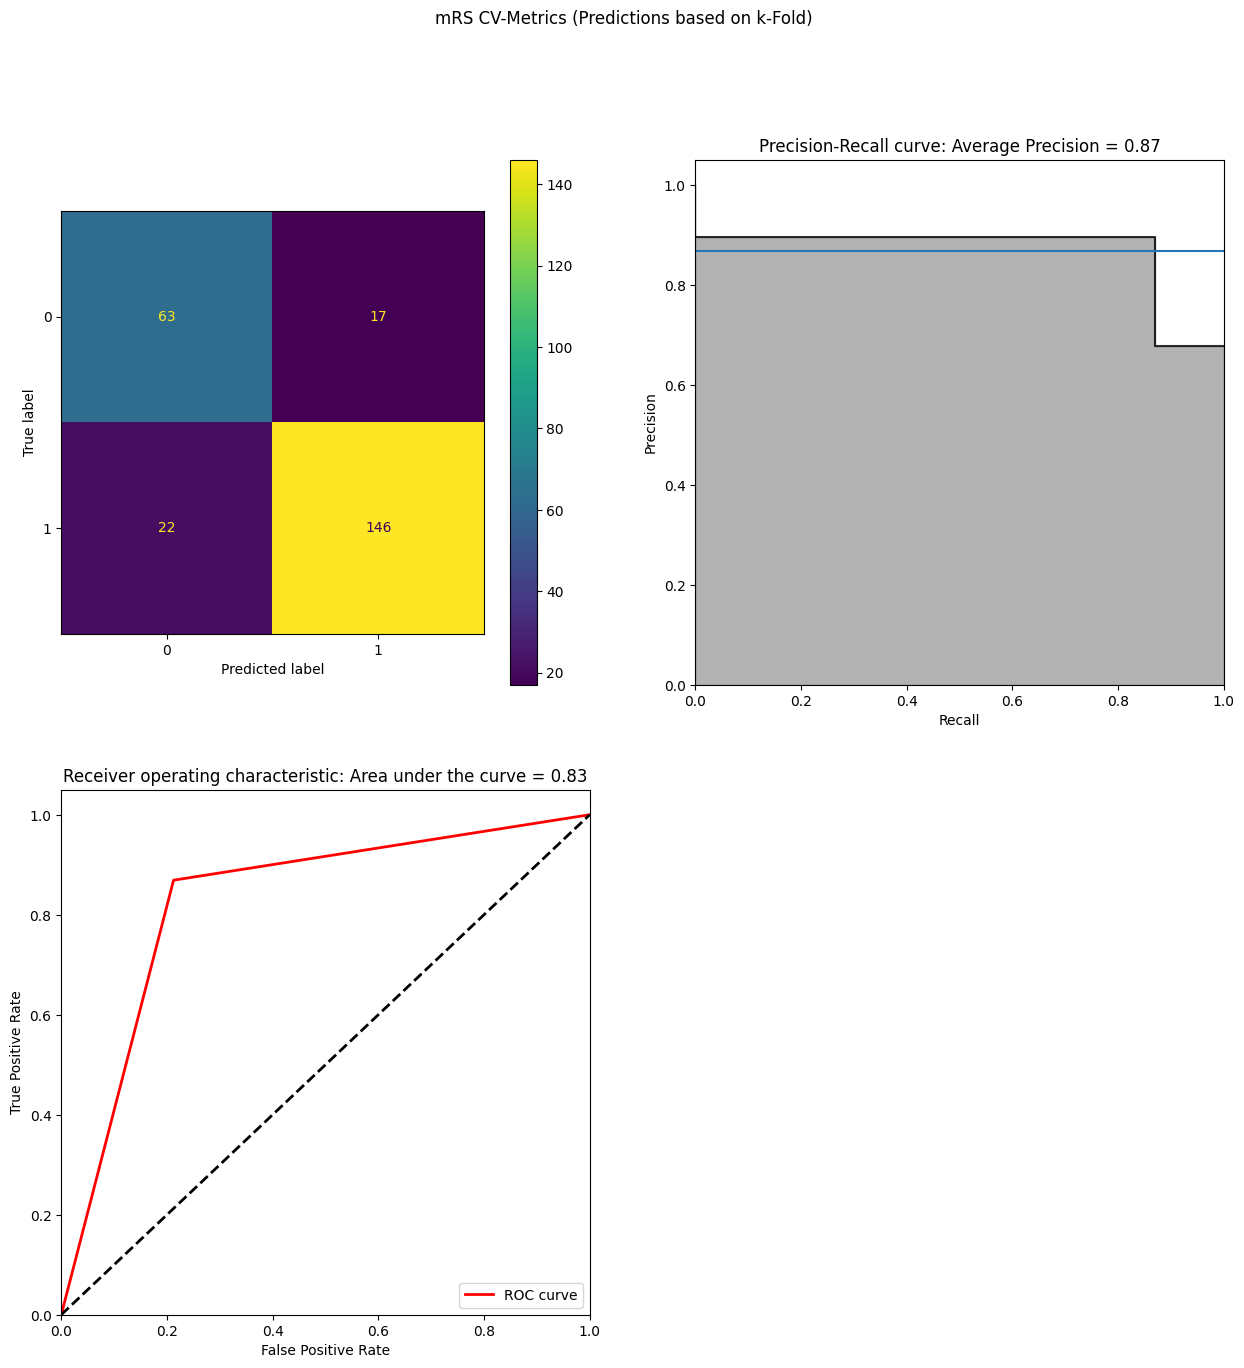

CPU times: user 42.8 s, sys: 1.3 s, total: 44.1 s
Wall time: 57.7 s
time: 57.8 s (started: 2023-05-18 10:33:25 +00:00)


In [109]:
 %%time
hist_mRS, nn_mRS = cv_keras_training(
    build_mRS, k_fold, X_train_b, y_train_b, 
    name="mRS", metrics=["Poison", "Precision", "Recall", "Binary Accuracy"], verbose=1,
    num_epoch=100, batch_size=16
)

We see actually only very slight improvments in th 0.02 range. Some scores actually degreased. This might be because we already overfitted the dataset and mapped the input well for classification. We continue now with a learning rate and batchsize optimizing. A optimizing of training episodes is unnecessary as we use early stopping later.

# Model testing after first RandomSearch 

2/2 [==============================] - 0s 9ms/step
0.8387096774193549


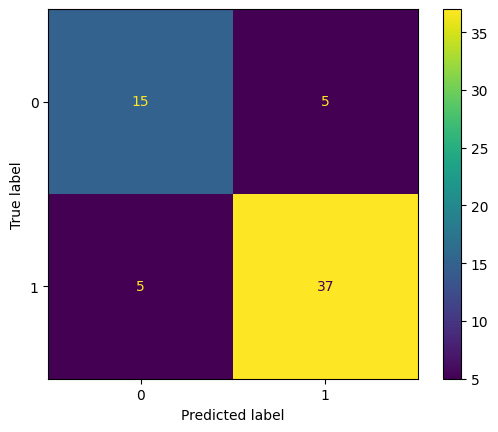

time: 480 ms (started: 2023-05-18 10:36:57 +00:00)


In [111]:
Y_test_predictions = pd.Series(nn_mRS.predict(X_test_b).flatten(), index=X_test_b.index)
cm = confusion_matrix(y_test_b, np.round(Y_test_predictions))
dp = ConfusionMatrixDisplay(cm)
dp.plot()
print(accuracy_score(y_test_b, np.round(Y_test_predictions)))

The testing performance actually degreased and we have two more FN which is not desirable.

# GSearch for lr and bs

In [112]:
def build_mRS(
  learning_rate: float = 0.01, input_shape=None, optimizer="rmsprop",
   loss="Poisson", last_layer="sigmoid", 
  init_dense= keras.initializers.LecunUniform(seed=2023), 
  activation= tf.keras.layers.LeakyReLU(alpha=0.2), 
  **params):

  model = models.Sequential()
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense, input_shape=(X_train_b.shape[1],)))
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(layers.Dense(1, activation=last_layer,
                         kernel_initializer=tf.keras.initializers.glorot_uniform(seed=2023)))
  model.compile(optimizer=optimizer, loss=loss, 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'], 
                **params)
  return model

t = build_mRS(**params)
t.summary()

Model: "sequential_324"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1296 (Dense)          (None, 32)                224       
                                                                 
 dense_1297 (Dense)          (None, 32)                1056      
                                                                 
 dense_1298 (Dense)          (None, 32)                1056      
                                                                 
 dense_1299 (Dense)          (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________
time: 111 ms (started: 2023-05-18 10:36:57 +00:00)


In [113]:
params_training = {
    "learning_rate": np.logspace(-5, -1, 5).tolist(), # ~ 0.001 seems to be best
    "batch_size":  [4, 16, 64],
}


grid_search_training = GridSearchCV(estimator=KerasClassifier(build_fn=build_mRS), scoring="accuracy",
                           n_jobs=1, verbose=0, cv=k_fold, param_grid=params_training, refit=False)

time: 1.09 ms (started: 2023-05-18 10:36:57 +00:00)


In [114]:
 %%time
results_training = grid_search_training.fit(X_train_b, y_train_b, verbose=1)

2/2 [==============================] - 0s 5ms/step
CPU times: user 1min 29s, sys: 871 ms, total: 1min 30s
Wall time: 1min 42s
time: 1min 42s (started: 2023-05-18 10:36:57 +00:00)


In [115]:
 # Show the results ranked by best test score (accuracy)
results_training_df = pd.DataFrame(results_training.cv_results_)
best_training = results_training_df.sort_values("rank_test_score")
best_training.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.943589      0.113190         0.115815        0.010886   
1       0.869507      0.140085         0.106406        0.007575   
2       1.259040      0.497389         0.198885        0.152095   
3       1.497187      0.347727         0.172649        0.068757   
4       1.345089      0.321570         0.178393        0.038650   

  param_batch_size param_learning_rate  \
0                4             0.00001   
1                4              0.0001   
2                4               0.001   
3                4                0.01   
4                4                 0.1   

                                       params  split0_test_score  \
0   {'batch_size': 4, 'learning_rate': 1e-05}                0.9   
1  {'batch_size': 4, 'learning_rate': 0.0001}                0.9   
2   {'batch_size': 4, 'learning_rate': 0.001}                0.9   
3    {'batch_size': 4, 'learning_rate': 0.01}                0.9   
4     {'batch_size': 4, 'learning_rate': 0.1}                0.9   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                0.8               0.84           0.836735           0.795918   
1                0.8               0.84           0.836735           0.795918   
2                0.8               0.84           0.836735           0.795918   
3                0.8               0.84           0.836735           0.795918   
4                0.8               0.84           0.836735           0.795918   

   mean_test_score  std_test_score  rank_test_score  
0         0.834531        0.037428                1  
1         0.834531        0.037428                1  
2         0.834531        0.037428                1  
3         0.834531        0.037428                1  
4         0.834531        0.037428                1

time: 30 ms (started: 2023-05-18 10:38:40 +00:00)


This experiment was inconclusive in regard of the learning rate. We found the same result. But it got clear a batch size of 4 is advantage. This makes sens as we have a small dataset.

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.6883984327316284
Overall Training Precision:  0.9895957946777344
Overall Training Recall:  0.9910779476165772
Overall Training Binary Accuracy:  0.9868940711021423


Overall CV BCE Loss:  1.4702086210250855
Overall CV Precision:  0.9054734110832214
Overall CV Recall:  0.8449197888374329
Overall CV Binary Accuracy:  0.8309387683868408

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8644830737521632 
avg. Recall:  0.8452380952380952
FPR:  0.09523809523809523 
FNR:  0.325


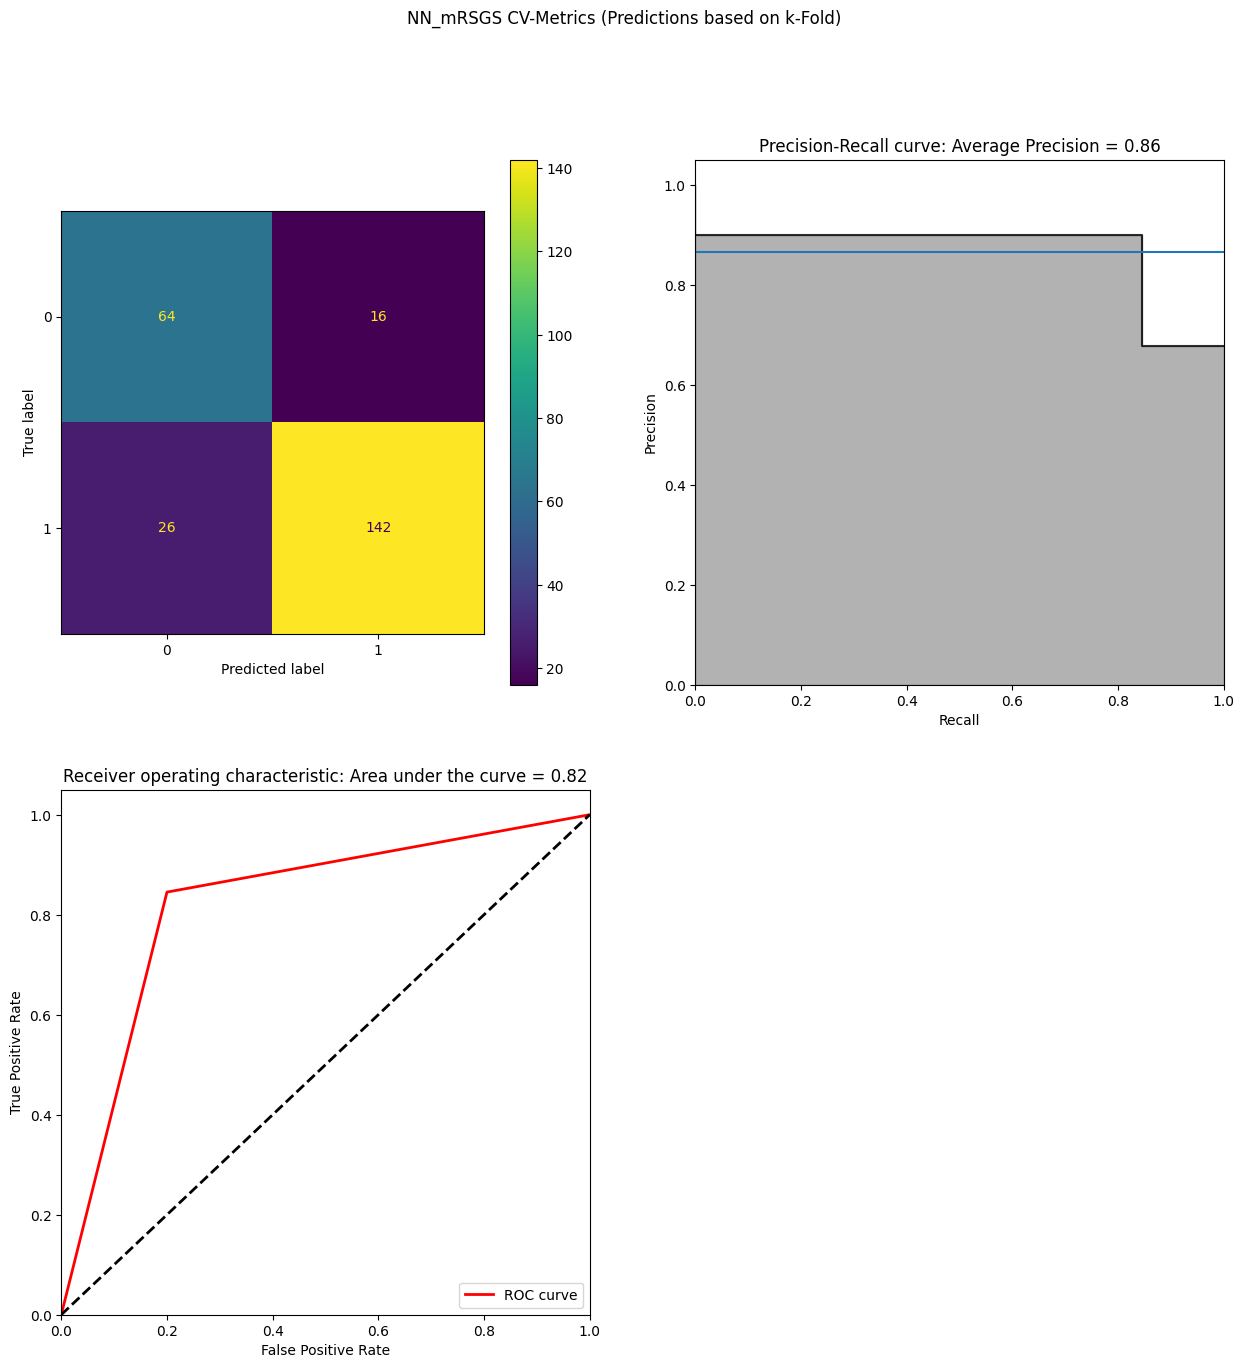

CPU times: user 4min 50s, sys: 11 s, total: 5min 1s
Wall time: 6min 35s
time: 6min 35s (started: 2023-05-18 10:38:40 +00:00)


In [116]:
%%time

hist_mRSGS, nn_mRSGS = cv_keras_training(
    build_mRS, k_fold, X_train_b, y_train_b, 
    name="NN_mRSGS", metrics=["BCE Loss", "Precision", "Recall", "Binary Accuracy"], verbose=1,
    num_epoch=400, batch_size=4, params = {'learning_rate':1e-04}
)

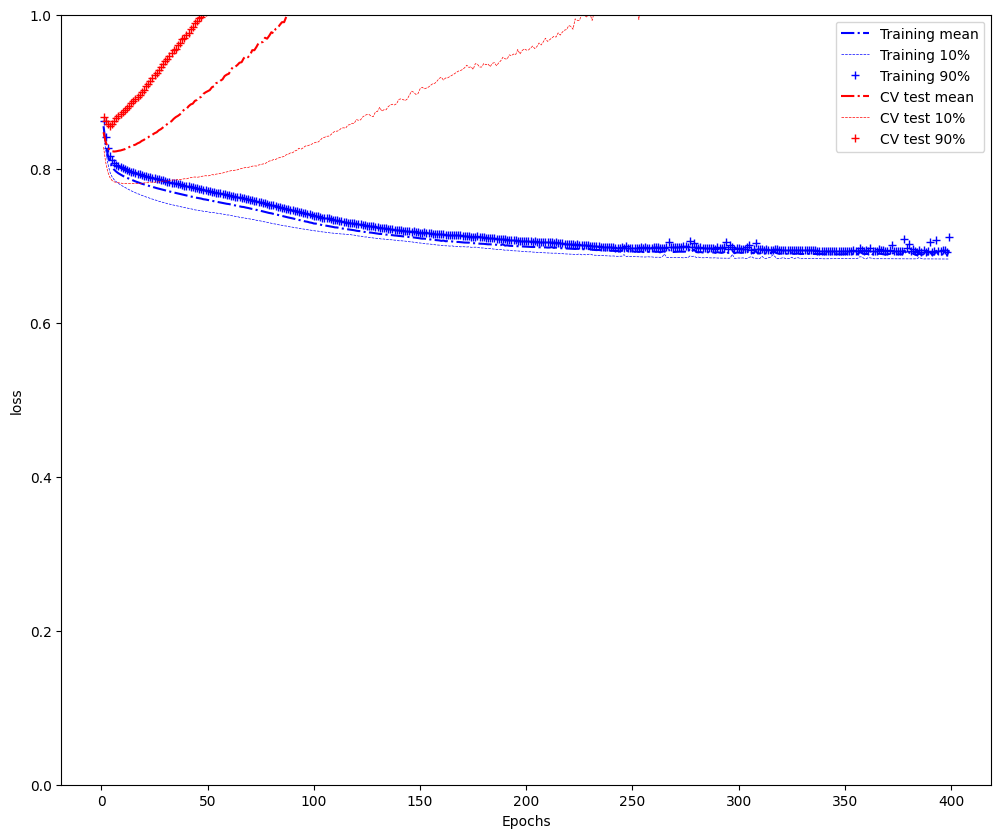

time: 360 ms (started: 2023-05-18 10:45:16 +00:00)


In [117]:
plot_learning_curves(hist_mRSGS, "loss") 

The metrics degr

# 7.3 Regularization

We have now many strongly overfitted models. I try to generalize with regularization

#7.3.1 Dropout



In [118]:
def build_mRSGSDR(
  learning_rate: float = 0.001, input_shape=None, optimizer="rmsprop",
   loss="BinaryCrossentropy", last_layer="sigmoid", 
  init_dense= keras.initializers.LecunUniform(seed=2023),activity_regularizer= None, 
  activation= tf.keras.layers.LeakyReLU(alpha=0.2),dropout= 0.35,  kernel_regularizer= None,
  **params):

  model = models.Sequential()
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense, input_shape=(X_train_b.shape[1],)))
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(layers.Dense(32, activation=activation, kernel_initializer=init_dense)) 
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(layers.Dense(1, activation=last_layer,
                         kernel_initializer=tf.keras.initializers.glorot_uniform(seed=2023)))
  model.compile(optimizer=optimizer, loss=loss, 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'], 
                **params)
  return model

t = build_mRSGSDR(**params)
t.summary()

Model: "sequential_405"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1620 (Dense)          (None, 32)                224       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1621 (Dense)          (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1622 (Dense)          (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1623 (Dense)          (None, 1)              

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 7ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 8ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE:  0.21717879176139832
Overall Training Precision:  0.9213221907615662
Overall Training Recall:  0.9390160441398621
Overall Training Binary Accuracy:  0.9042688250541687


Overall CV BCE:  0.3591134637594223
Overall CV Precision:  0.909383487701416
Overall CV Recall:  0.9046345710754394
Overall CV Binary Accuracy:  0.8712652921676636

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8831102333406482 
avg. Recall:  0.9047619047619048
FPR:  0.09523809523809523 
FNR:  0.2


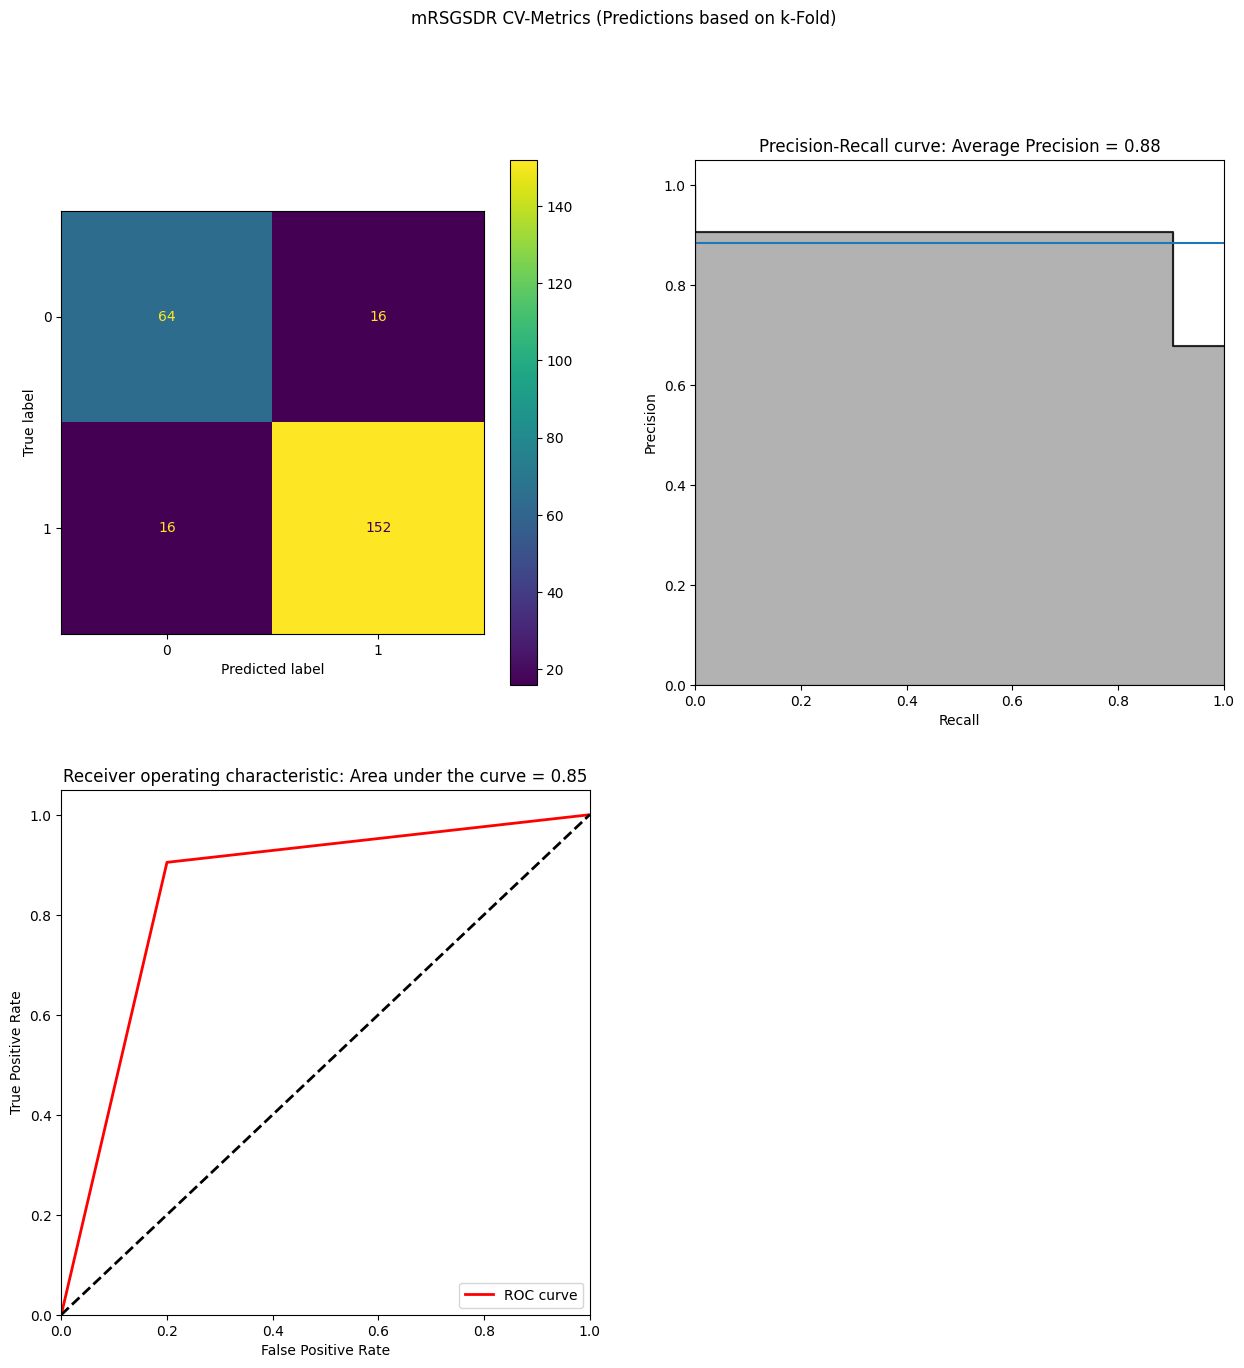

CPU times: user 2min 34s, sys: 5.7 s, total: 2min 39s
Wall time: 3min 27s
time: 3min 27s (started: 2023-05-18 10:45:16 +00:00)


In [119]:
 %%time
dropout = 0.35
epochs_best = 200
batch_size_best = 4
lr_best = 0.001

hist_mRSGSDR, nn_mRSGSDR = cv_keras_training(
    build_mRSGSDR, k_fold, X_train_b, y_train_b, 
    name="mRSGSDR", metrics=["BCE", "Precision", "Recall", "Binary Accuracy"], verbose=1,
    num_epoch=epochs_best, batch_size=batch_size_best, params = {'dropout': dropout}
)

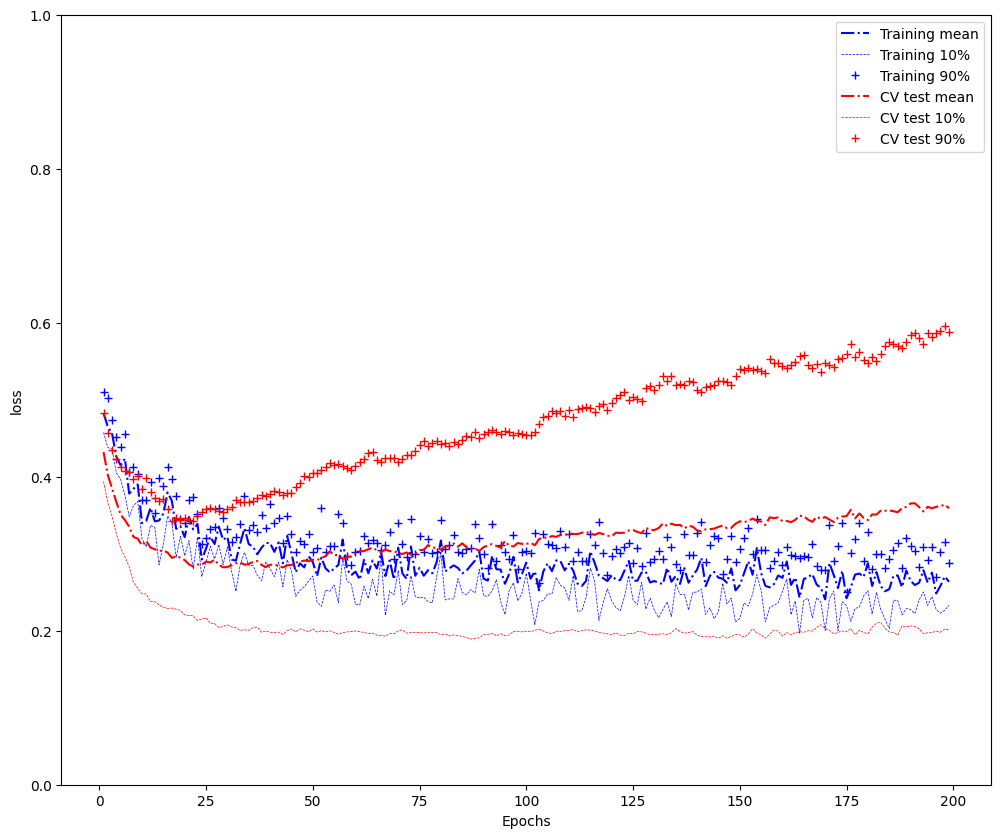

time: 443 ms (started: 2023-05-18 10:48:44 +00:00)


In [120]:
 plot_learning_curves(hist_mRSGSDR, "loss")

The experiment for drop out was done by manually

0.1 training loss not degressing much but more generalisation

0.8 Model is not able to fit the input anymore

0.5 still to much drop out

0.25 much better looking learning curve, still early overfitting

0.4 still better looking learning curve metrics slightly worse

0.35 we keep this value

#7.4 weight regularization


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 12ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 7ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training Poisson:  0.22346774041652678
Overall Training Precision:  0.917610251903534
Overall Training Recall:  0.943493640422821
Overall Training Binary Accuracy:  0.9042739033699035


Overall CV Poisson:  0.350692018866539
Overall CV Precision:  0.9051450967788697
Overall CV Recall:  0.9106951832771302
Overall CV Binary Accuracy:  0.8713469266891479

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8801267281105991 
avg. Recall:  0.9107142857142857
FPR:  0.10119047619047619 
FNR:  0.1875


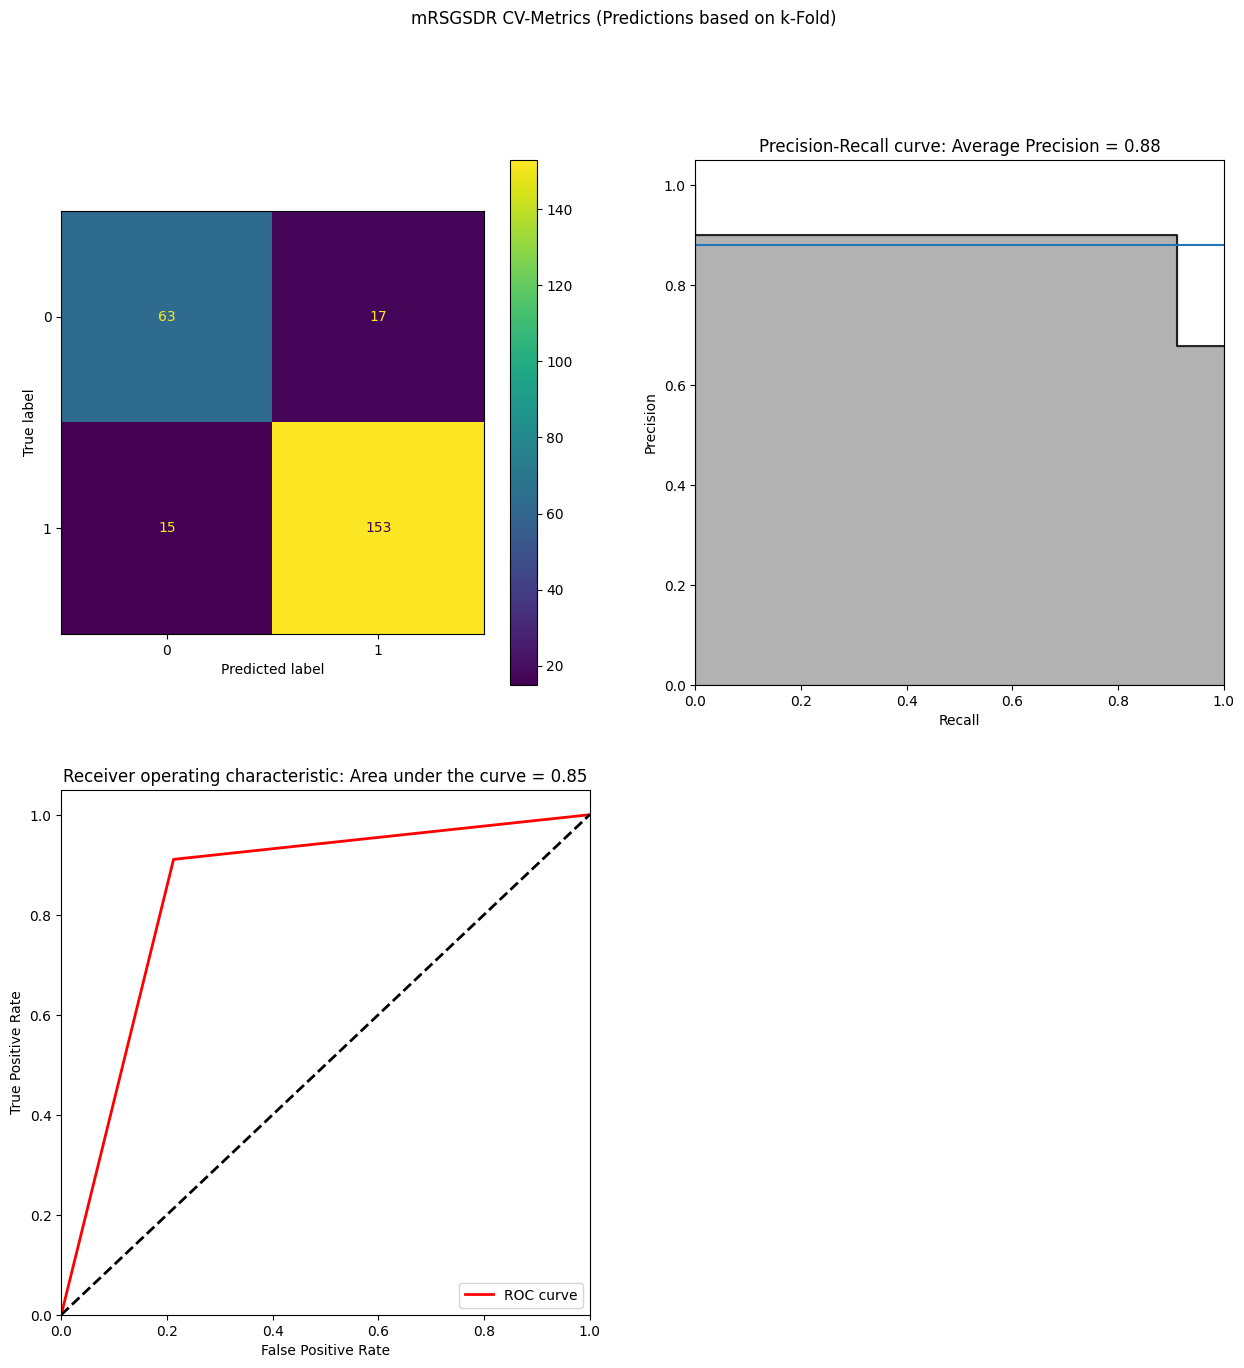

CPU times: user 2min 48s, sys: 5.93 s, total: 2min 54s
Wall time: 3min 30s
time: 3min 30s (started: 2023-05-18 10:48:44 +00:00)


In [121]:
 %%time
dropout = 0.4
epochs_best = 200
batch_size = 4
lr_best = 0.001
kernel_regularizer = tf.keras.regularizers.l2(0.01)
activation_regularizer = tf.keras.regularizers.l2(0.01)

hist_mRSGSDRl2, nn_mRSGSDRl2 = cv_keras_training(
    build_mRSGSDR, k_fold, X_train_b, y_train_b, 
    name="mRSGSDR", metrics=["Poisson", "Precision", "Recall", "Binary Accuracy"], verbose=1,
    num_epoch=epochs_best, batch_size=batch_size, params = {'dropout': dropout,
            'kernel_regularizer': kernel_regularizer,
        'activity_regularizer': activation_regularizer}
)

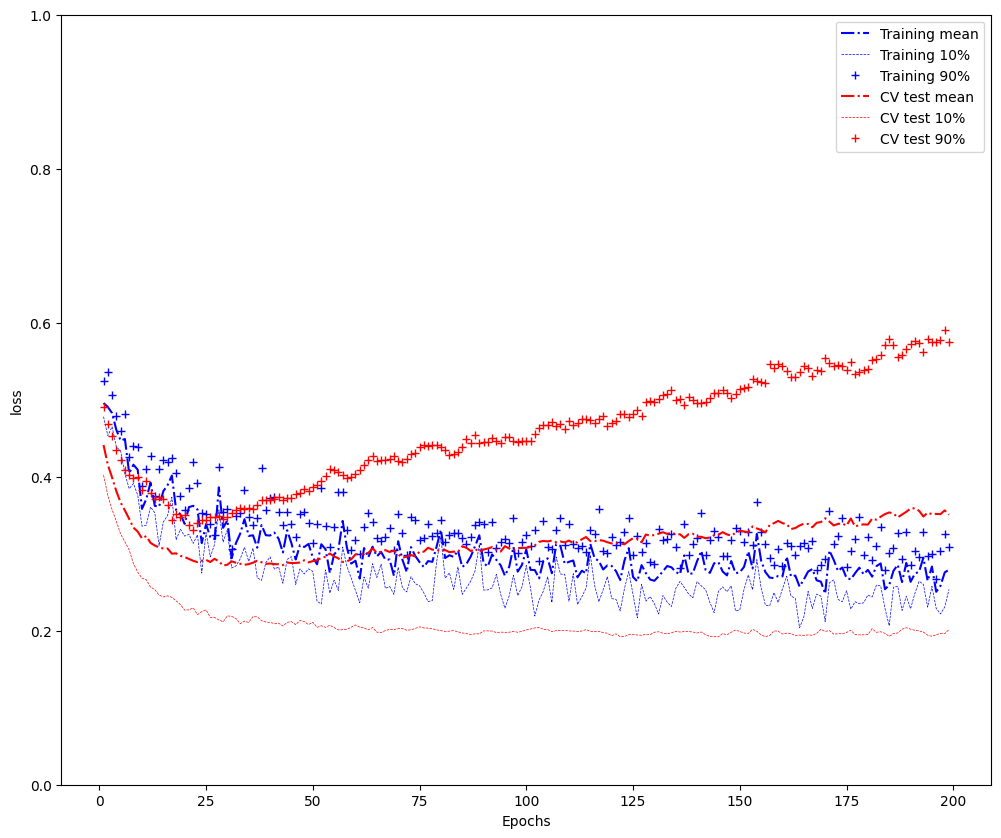

time: 333 ms (started: 2023-05-18 10:52:15 +00:00)


In [122]:
plot_learning_curves(hist_mRSGSDRl2, "loss")

#7.5 early stopping

In [125]:
def cv_keras_training_ensemble(model_fn, k_fold, X_train, y_train, name="", metrics="", 
                               verbose: int = 0, num_epoch: int = 200, batch_size: int = 4,
                               lr = 0.001, params: dict = {}, patience: int = 25):
  """
    performs k-fold stratified cross validation on specified model (build function)
    return: histories, ensemble
  """
  trainingScores = []
  cvScores = []
  histories = []
  ensemble = []
  predictionsBasedOnKFolds = pd.DataFrame(data=[],index=np.arange(y_train.shape[0]),columns=[0,1])

  for idx, (train_index, cv_index) in enumerate(k_fold.split(X_train, y_train)):

    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    #Setting up callbacks
    cb = [TqdmCallback(verbose=verbose), 
          EarlyStopping(monitor="val_binary_accuracy", patience=patience, restore_best_weights=True),
          ModelCheckpoint('weights_fold_{}.h5'.format(idx), monitor="val_binary_accuracy", save_best_only=True)]

    #Fitting the model according to given data:
    model = model_fn(input_shape=(X_train_fold.shape[1],), **params)
    histories.append(model.fit(X_train_fold, y_train_fold, epochs=num_epoch, batch_size=batch_size, verbose=0, 
                               validation_data=(X_cv_fold, y_cv_fold), callbacks=cb, shuffle=False)) # reproducible
    
    #Evaluating the training pperformance:
    train_score = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    trainingScores.append(train_score)

    #Save CV Predictions
    predictionsBasedOnKFolds.loc[cv_index,:] = model.predict(X_cv_fold)

    #Evaluating the CV pperformance:
    val_score = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
    cvScores.append(val_score)    
    if verbose == 0:
      print('--------------------------------------------------------')
      for i, metric in enumerate(metrics):
        print('Training {}: '.format(metric), train_score[i])
        print('CV {}: '.format(metric), cvScores[i])

    # save model instance for further use
    ensemble.append(model)
  
  print("\n--------------------------------------------------------")
  print("Overall Scores : ")
  for i, metric in enumerate(metrics):
    print('Overall Training {}: '.format(metric), np.mean(np.array(trainingScores), axis=0)[i])
  
  print("\n")
  for i, metric in enumerate(metrics):
    print('Overall CV {}: '.format(metric), np.mean(np.array(cvScores), axis=0)[i])


  # We do not use the last model trained on the 5th fold to predict, we instead use the CV predictions 
  # to evaluate the model and compare it to the baseline approaches
  try:
    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle('{} CV-Metrics (Predictions based on k-Fold)'.format(name))

    # y_preds = np.round(model.predict(X_train)).astype(int)
    y_preds = np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)
    cm = confusion_matrix(y_train, y_preds)
    dp = ConfusionMatrixDisplay(cm)
    dp.plot( ax=axs[0,0])
    print("\nCV-Metrics (Predictions based on k-Fold): ")
  except BaseException as e:
    print(e)

  try:
    # Precision Recall Curve
    preds = pd.DataFrame(np.array([y_train.values, np.round(predictionsBasedOnKFolds.loc[:, 1].astype(float)).values.astype(int)]).T, columns=["label", "prediction"])
    preds.columns = ['trueLabel','prediction']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
    average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])
    average_recall = recall_score(preds['trueLabel'], preds['prediction'])

    print("avg. Precision: ", average_precision, "\navg. Recall: ", average_recall)

    axs[0, 1].step(recall, precision, color='k', alpha=0.8, where='post')
    axs[0, 1].fill_between(recall, precision, step='post', alpha=0.3, color='k')
    axs[0, 1].set_xlabel('Recall')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].set_ylim([0.0, 1.05])
    axs[0, 1].set_xlim([0.0, 1.0])
    axs[0, 1].hlines(average_precision, xmin=0, xmax=1)
    axs[0, 1].set_title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))
  except BaseException as e:
    print(e)
    average_precision = -1
    average_recall = -1
    axs[0, 1].axis('off')

  # Area under the Receiver Operating Characteristic (ROC) Curve
  try:
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    areaUnderROC = auc(fpr, tpr)
    axs[1, 0].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    axs[1, 0].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    axs[1, 0].set_xlim([0.0, 1.0])
    axs[1, 0].set_ylim([0.0, 1.05])
    axs[1, 0].set_xlabel('False Positive Rate')
    axs[1, 0].set_ylabel('True Positive Rate')
    axs[1, 0].set_title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    axs[1, 0].legend(loc="lower right")
    
    tn, fp, fn, tp = cm.ravel()
    
    print("FPR: ", float(fp) / y_train.sum(), "\nFNR: ", float(fn) /(y_train.shape[0] - y_train.sum()))
  except BaseException as e:
    print(e)
    areaUnderROC = -1
    axs[1, 0].axis('off')

  axs[1, 1].axis('off')
  plt.show()

  return histories, ensemble

time: 2.63 ms (started: 2023-05-18 10:56:30 +00:00)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.2830428034067154
Overall Training Precision:  0.9080880641937256
Overall Training Recall:  0.8868435502052308
Overall Training Binary Accuracy:  0.8628800630569458


Overall CV BCE Loss:  0.2969255894422531
Overall CV Precision:  0.9258749604225158
Overall CV Recall:  0.9165775537490845
Overall CV Binary Accuracy:  0.8913469195365906

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.9017609941407508 
avg. Recall:  0.9166666666666666
FPR:  0.07738095238095238 
FNR:  0.175


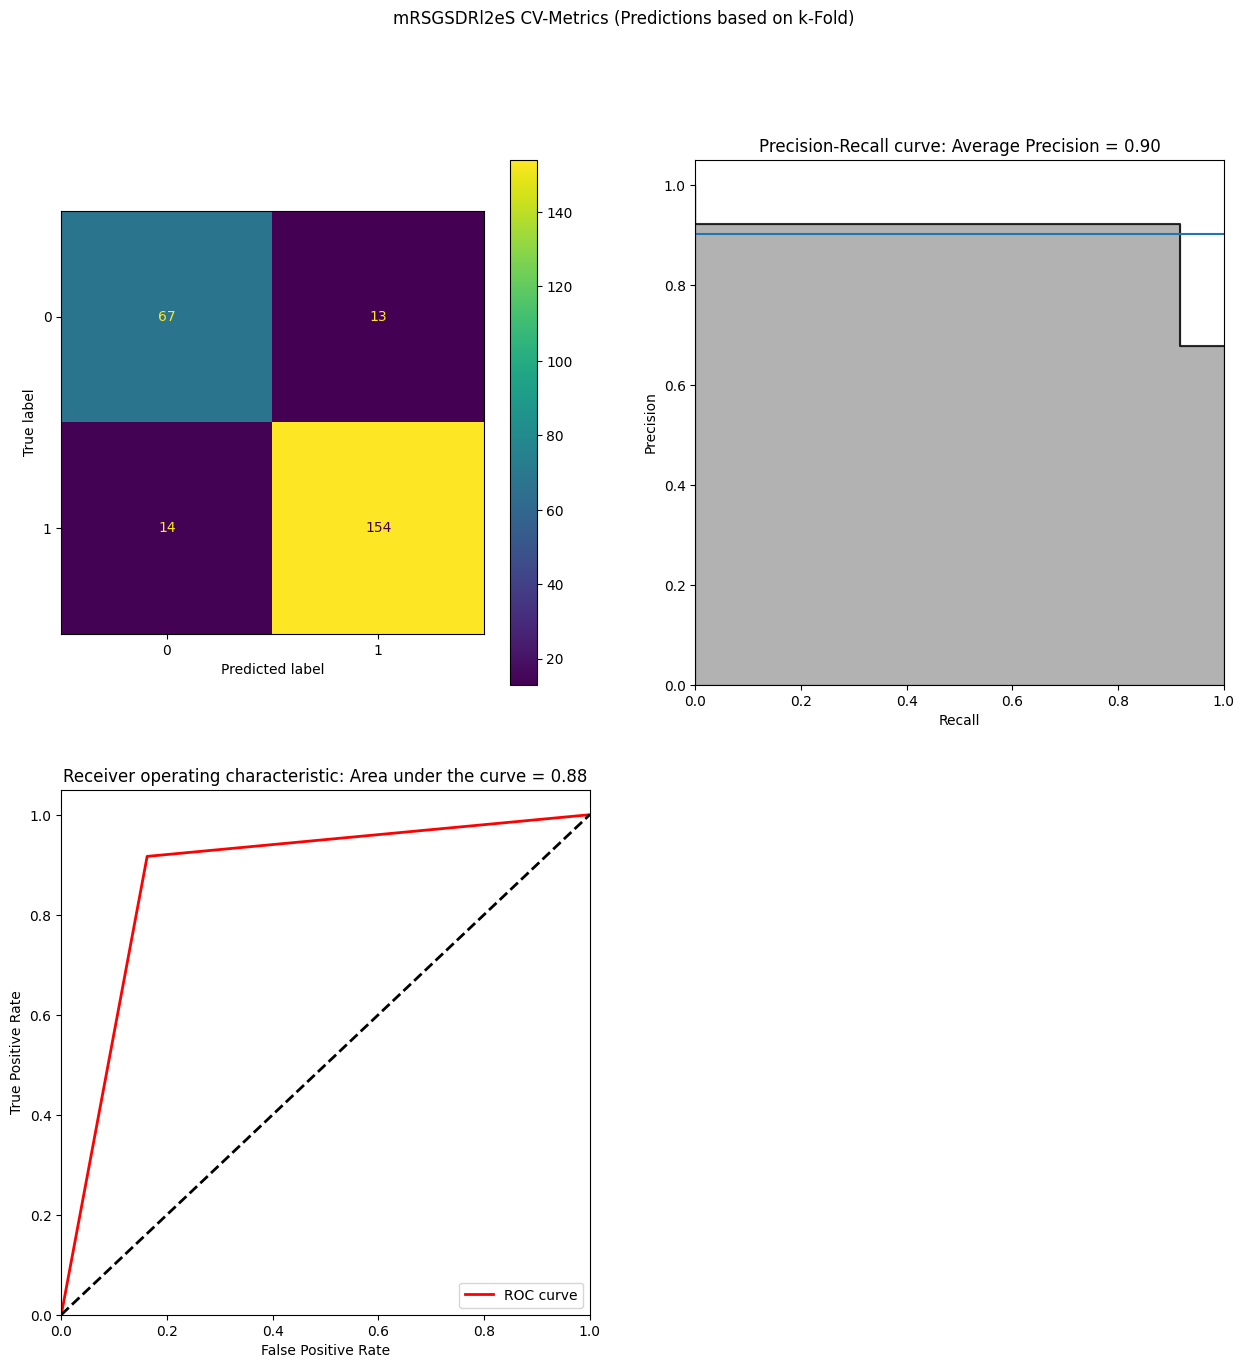

CPU times: user 1min 1s, sys: 2.59 s, total: 1min 3s
Wall time: 1min 17s
time: 1min 17s (started: 2023-05-18 12:13:53 +00:00)


In [173]:
%%time
kernel_regularizer = tf.keras.regularizers.l2(0.01)
activation_regularizer = tf.keras.regularizers.l2(0.01)
dropout = 0.4  # 0.1
epochs_best = 200 # We will apply EarlyStopping
batch_size_best = 4
lr_best = 1e-04

hist_eS, model_eS = cv_keras_training_ensemble(
    build_mRSGSDR, k_fold, X_train_b, y_train_b, patience=50,
    name="mRSGSDRl2eS", metrics=["BCE Loss", "Precision", "Recall", "Binary Accuracy"], 
    verbose=1, num_epoch=epochs_best, batch_size=batch_size_best, params = {
        'kernel_regularizer': kernel_regularizer,
        'activity_regularizer': activation_regularizer,
        'dropout': dropout
        }
)

#8 Evaluation of models

In [133]:
print(classification_report(y_test_b, trained_linSVC.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.88      0.88      0.88        42

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62

time: 9.48 ms (started: 2023-05-18 11:03:59 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [134]:
 # Logistic Regression
print(classification_report(y_test_b, trained_logReg.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.88      0.88      0.88        42

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62

time: 14.5 ms (started: 2023-05-18 11:03:59 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [137]:
 # kernel SVM -best on CV
print(classification_report(y_test_b, trained_linRBF.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.91      0.93      0.92        42

    accuracy                           0.89        62
   macro avg       0.87      0.86      0.87        62
weighted avg       0.89      0.89      0.89        62

time: 10.3 ms (started: 2023-05-18 11:04:19 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [138]:
 # SGD Classifier
print(classification_report(y_test_b, trained_logSGD.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.97      0.81      0.88        42

    accuracy                           0.85        62
   macro avg       0.84      0.88      0.85        62
weighted avg       0.89      0.85      0.86        62

time: 9.73 ms (started: 2023-05-18 11:04:20 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SGDClassifier was fitted without feature names



In [166]:
# SGD Classifier with huber loss
print(classification_report(y_test_b, trained_logSGDhuber.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73        20
           1       0.94      0.74      0.83        42

    accuracy                           0.79        62
   macro avg       0.78      0.82      0.78        62
weighted avg       0.84      0.79      0.80        62

time: 10.8 ms (started: 2023-05-18 12:05:16 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SGDClassifier was fitted without feature names



In [141]:
 # Gaussian Process Classifier
print(classification_report(y_test_b, trained_gausClas.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.88      0.86      0.87        42

    accuracy                           0.82        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.83      0.82      0.82        62

time: 10.1 ms (started: 2023-05-18 11:04:35 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names



In [167]:
 #k-means
print(classification_report(y_test_b, trained_kClas.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.88      0.90      0.89        42

    accuracy                           0.85        62
   macro avg       0.84      0.83      0.83        62
weighted avg       0.85      0.85      0.85        62

time: 33.8 ms (started: 2023-05-18 12:06:36 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [142]:
 # Decision Tree
print(classification_report(y_test_b, trained_model_tree.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.91      0.76      0.83        42

    accuracy                           0.79        62
   macro avg       0.77      0.81      0.78        62
weighted avg       0.82      0.79      0.80        62

time: 8.9 ms (started: 2023-05-18 11:04:35 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [143]:
 # Random Forest --second of CV
print(classification_report(y_test_b, trained_forest.predict(X_test_b)))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.89      0.95      0.92        42

    accuracy                           0.89        62
   macro avg       0.89      0.85      0.87        62
weighted avg       0.89      0.89      0.88        62

time: 20.8 ms (started: 2023-05-18 11:04:35 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [144]:
# LGM
print(classification_report(y_test_b, np.round(trained_lgbm.predict(X_test_b))))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        42

    accuracy                           0.87        62
   macro avg       0.86      0.84      0.85        62
weighted avg       0.87      0.87      0.87        62

time: 10.8 ms (started: 2023-05-18 11:04:35 +00:00)


 Random forest is the best on f1 with SVM with RBF kernel. But quite higher on recal, which I deemed more important on for this medical application. But random forest is 0.4 lower on Precision, so we can expect more FP. We see SVM with RBF kernel was still the second best but LGM and kClas generalized well on the test set all a very close.
Good models:
Random Forest
SVM RBF
LGM
kclass

it might be worth trying an enseble from this 4 best models.

SGD with huber has the lowest F1 of 0.83
but the highest precision of 0.95

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 8ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 6ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training BCE Loss:  0.2740829139947891
Overall Training Accuraccy:  0.8820212125778198
Overall Training Precision:  0.891538405418396
Overall Training Recall:  0.944964063167572


Overall CV BCE Loss:  0.30714233219623566
Overall CV Accuraccy:  0.8832652926445007
Overall CV Precision:  0.893826162815094
Overall CV Recall:  0.9459893107414246

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8769726849110522 
avg. Recall:  0.9464285714285714
FPR:  0.11904761904761904 
FNR:  0.1125


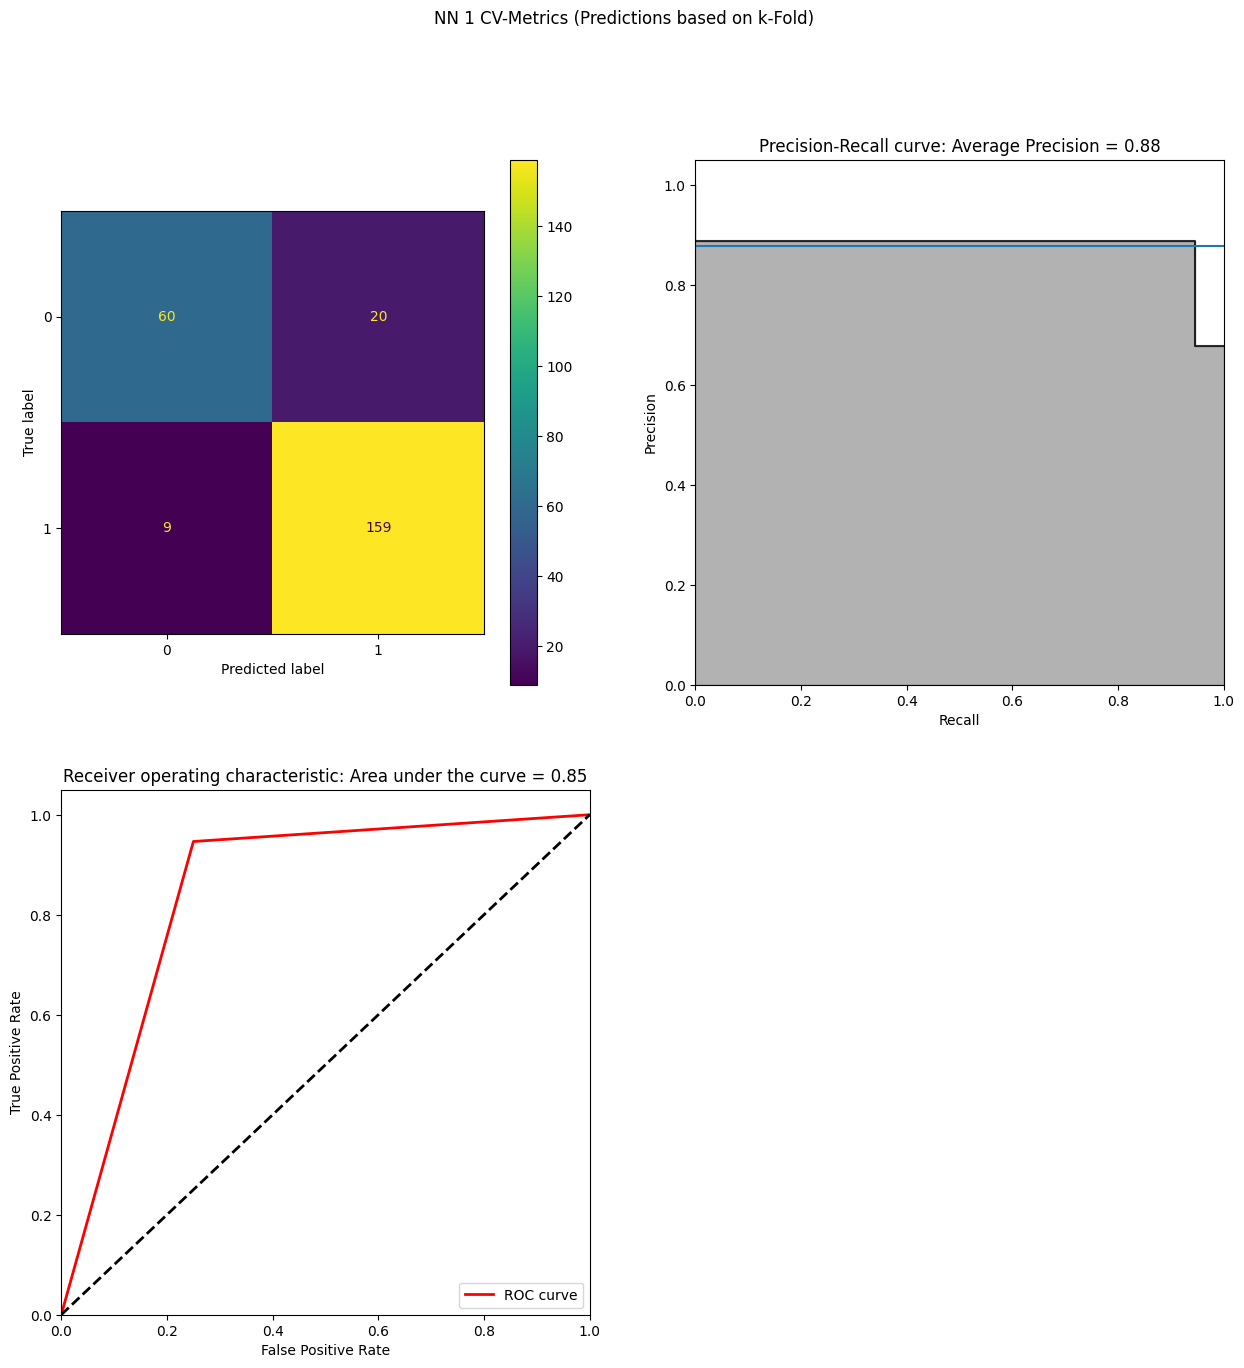

CPU times: user 30.3 s, sys: 1.09 s, total: 31.3 s
Wall time: 39.1 s
time: 39.1 s (started: 2023-05-18 11:30:04 +00:00)


In [155]:
 %%time
hist_simple_nnm, simple_nnm_ensemble = cv_keras_training_ensemble(
    build_model_m, k_fold, X_train_b, y_train_b, patience=50,
    name="NN 1", metrics=["BCE Loss", "Accuraccy", "Precision", "Recall"], verbose=1,
    num_epoch=100, batch_size=16, params={
    'optimizer': 'adam', 
    'loss': 'BinaryCrossentropy', 
    'metrics': ['binary_accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    'activation_input' : tf.keras.layers.LeakyReLU(alpha=0.2),
    'activation_hidden' : tf.keras.layers.LeakyReLU(alpha=0.2),
    'activation_output' : 'sigmoid'
}
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 8ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 4ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 3ms/step


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2/2 [==============================] - 0s 5ms/step

--------------------------------------------------------
Overall Scores : 
Overall Training Poisson:  0.8447673916816711
Overall Training Accuraccy:  0.8730883002281189
Overall Training Precision:  0.8570480823516846
Overall Training Recall:  0.818466055393219


Overall CV Poisson:  0.841239869594574
Overall CV Accuraccy:  0.906675124168396
Overall CV Precision:  0.9046345829963685
Overall CV Recall:  0.8711020350456238

CV-Metrics (Predictions based on k-Fold): 
avg. Precision:  0.8831102333406482 
avg. Recall:  0.9047619047619048
FPR:  0.09523809523809523 
FNR:  0.2


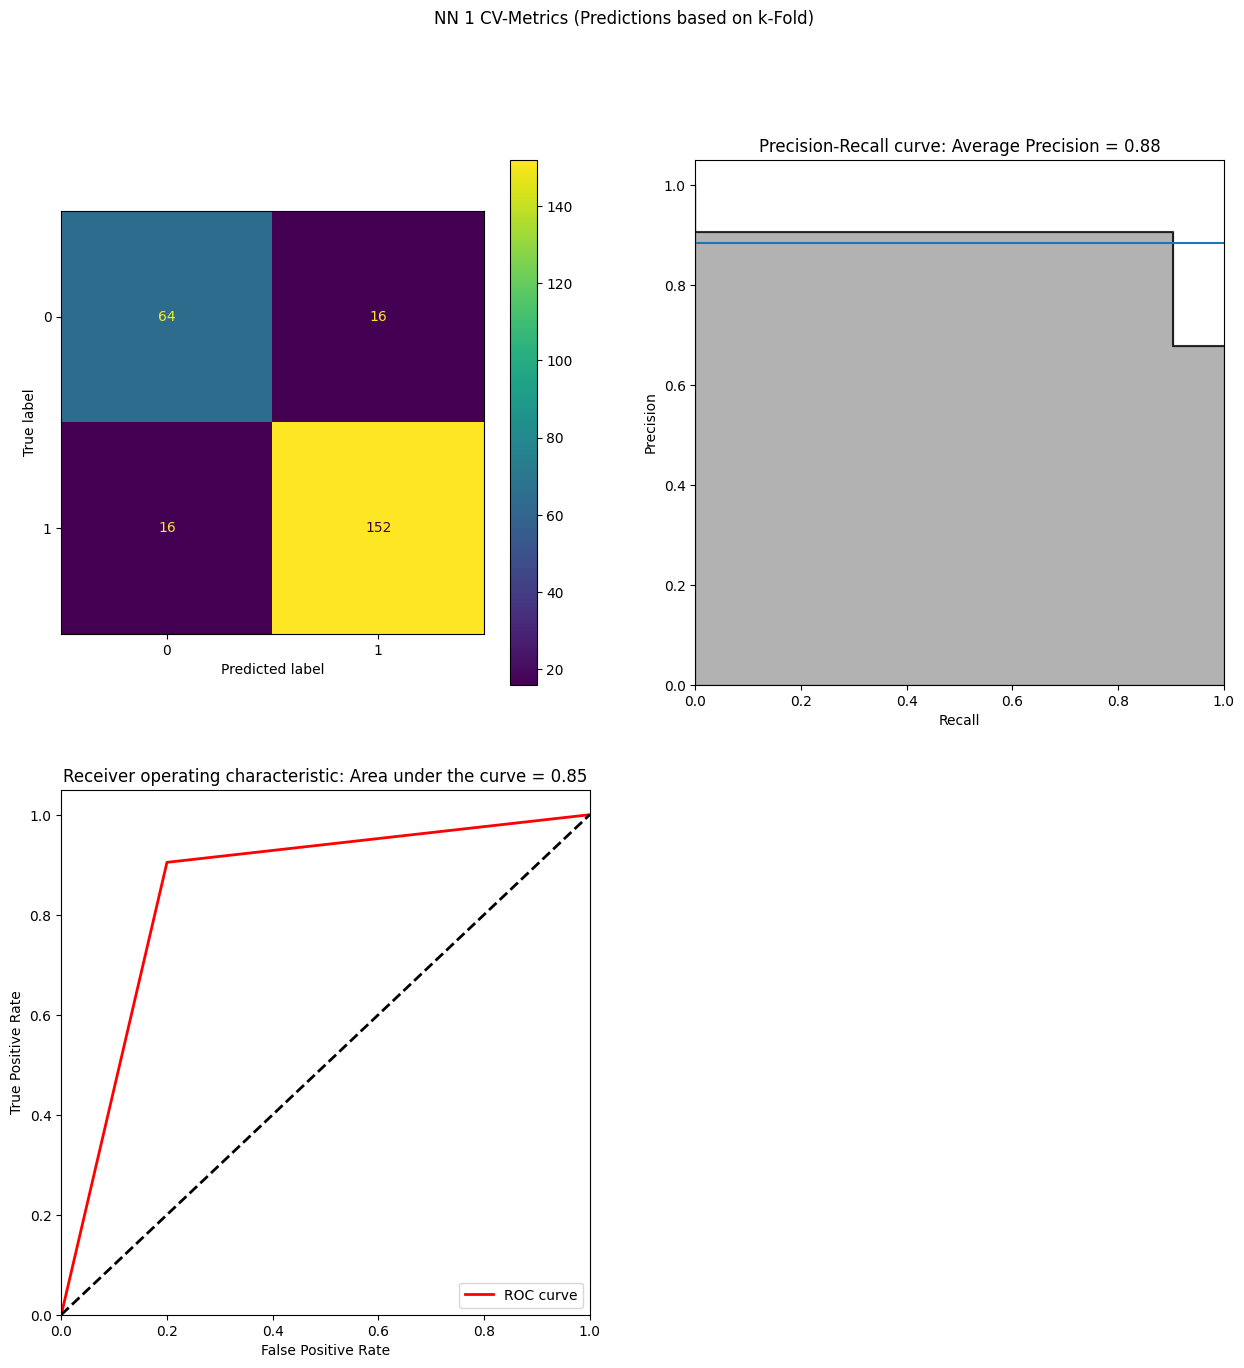

CPU times: user 31.4 s, sys: 1.1 s, total: 32.5 s
Wall time: 44.1 s
time: 44.1 s (started: 2023-05-18 11:56:27 +00:00)


In [163]:
 %%time
hist_mRSGSDRl2, mRSGSDRl2_ensemble = cv_keras_training_ensemble(
    build_mRSGSDR, k_fold, X_train_b, y_train_b, patience=50,
    name="final ensemble", metrics=["Poisson", "Accuraccy", "Precision", "Recall"], verbose=1,
    num_epoch=100, batch_size=16, params={
    'optimizer': 'RMSprop', 
    'loss': 'Poisson', 
    'dropout': 0.35,
            'kernel_regularizer':  tf.keras.regularizers.l2(0.01),
        'activity_regularizer':  tf.keras.regularizers.l2(0.01)})
    


In [170]:
simple_nn_predictions = pd.DataFrame(data=[], index=X_test_b.index, columns=["pred_0", "pred_1", "pred_2", "pred_3", "pred_4"])
for id, model in enumerate(simple_nnm_ensemble):
  simple_nn_predictions.loc[X_test_b.index, "pred_{}".format(id)] = model.predict(X_test_b).squeeze()
simple_nn_predictions["mean"] = simple_nn_predictions.mean(axis=1)
simple_nn_predictions["median"] = simple_nn_predictions.median(axis=1)
simple_nn_predictions.head()

2/2 [==============================] - 0s 5ms/step


pred_0    pred_1    pred_2    pred_3    pred_4      mean    median
302  0.543958  0.589745  0.584184  0.553992  0.571947  0.568765  0.570356
281  0.462286  0.240594  0.329628  0.345885  0.166899  0.309059  0.319343
110  0.869405  0.985988  0.964032  0.961578  0.998851  0.955971  0.962805
190  0.934054  0.999399  0.995435  0.996928  0.999999  0.985163  0.996181
10   0.528834  0.462354  0.506435  0.497515  0.481292  0.495286  0.496401

time: 348 ms (started: 2023-05-18 12:13:02 +00:00)


In [174]:
final_predictions = pd.DataFrame(data=[], index=X_test_b.index, columns=["pred_0", "pred_1", "pred_2", "pred_3", "pred_4"])
for id, model_eS in enumerate(model_eS):
  final_predictions.loc[X_test_b.index, "pred_{}".format(id)] = model.predict(X_test_b).squeeze()
final_predictions["mean"] = final_predictions.mean(axis=1)
final_predictions["median"] = final_predictions.median(axis=1)
final_predictions.head()

2/2 [==============================] - 0s 5ms/step


pred_0    pred_1    pred_2    pred_3    pred_4      mean    median
302  0.714595  0.714595  0.714595  0.714595  0.714595  0.714595  0.714595
281  0.282725  0.282725  0.282725  0.282725  0.282725  0.282725  0.282725
110  0.967486  0.967486  0.967486  0.967486  0.967486  0.967486  0.967486
190  0.998166  0.998166  0.998166  0.998166  0.998166  0.998166  0.998166
10   0.525708  0.525708  0.525708  0.525708  0.525708  0.525708  0.525708

time: 332 ms (started: 2023-05-18 12:18:18 +00:00)


In [176]:
# NN size M
print(classification_report(y_test_b, np.round(simple_nn_predictions["mean"])))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.91      0.93      0.92        42

    accuracy                           0.89        62
   macro avg       0.87      0.86      0.87        62
weighted avg       0.89      0.89      0.89        62

time: 37.2 ms (started: 2023-05-18 12:21:43 +00:00)


In [177]:
# NN size M tuned
print(classification_report(y_test_b, np.round(final_predictions["mean"])))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.93      0.90      0.92        42

    accuracy                           0.89        62
   macro avg       0.87      0.88      0.87        62
weighted avg       0.89      0.89      0.89        62

time: 10.9 ms (started: 2023-05-18 12:21:46 +00:00)


We see that we didnt imporve much by all the tuning effort. Recall got even lower but precision rose.
 So I would prefere the untuned Model. But I remember the s model size was better than m. I kept m because I thought it will overfitt better to regularize later. Maybe I should have kept the s model untuned. 

 The best overall model is the random forest because Recall is more important than precision in our case.

 F1 score of 0.92 have:
 NN untuned
 nn tuned
 random forest
 SVM with RBF kernel



#9. Conlusions / ideas for improvement

First of all I can say the hypothesis, that we are able to build a medical assisten model from this dataset was right.
Because of the small data set, small feature number and further of the high correlation between most features deeplearning brought only small imporvements. Simple models were able to fit most inputs to the classes. 

For the reason why the lager models didnt improve much beyond this easy to map input/classification connection I have a guess. 
I think there is certain features beyond the physical/geometrical state of the spine that have a big influence if a patient has a hernia or not. This could be certain biological indicators, for which we would have to consult a domain (medical) expert. But I very strongly suggest that to take in the age of a patient could help us strongly to reach very high metrics!! Age would be kind of a "super feature" that correlates very strong with most biolocial scores. For explanation: I suggest that a young person whit abnormal spine postition wouldnt develop a hernia. The risk of this would grow with age, as the tissue is worn down.

So here we come to my recomendation how to improve this project. Instead of further spending time and money on this date/feature set I would strongly recommend to get better and more data. 
Maybe something simple as the feature age could improve our model predictions strongly. 
More data would be of advantage for the deeplearning approach.
But I suggest that this would not be necessary and we could get really strong predictions with baseline models and at least one more feature. 

Another idea is to change the approach completely. This data set is from 2006 I belive. The means of computation and the libraries for deeplearning evolved a lot since then.
The approach was to mine this 6 mechanical features from xray images. This step already could bring as data inacurracy.
So I would recommend, instead of extracting this features, using the whole X-ray for classification. 
There is very strong, easy to use image classifier available to use. 
This deeplearning approach would make sure the model can learn more information than is available in this approach. It would maybe even learn indirectly what I would like to implement with the age feature. It would get more biologicall data by the density of the bones fro example.
On problem for this approach could be the small dataset. Deeplearning requieres larger datasets to optimzize tens of millions of weights. 
I would be still worth to try some prelearned modelsn to profit from transfer learning.

#10 Lessons learned

It was very interesting to see how simple baseline models mapped the input quite sucessfull.

The dataset itself was dissapointing. I felt like the task was to simple(small, low and correlated features) to use on more advanced methodes. 

I would have liked to spend more time on the tuning of the NNs and boosting models. To get more practical experience in this is a personal goal. Unfortunately I can not get the DDE2 class credits recognized for my master. And with part time work and finishing my last study semester I am to overloaded with work to participate without credits.

The main thing I will take from this class is the practical experience with Scikit learn and Keras.

The jupiter notebook format proved to be tedious for debugging and laggy once the file got bigger.
I much prefer my IDE.